In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from operator import truediv

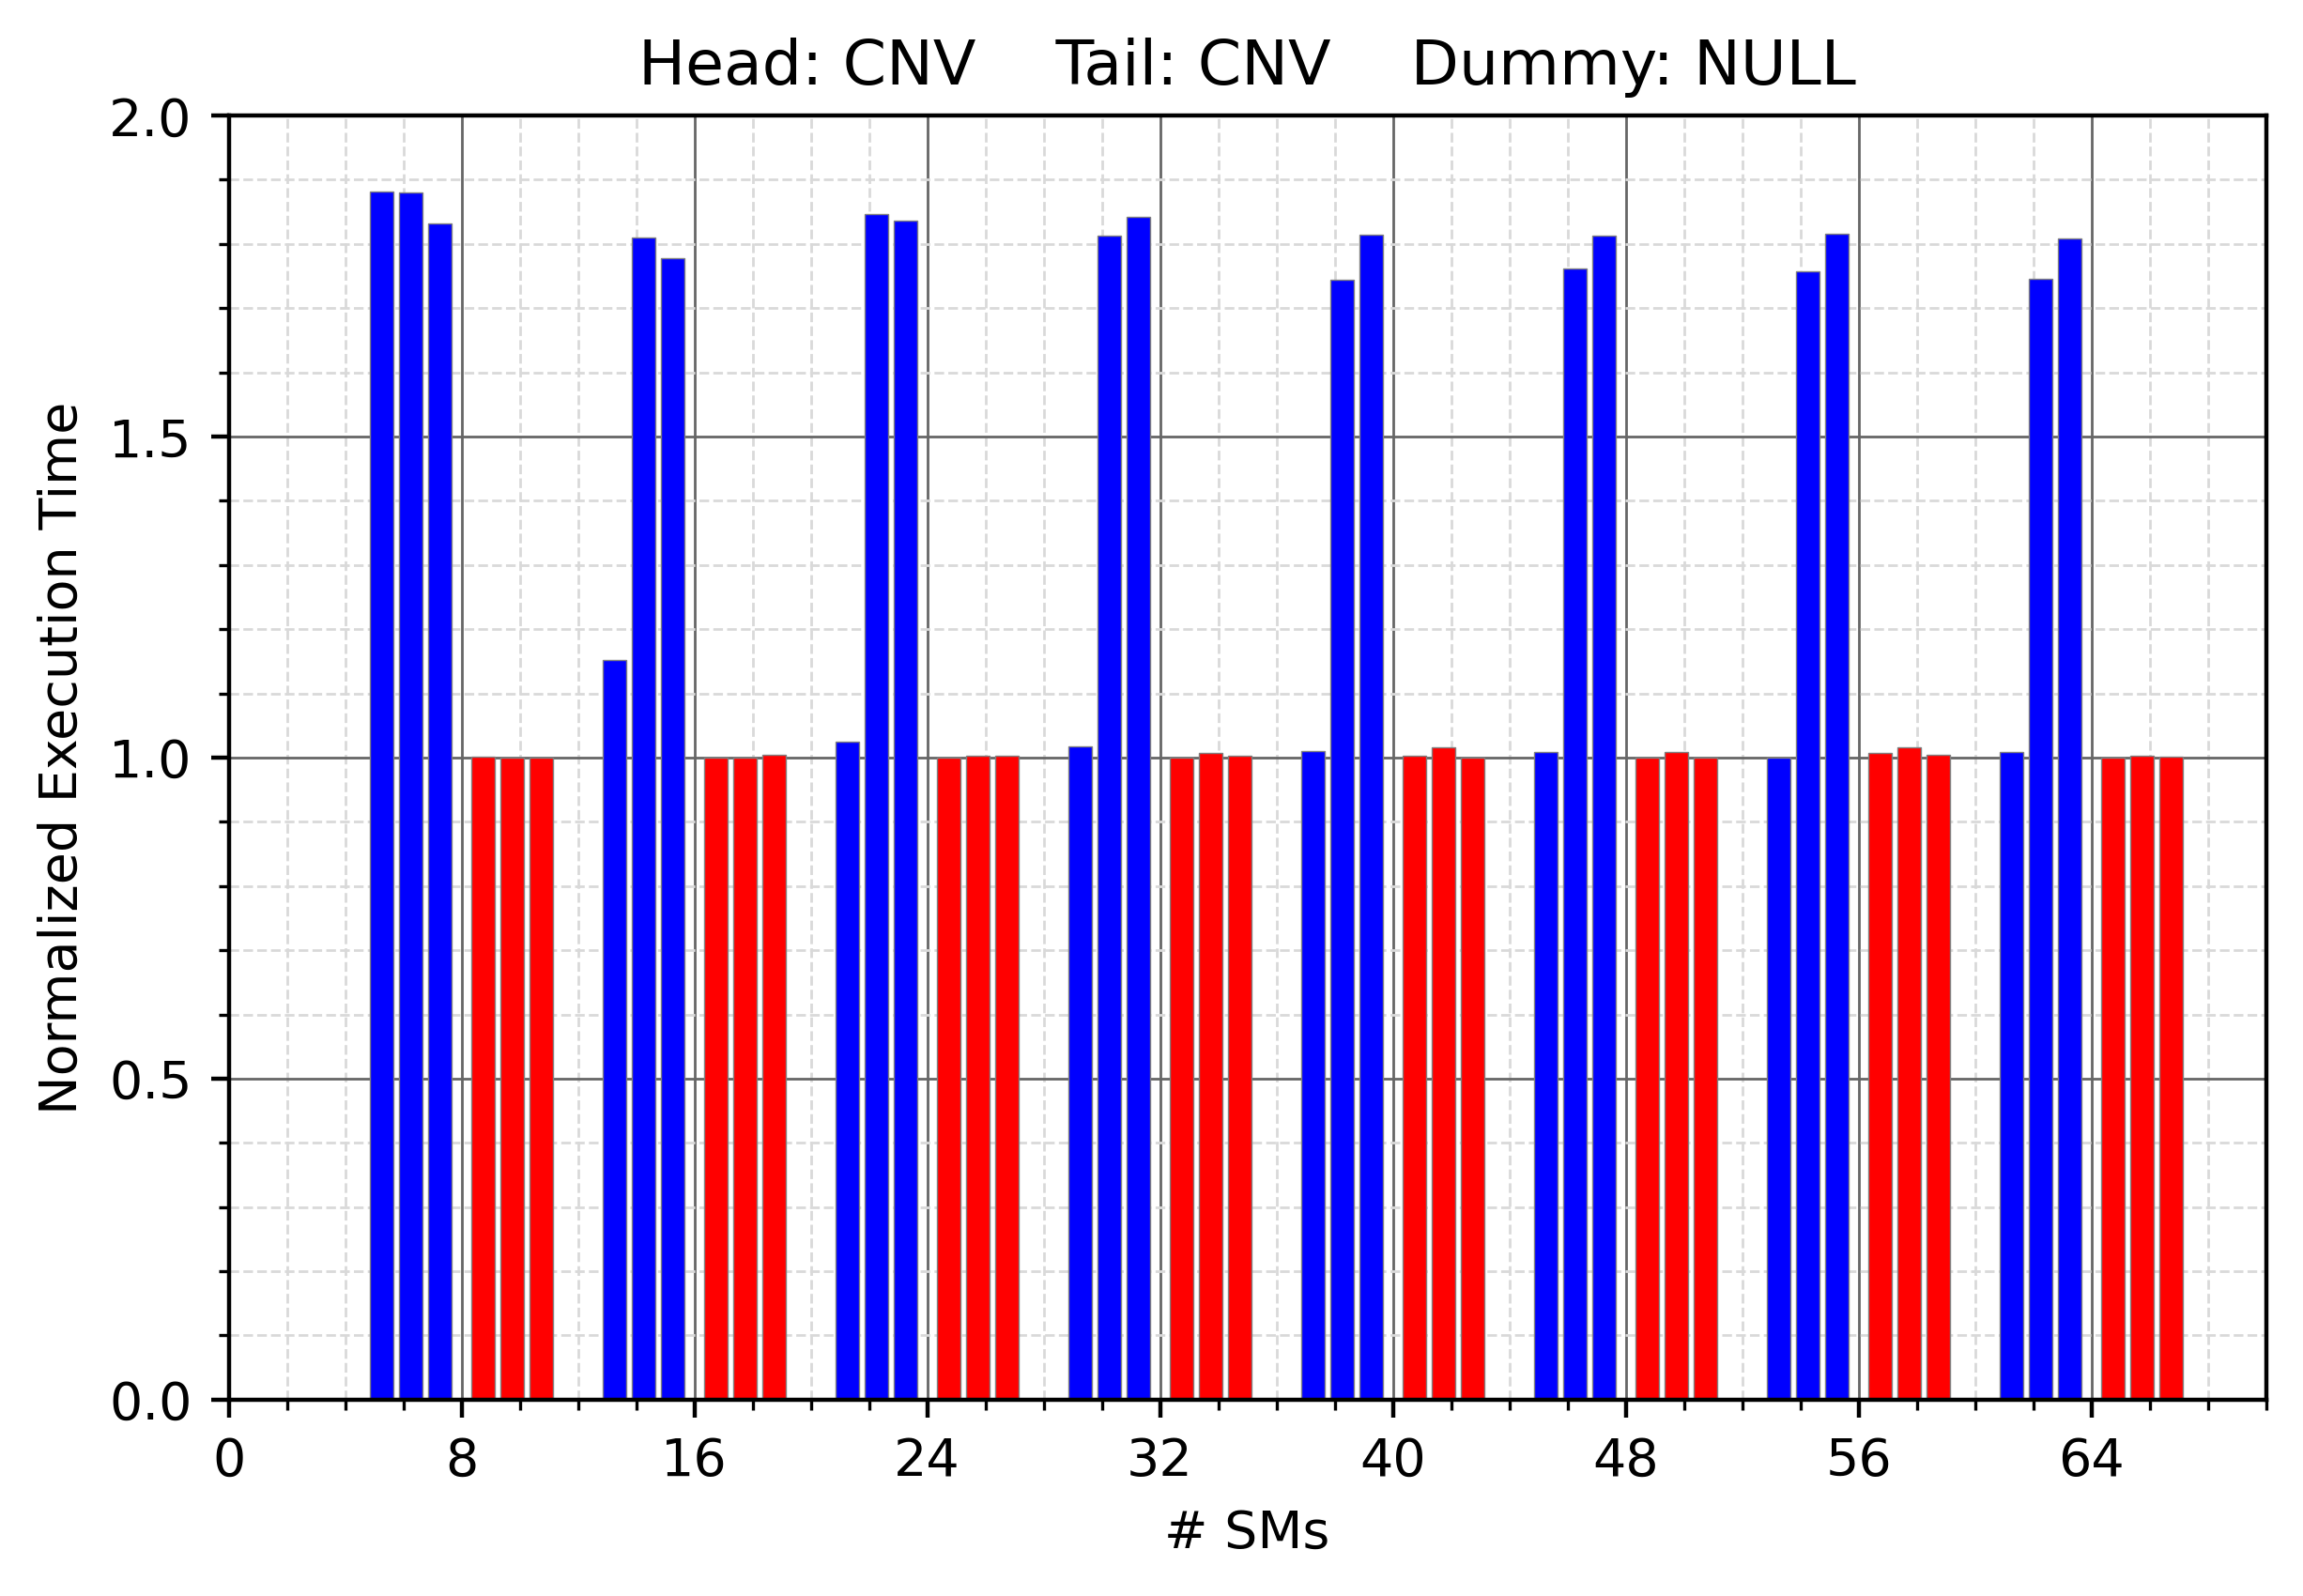

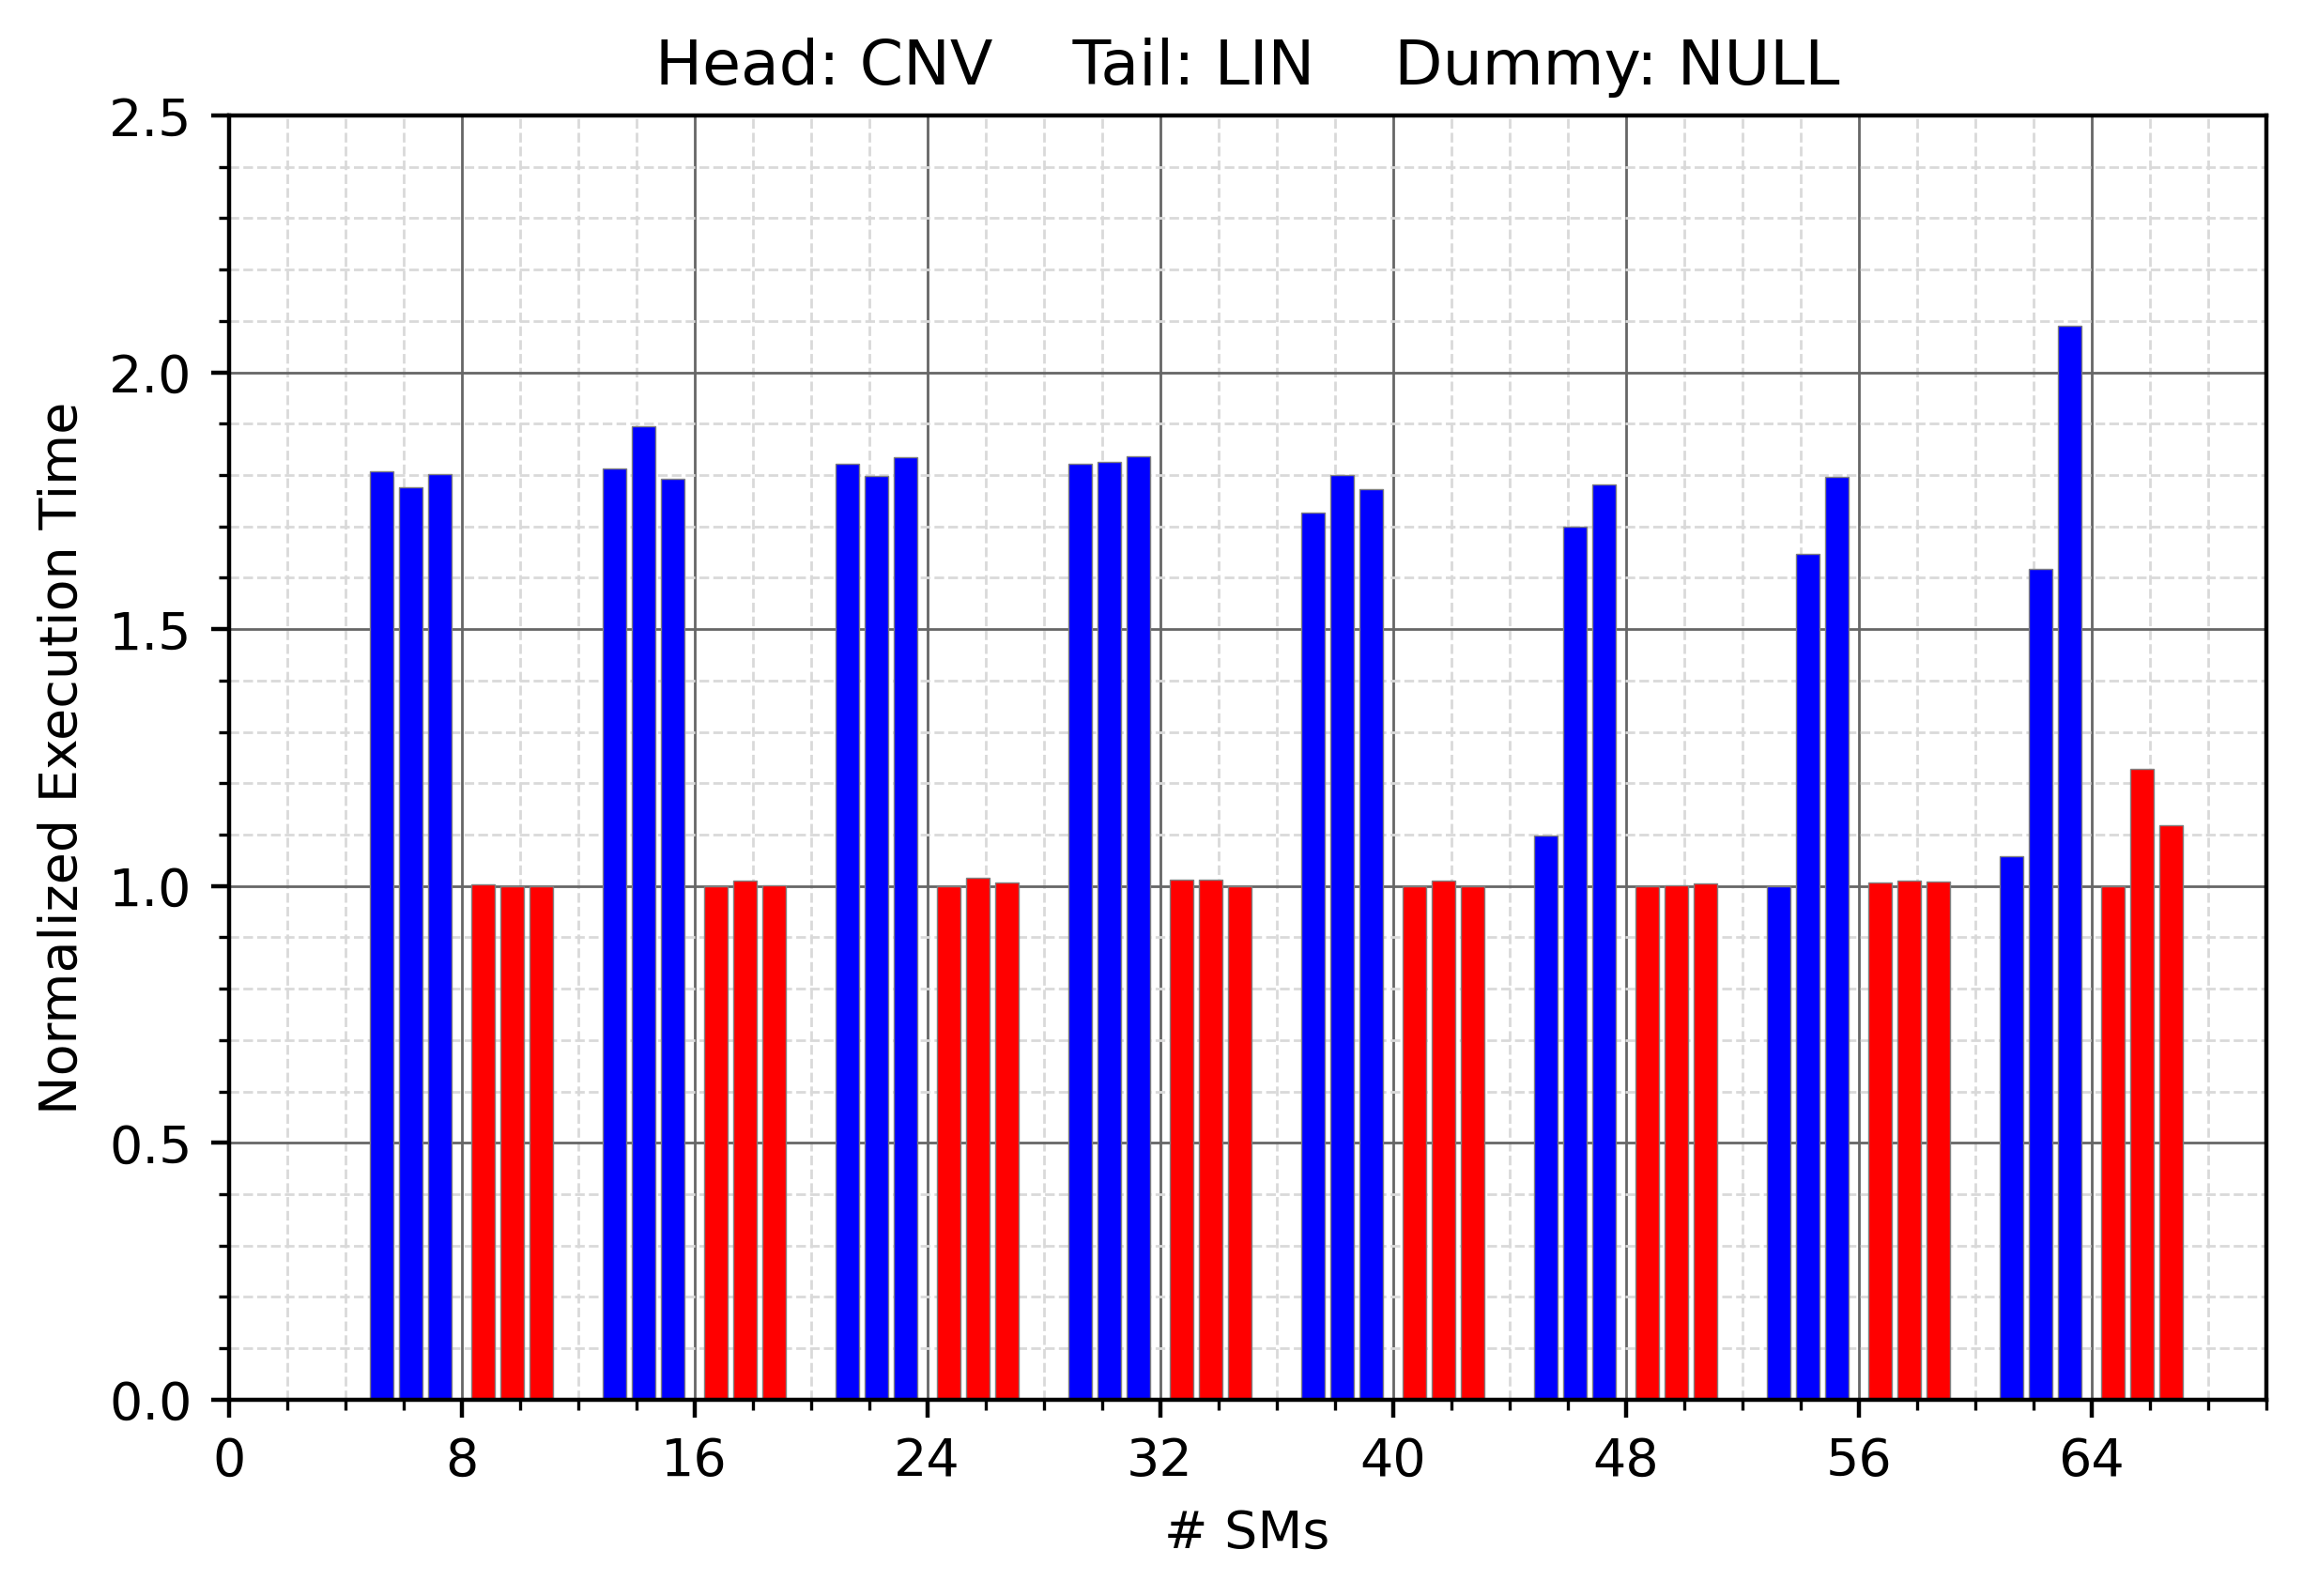

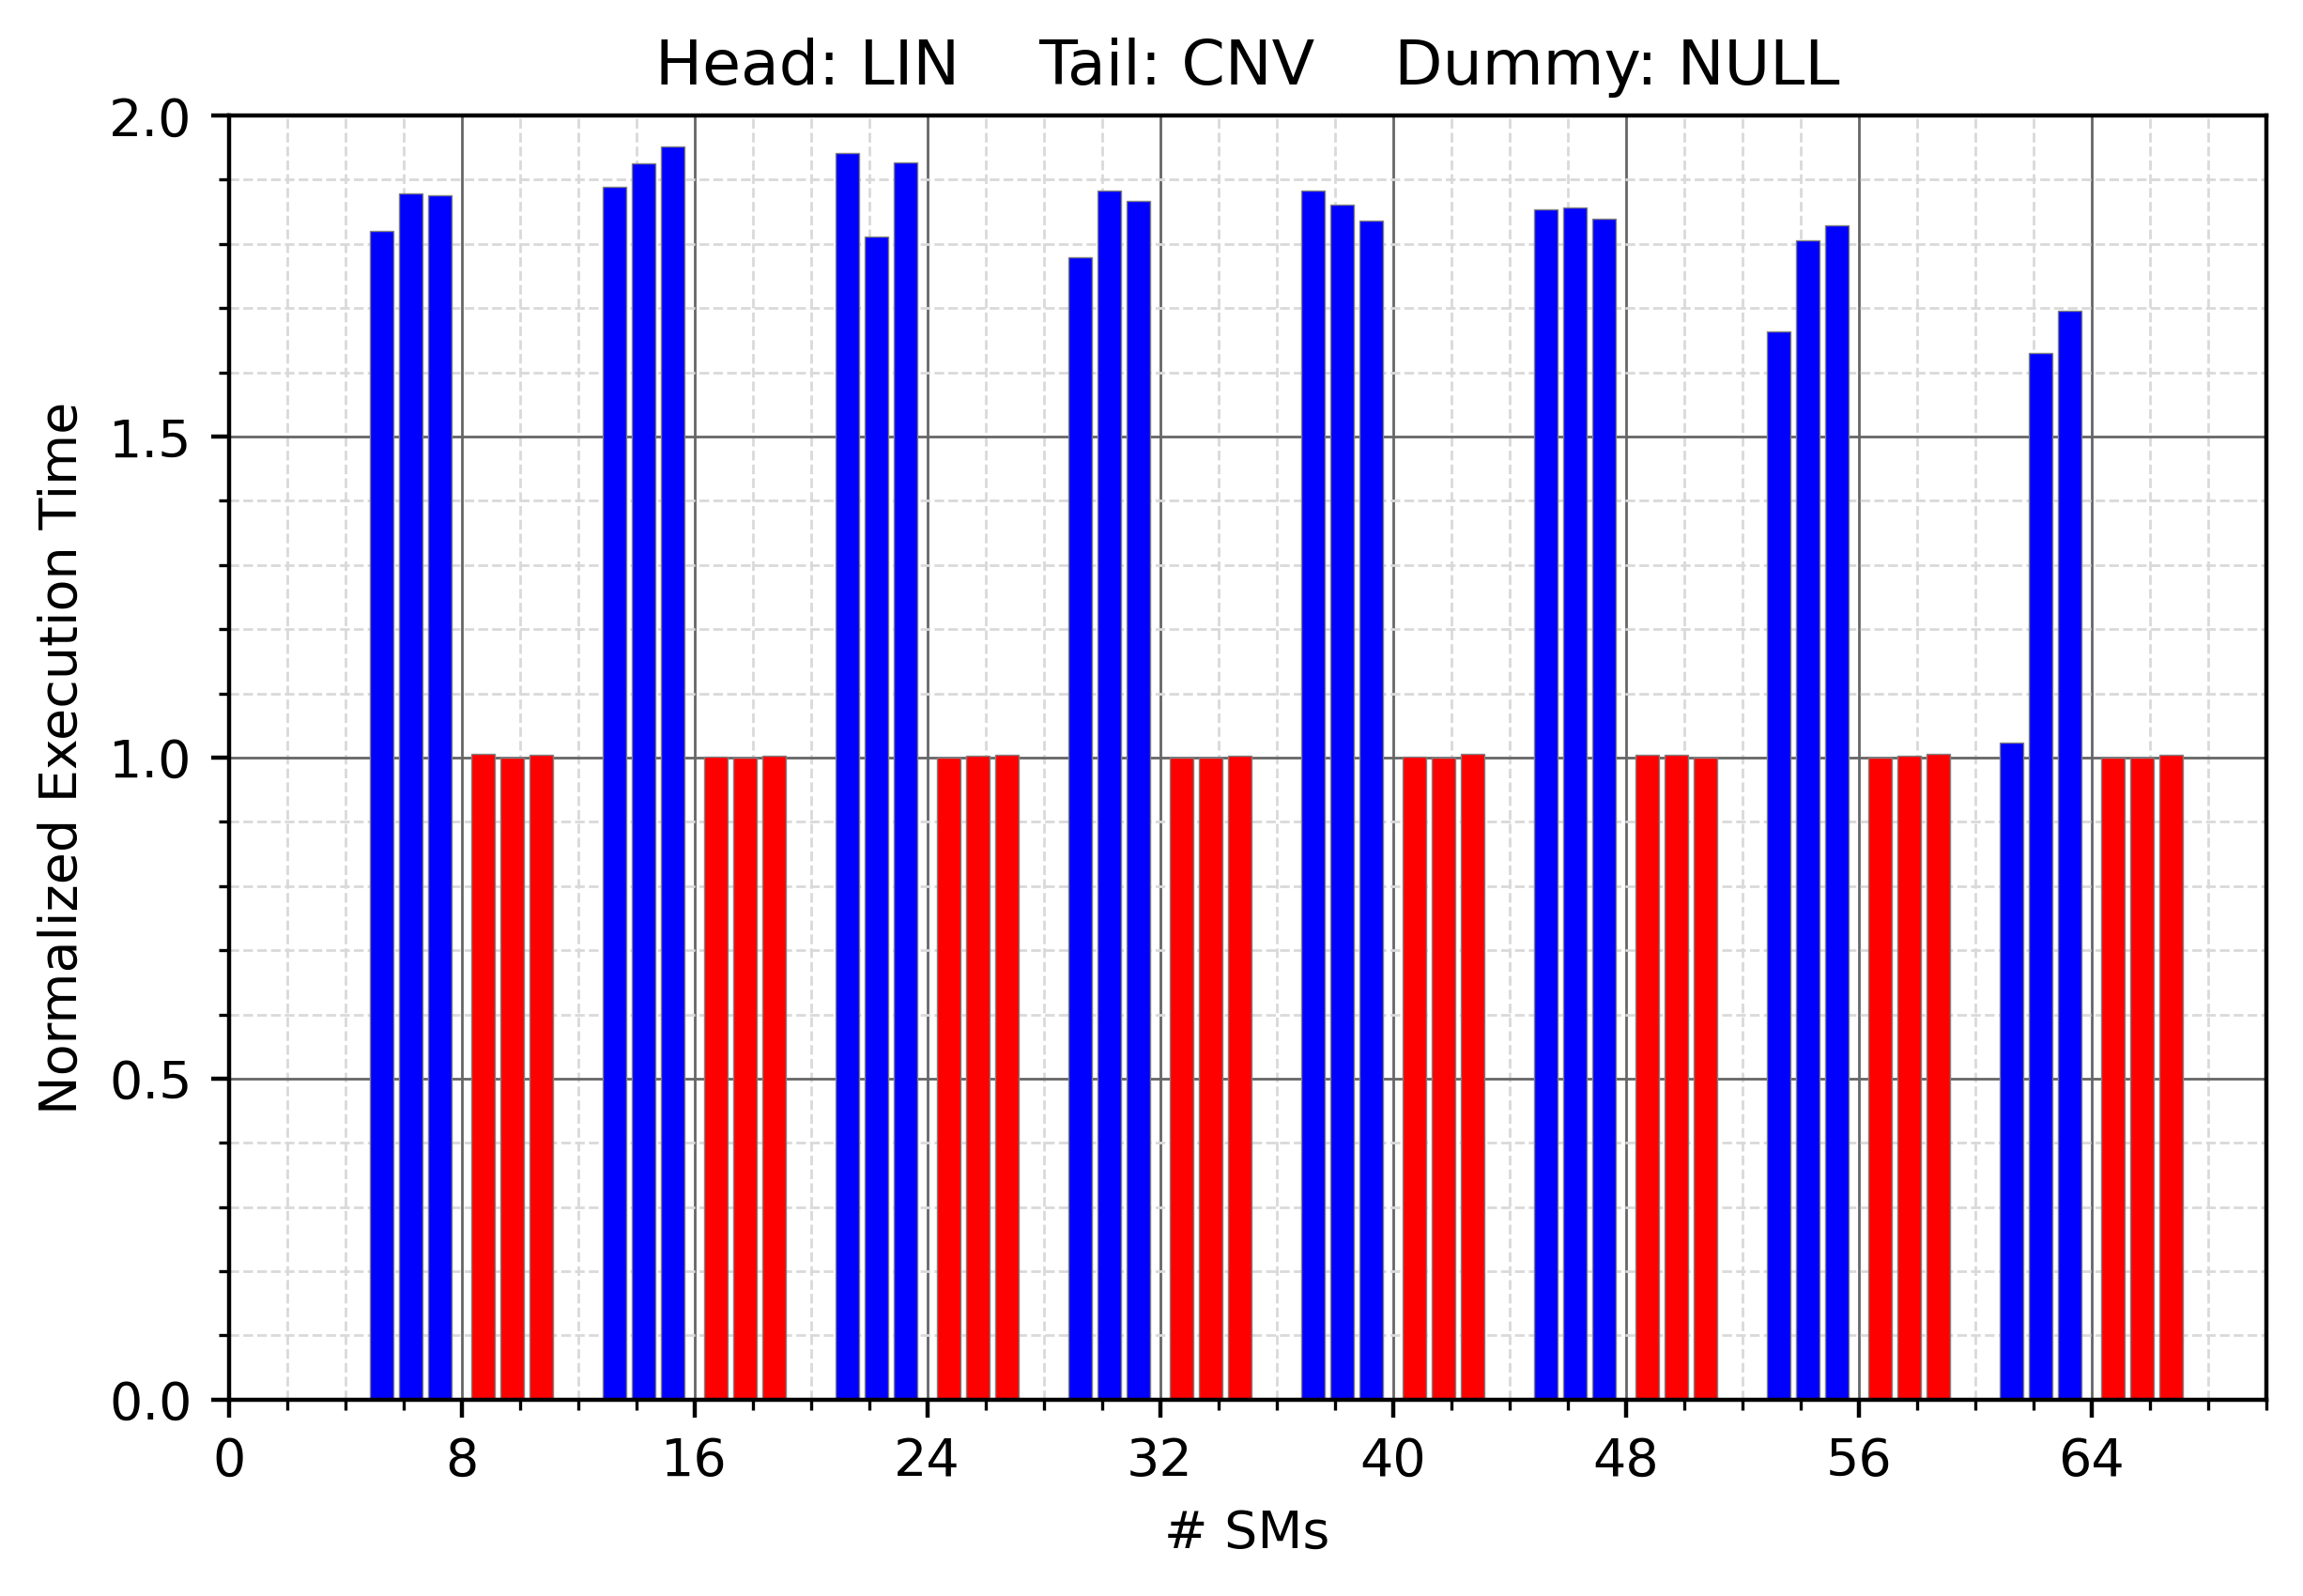

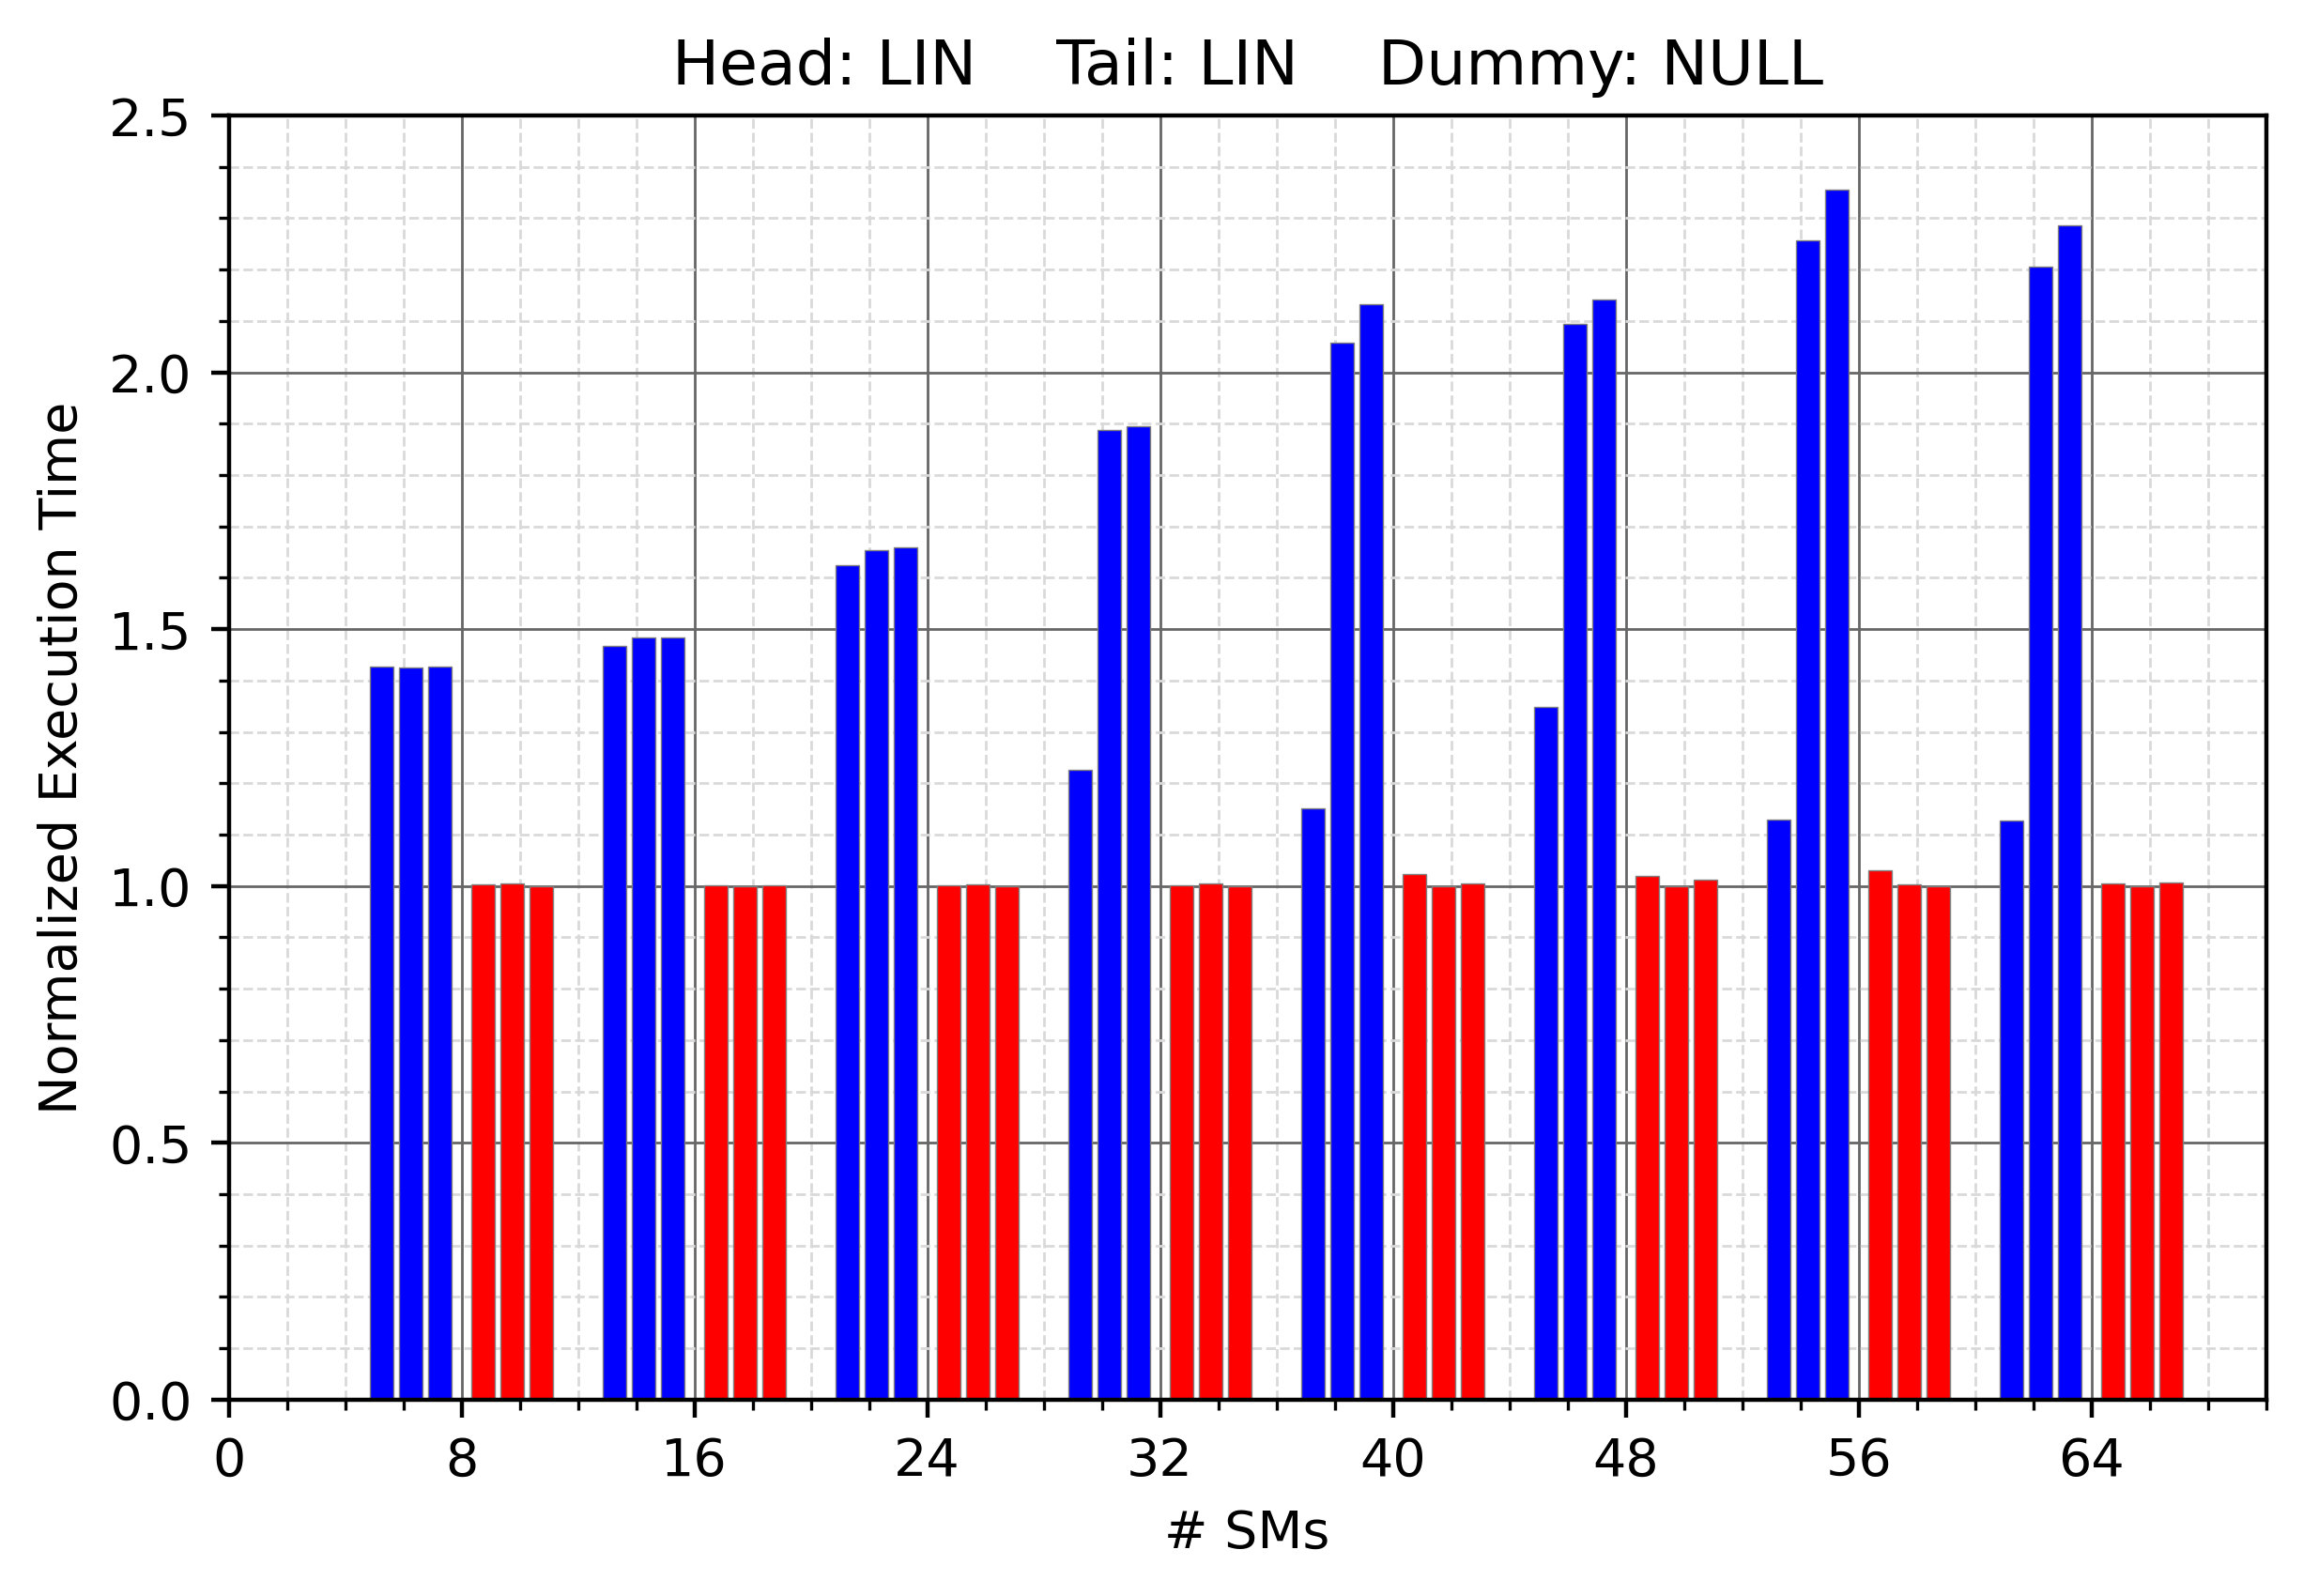

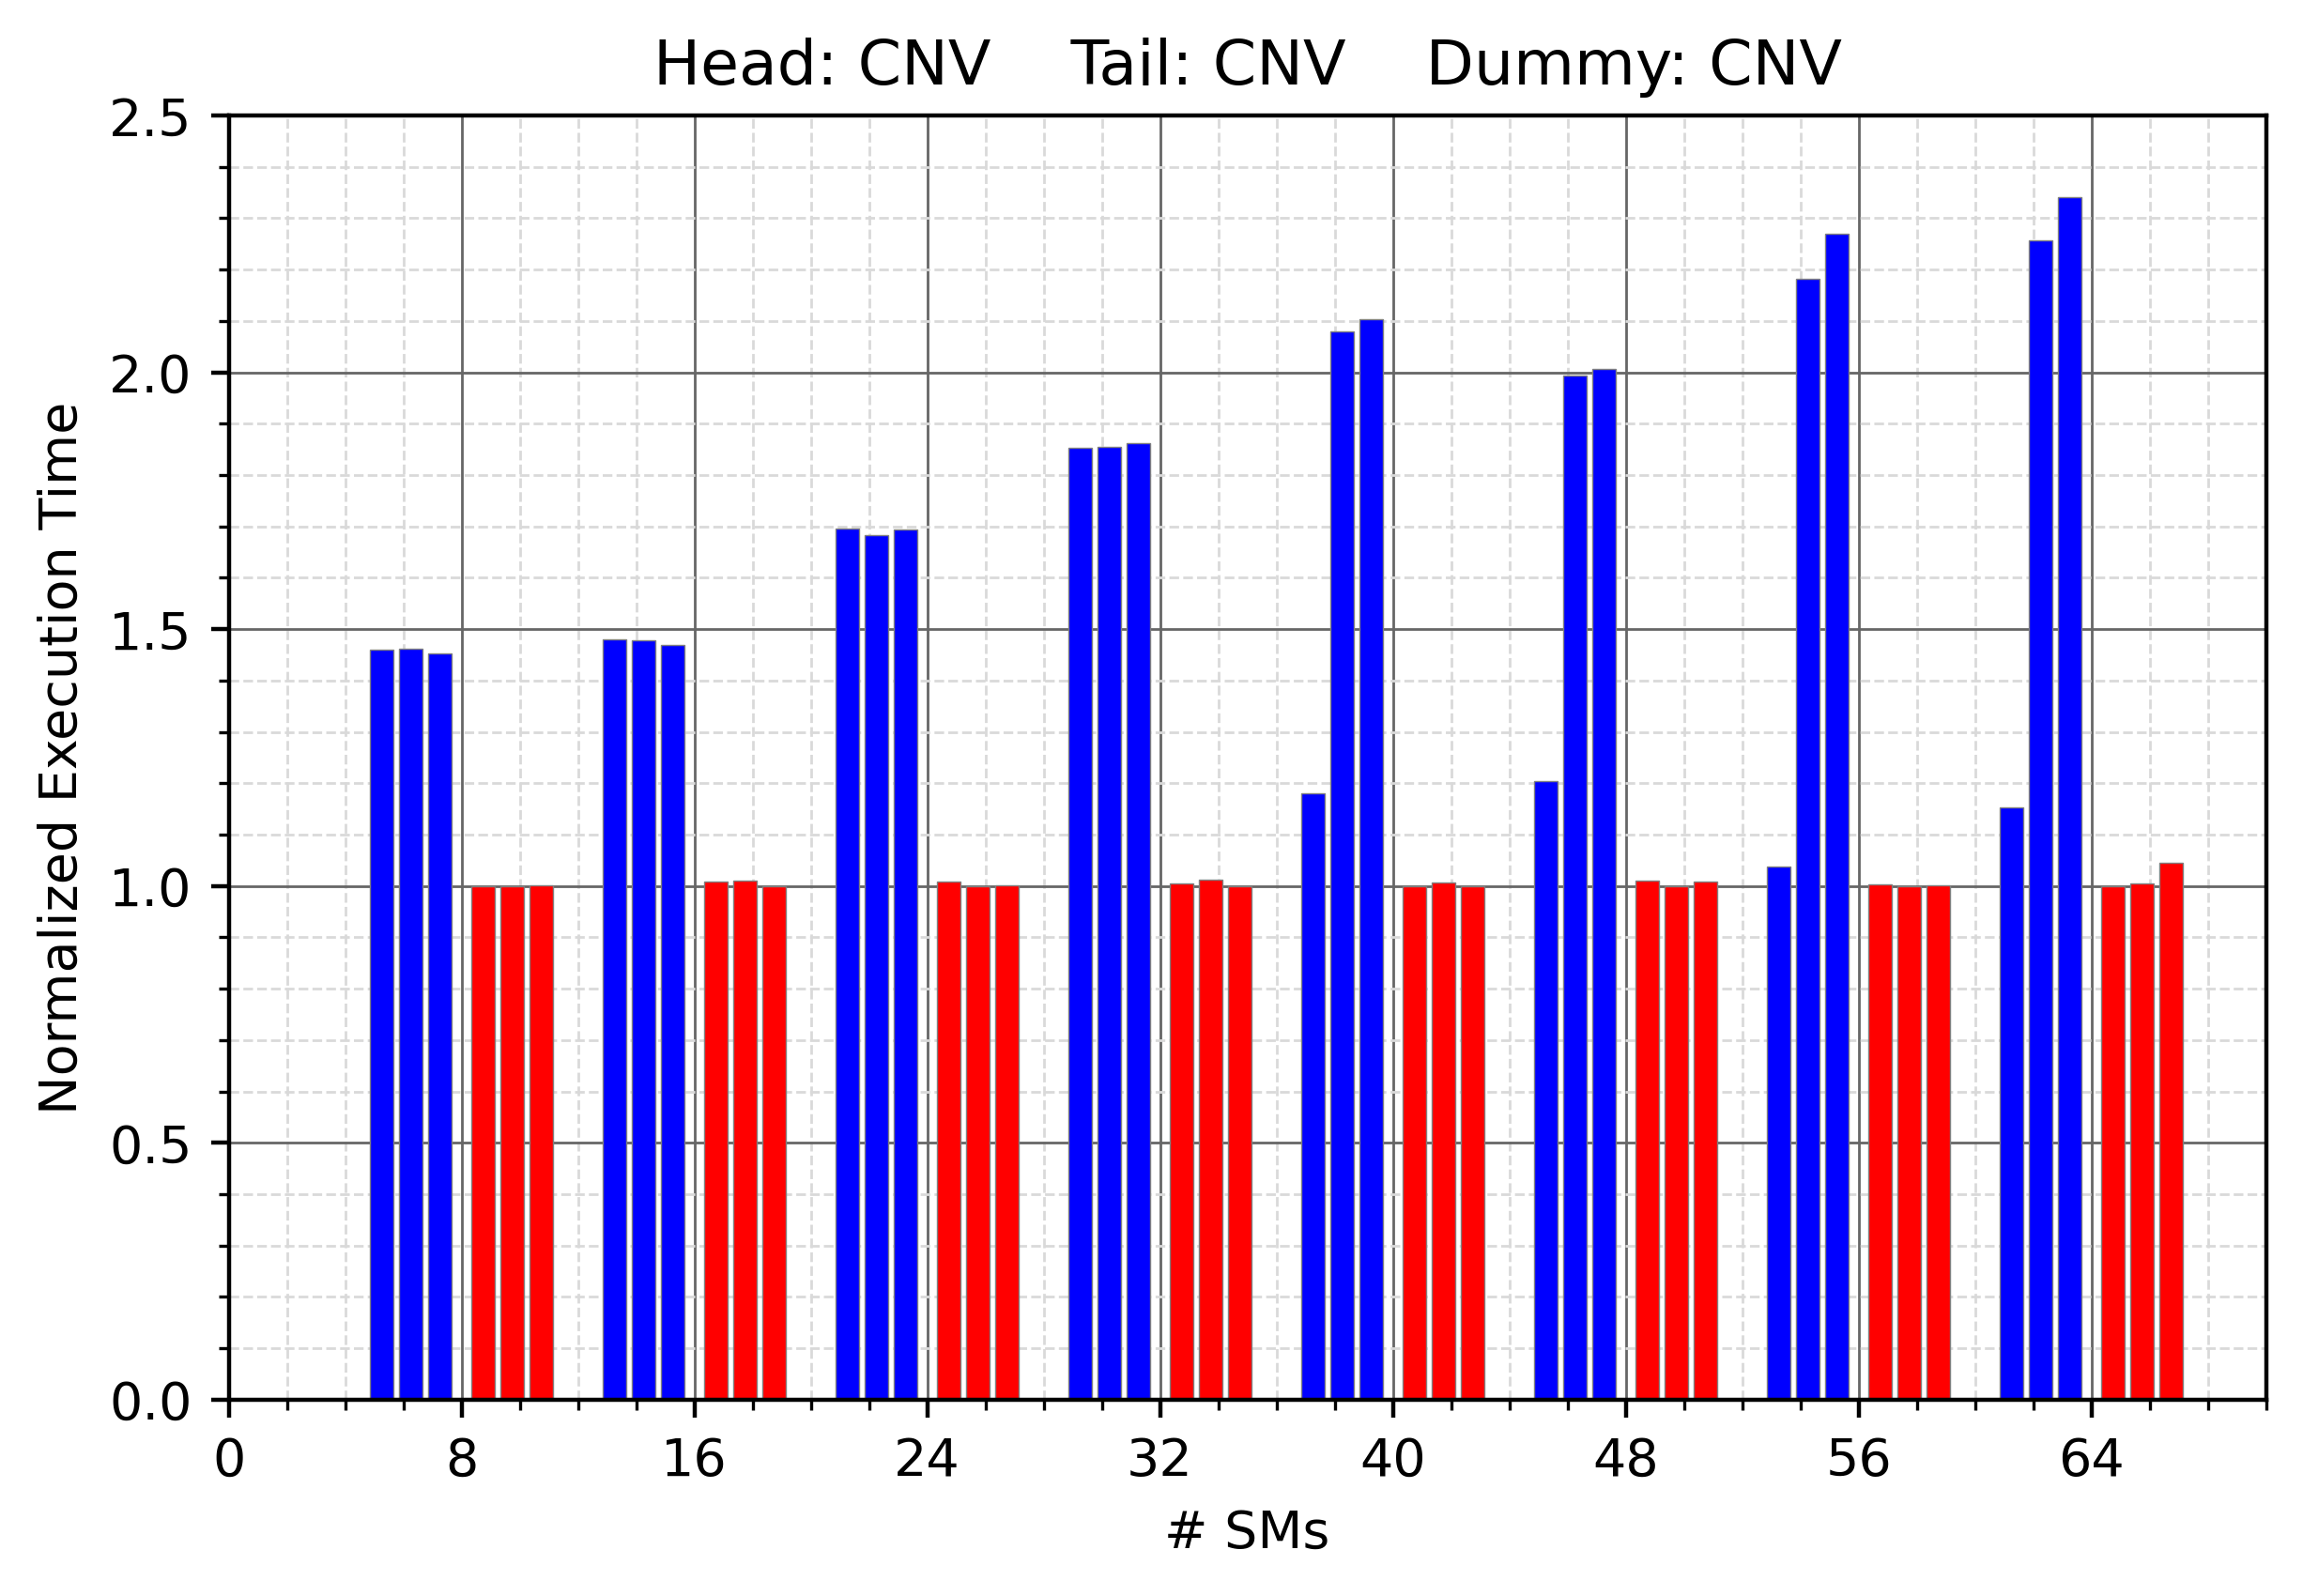

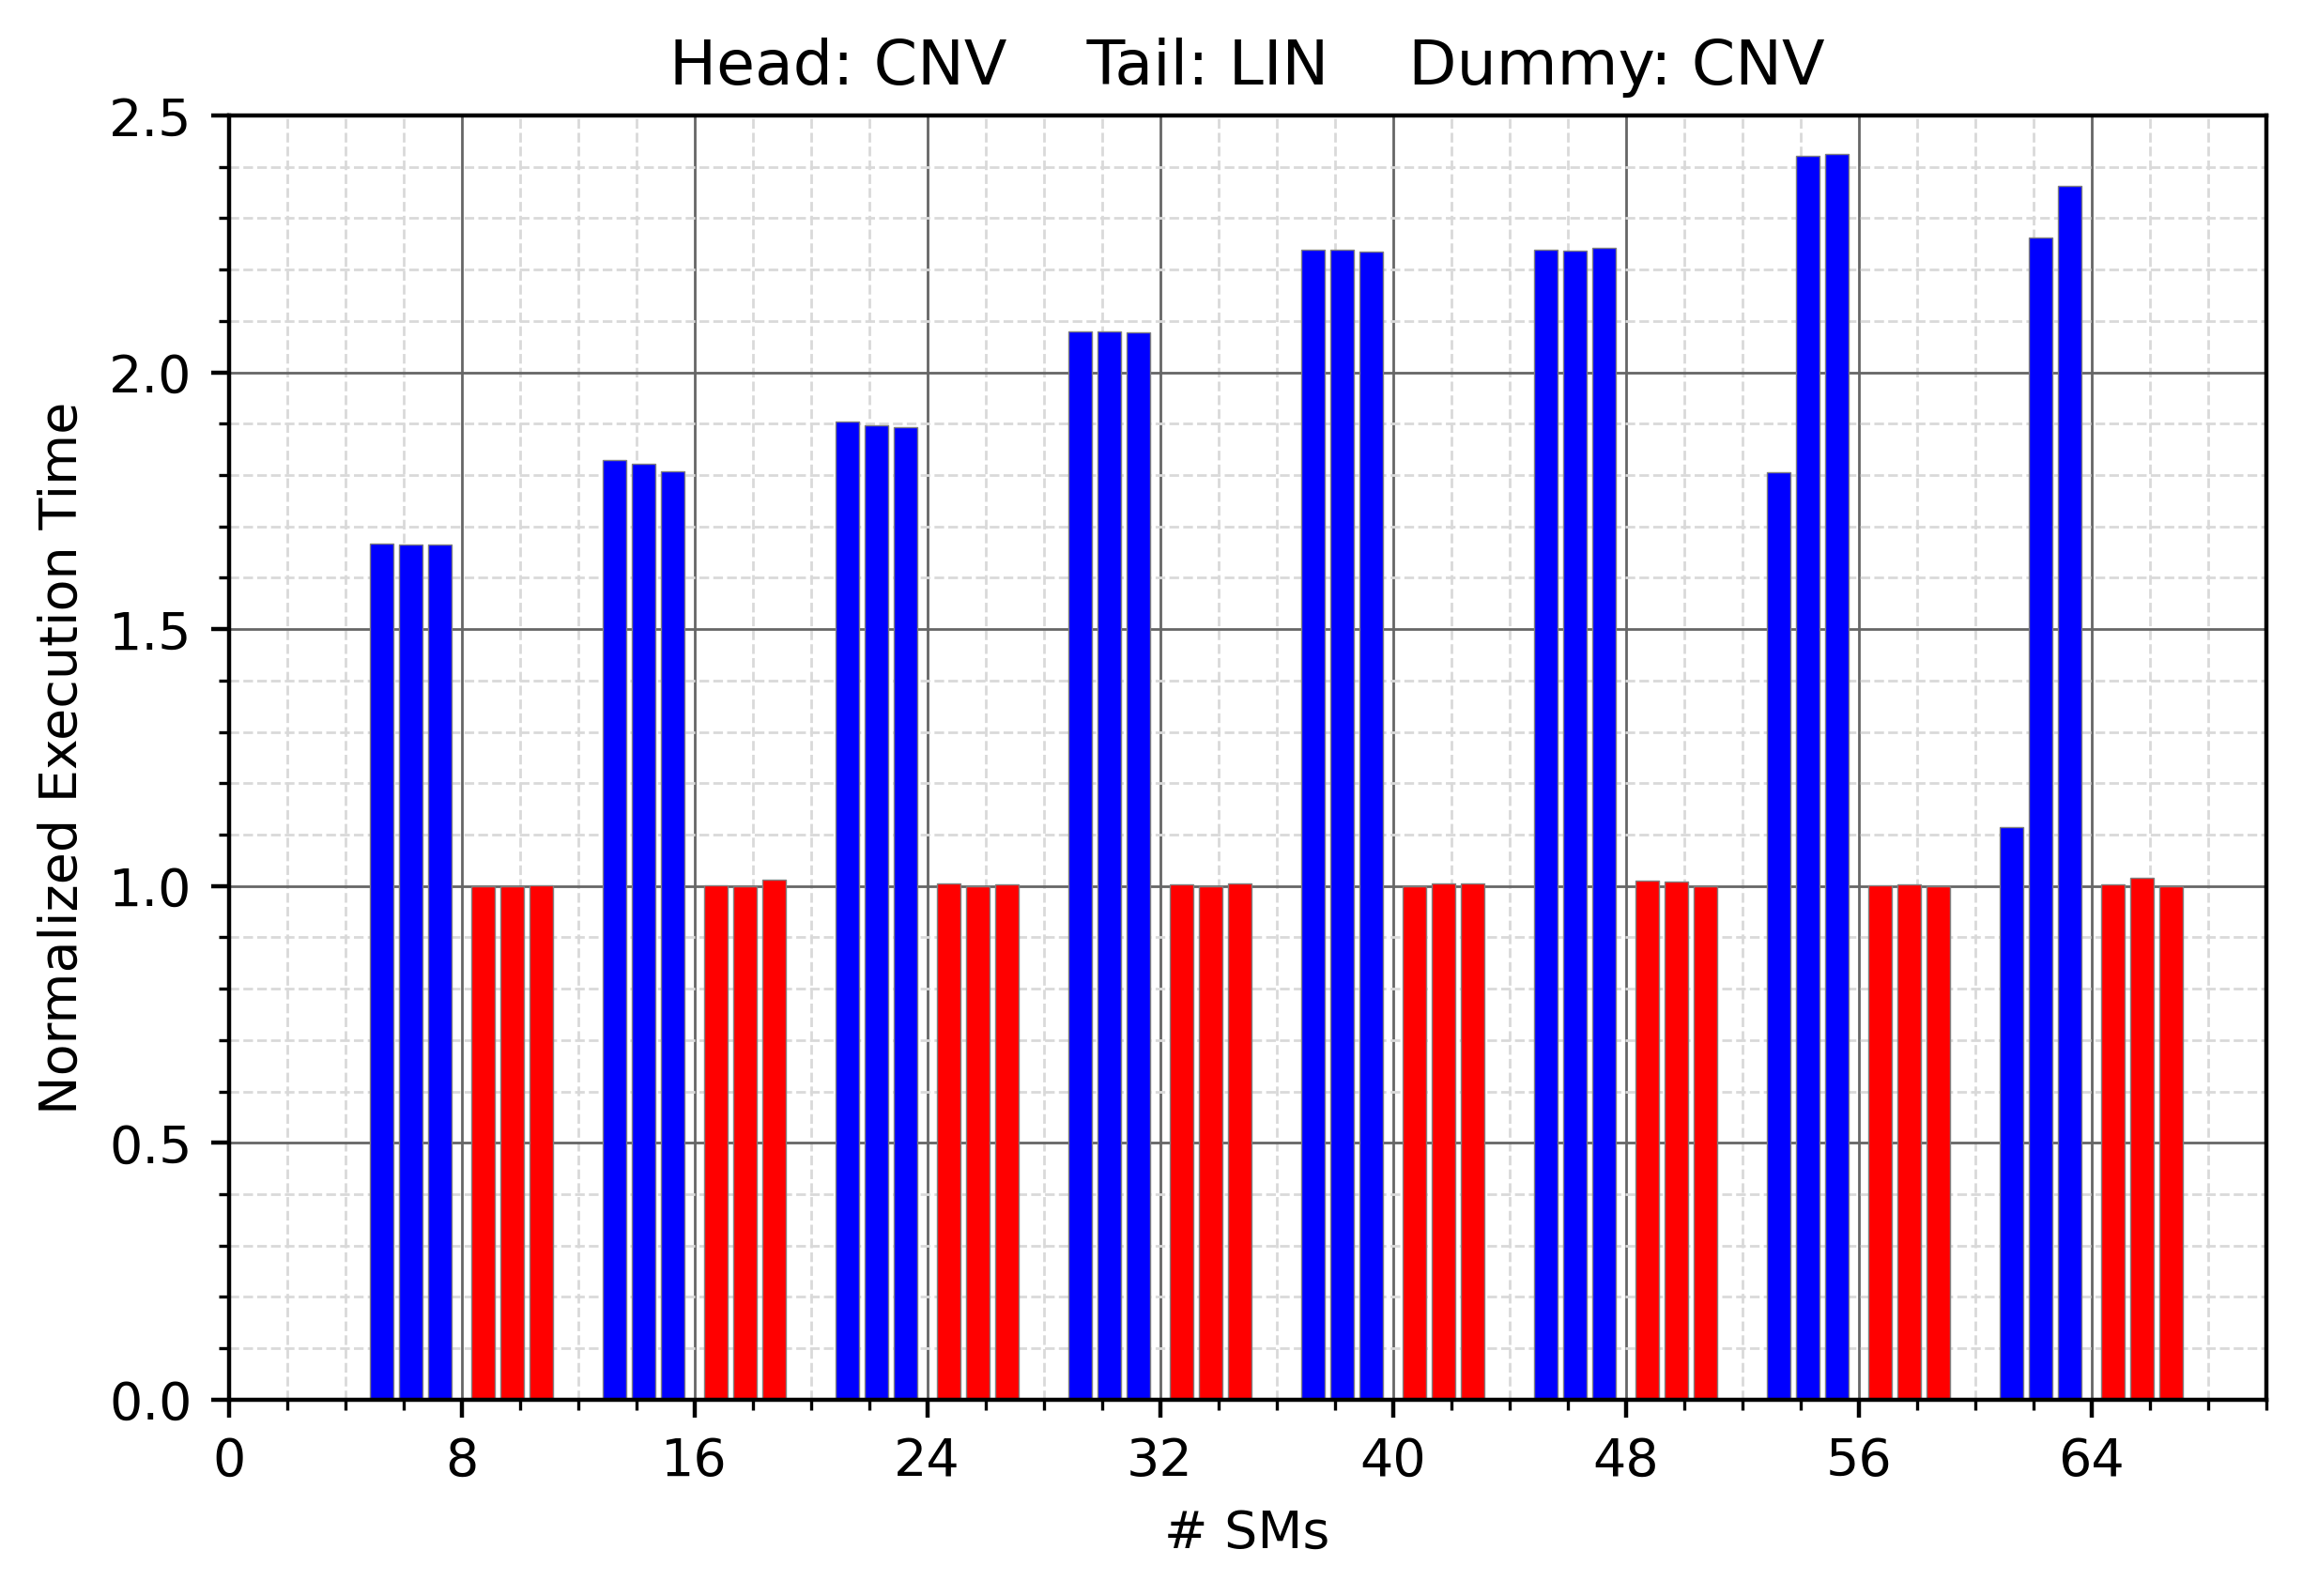

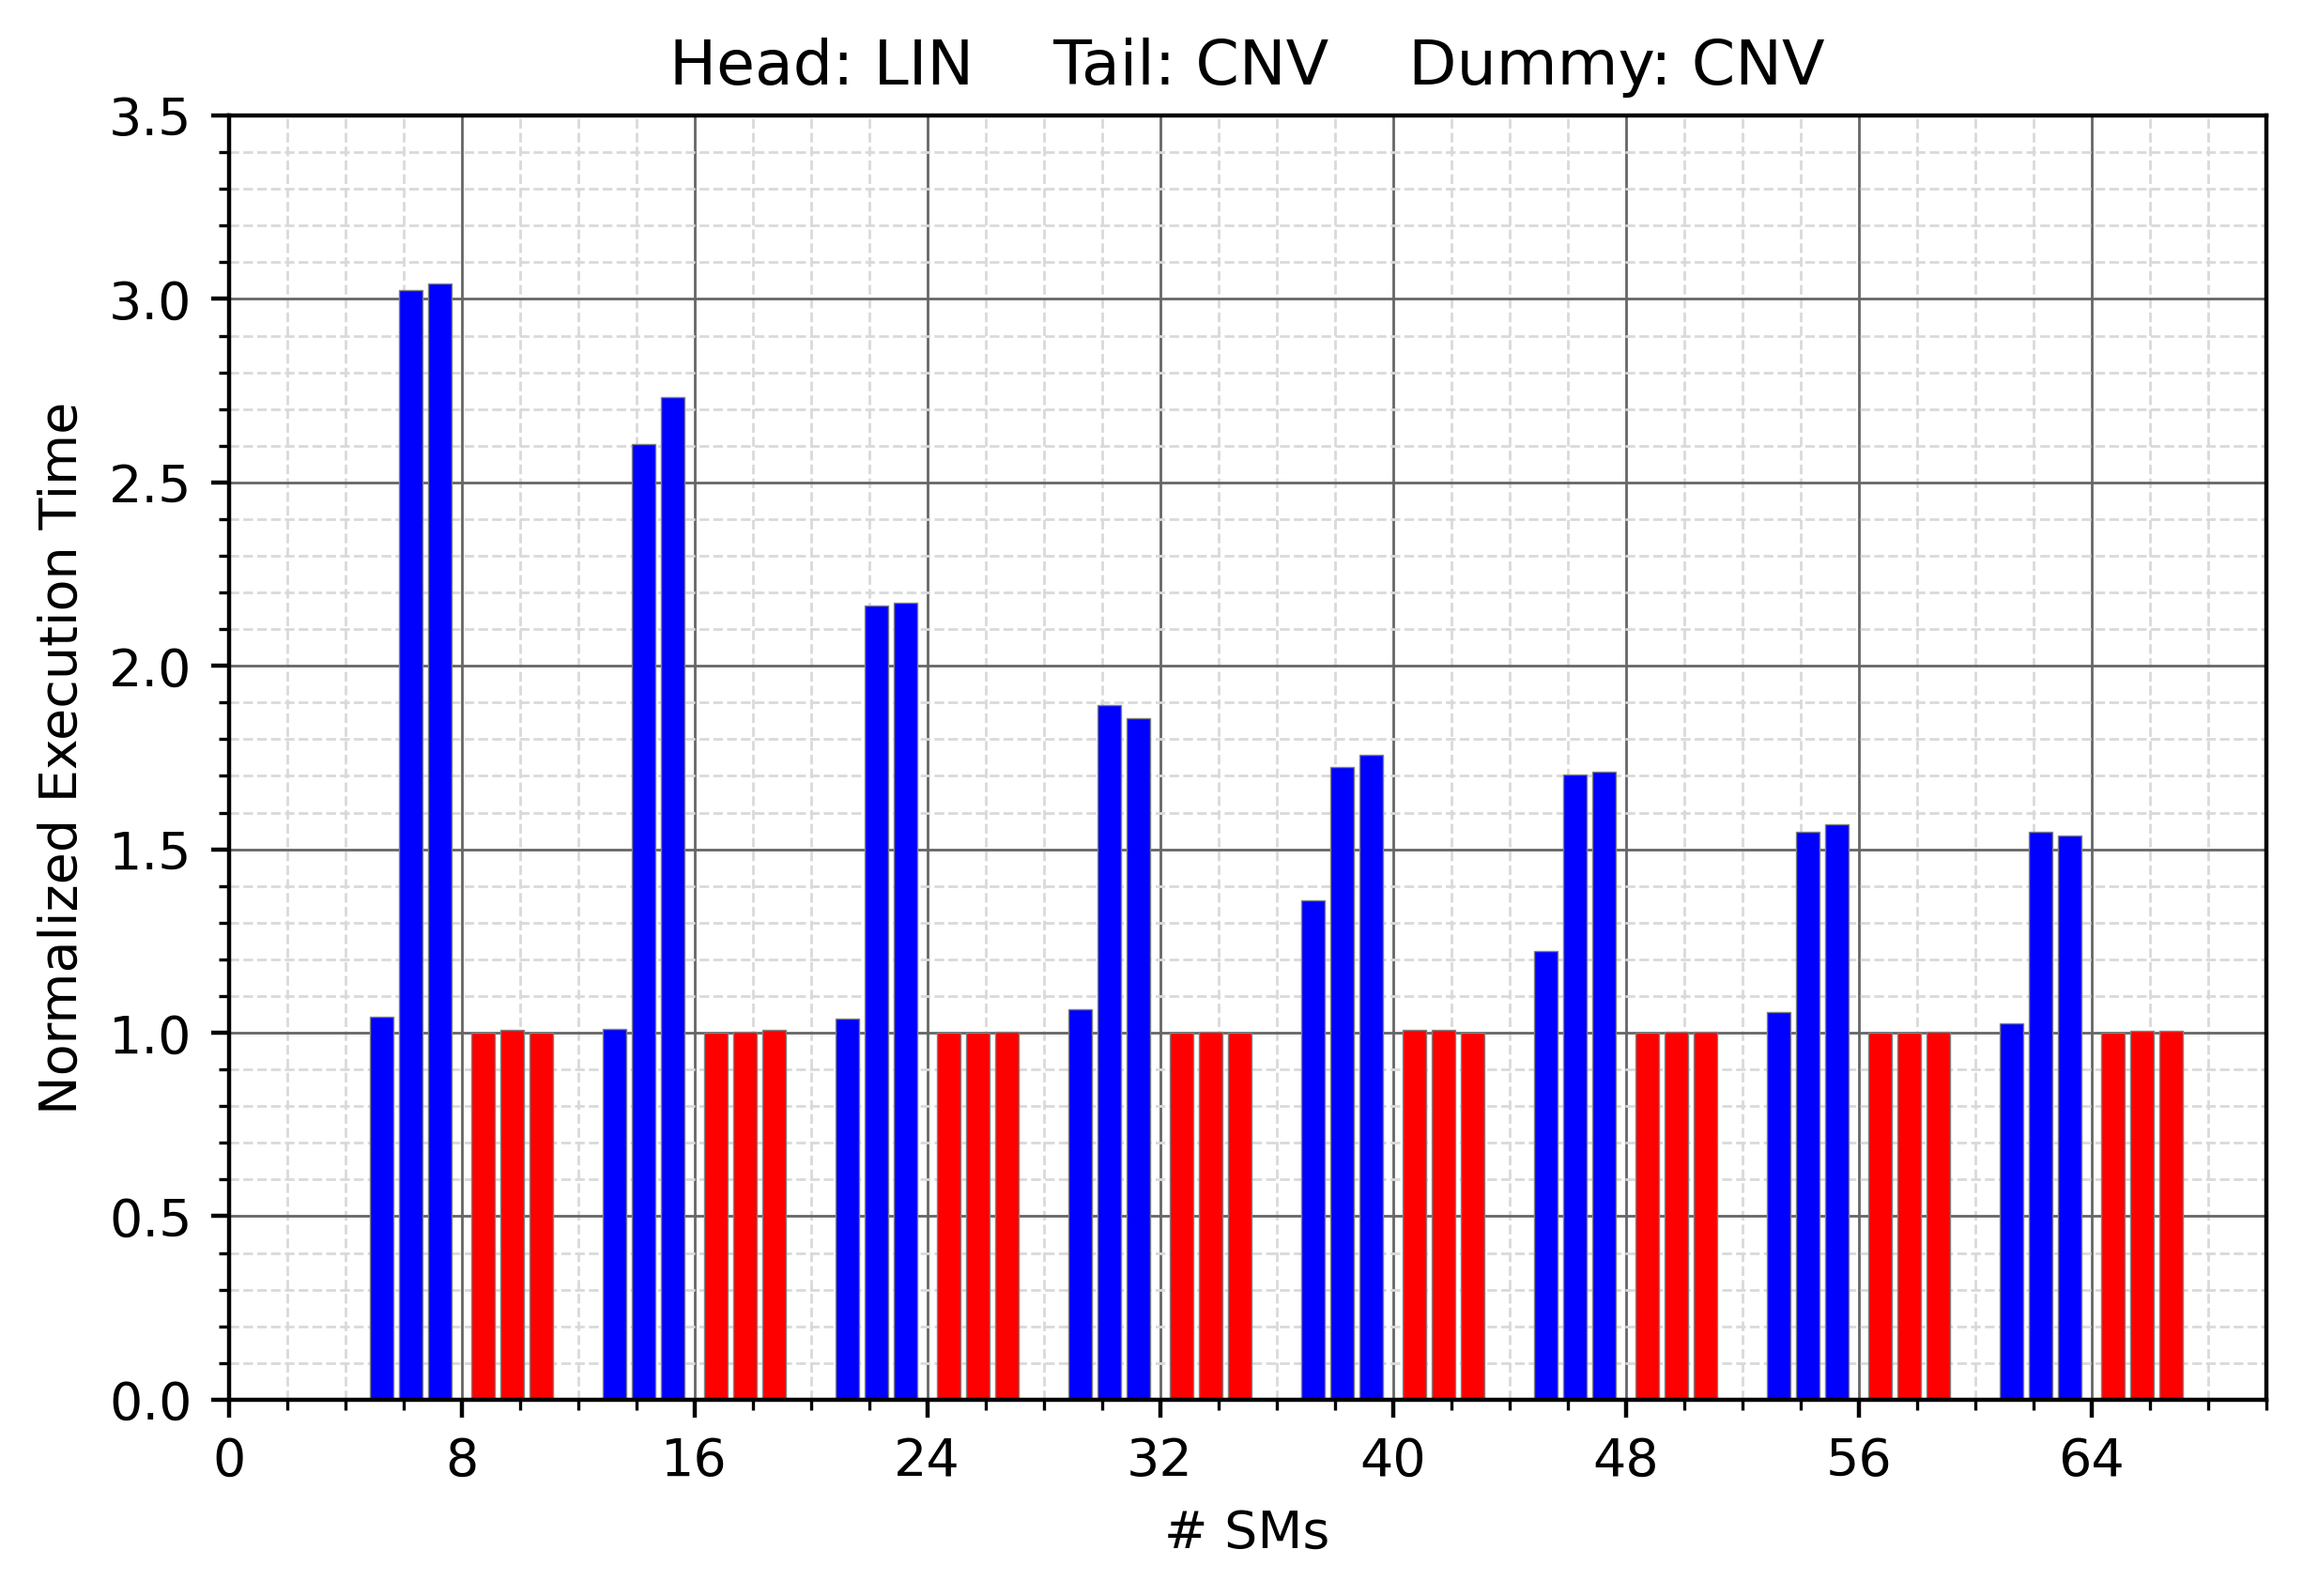

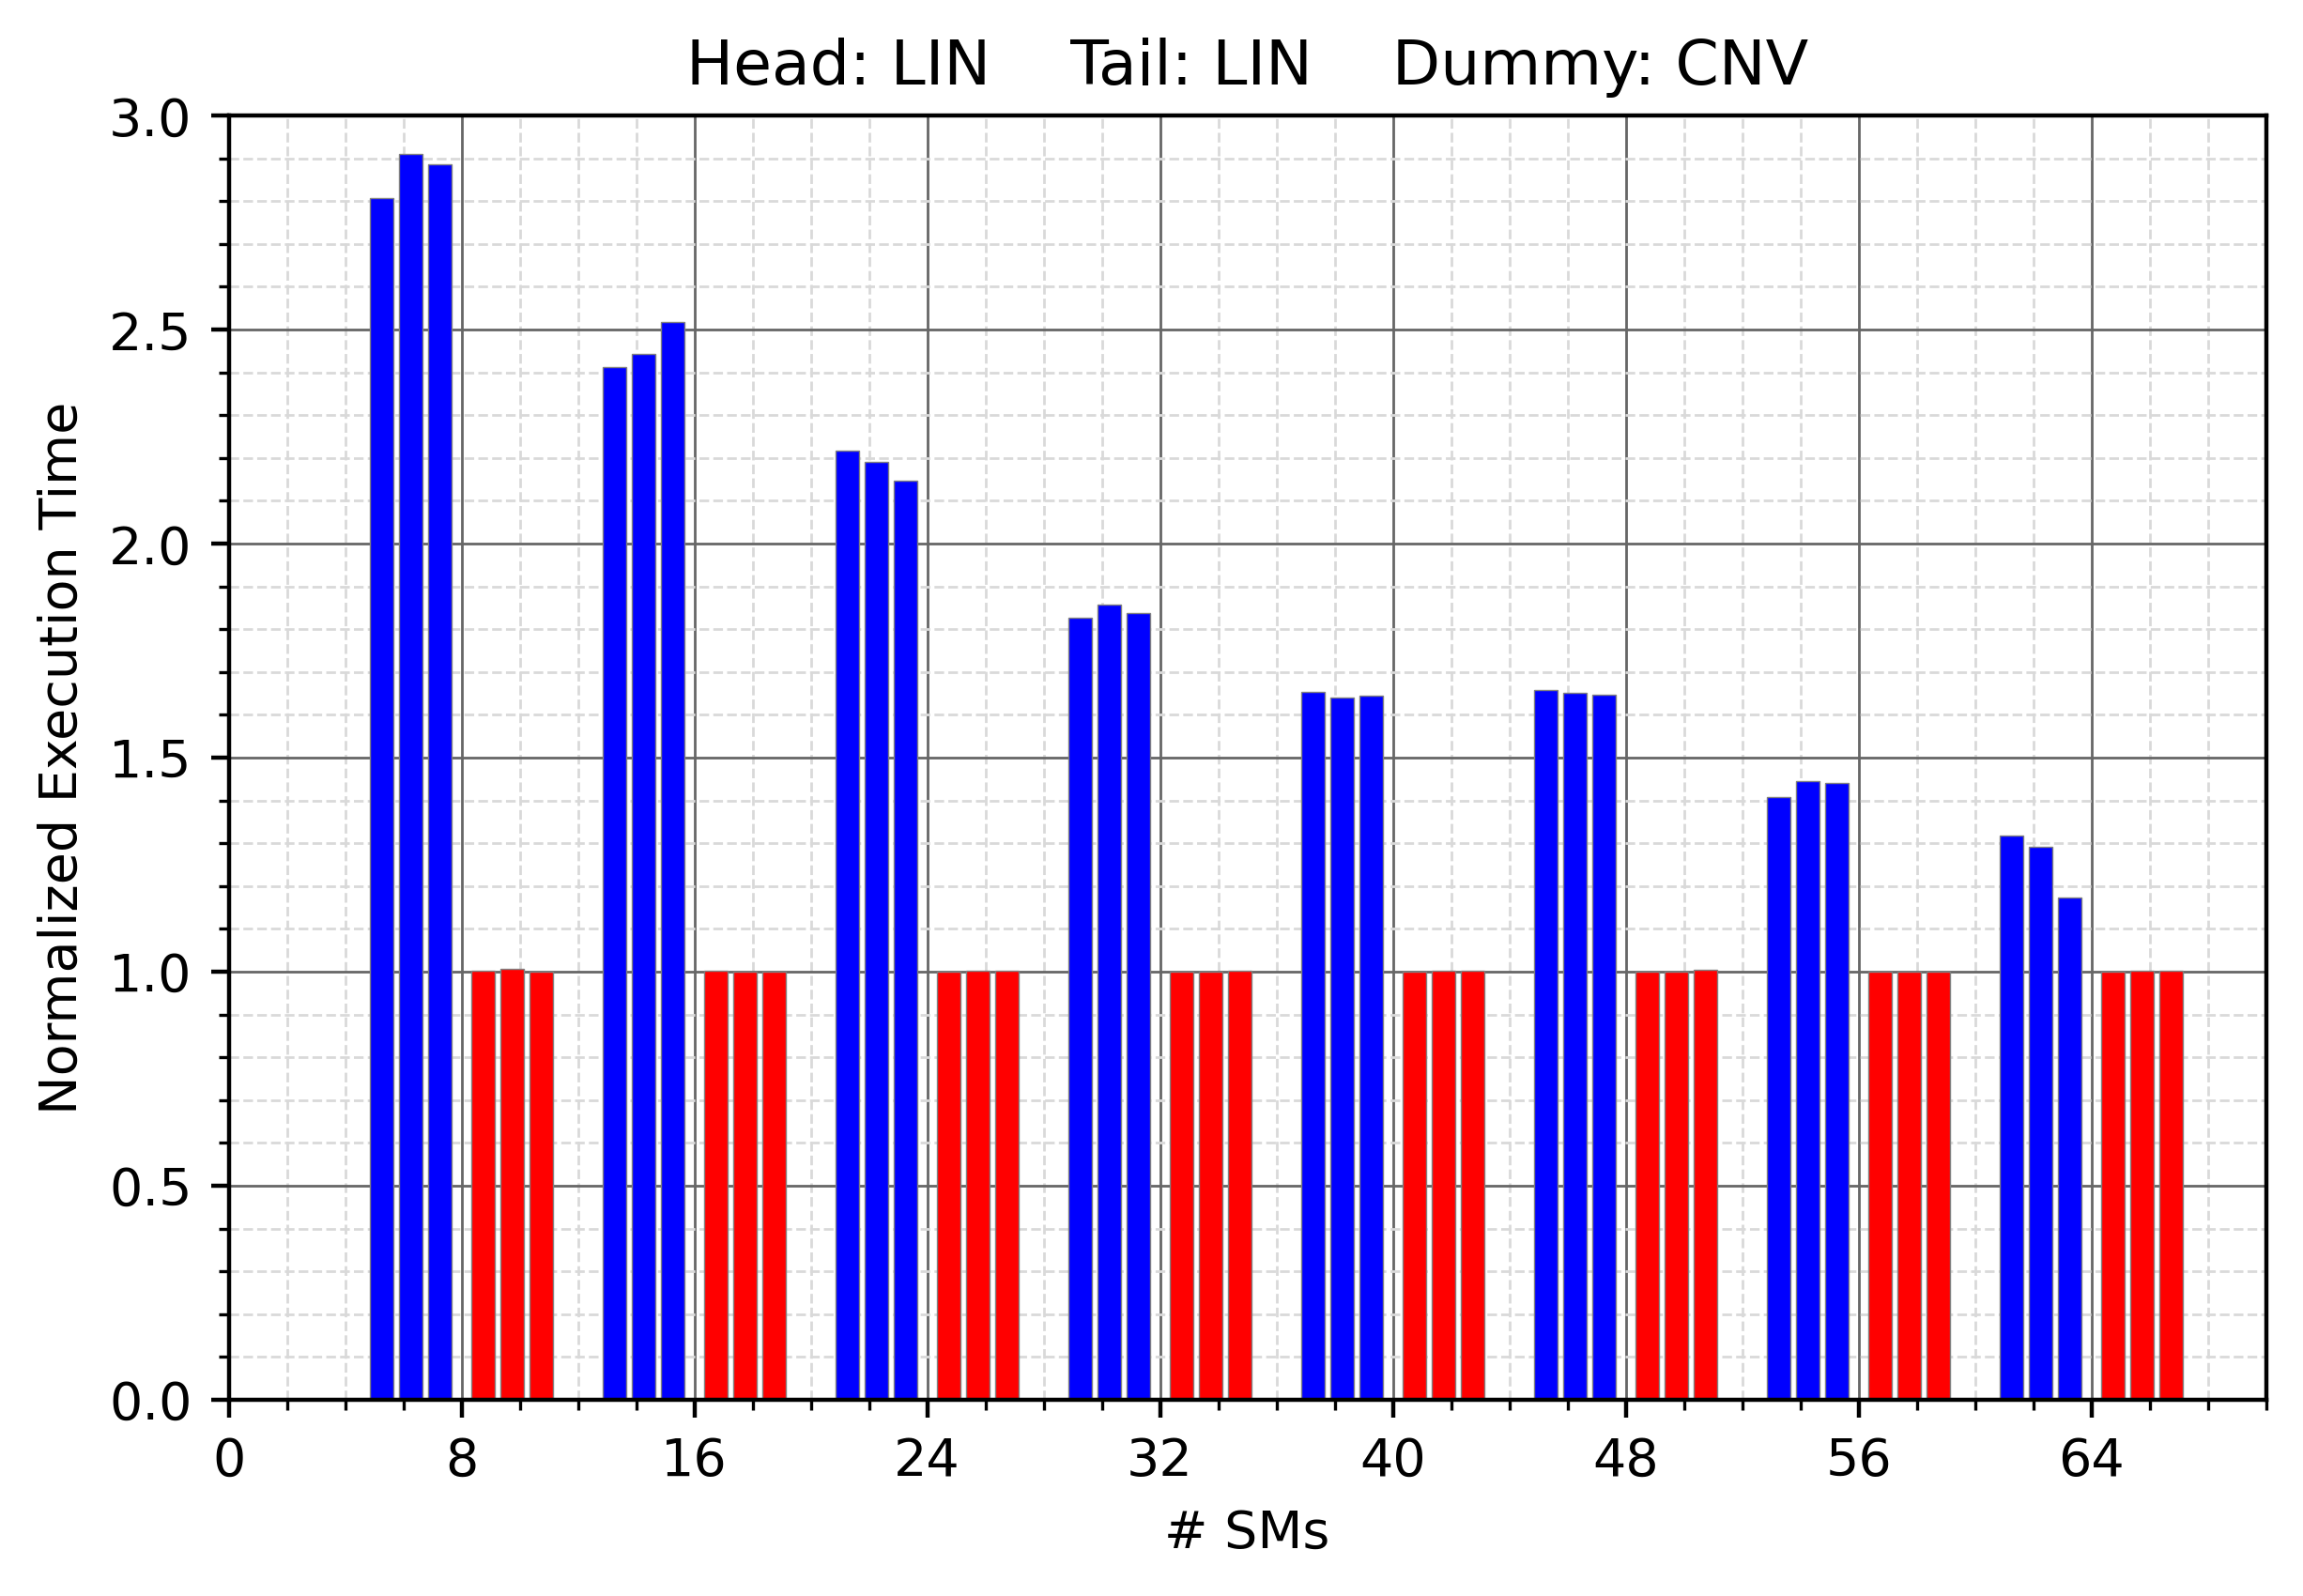

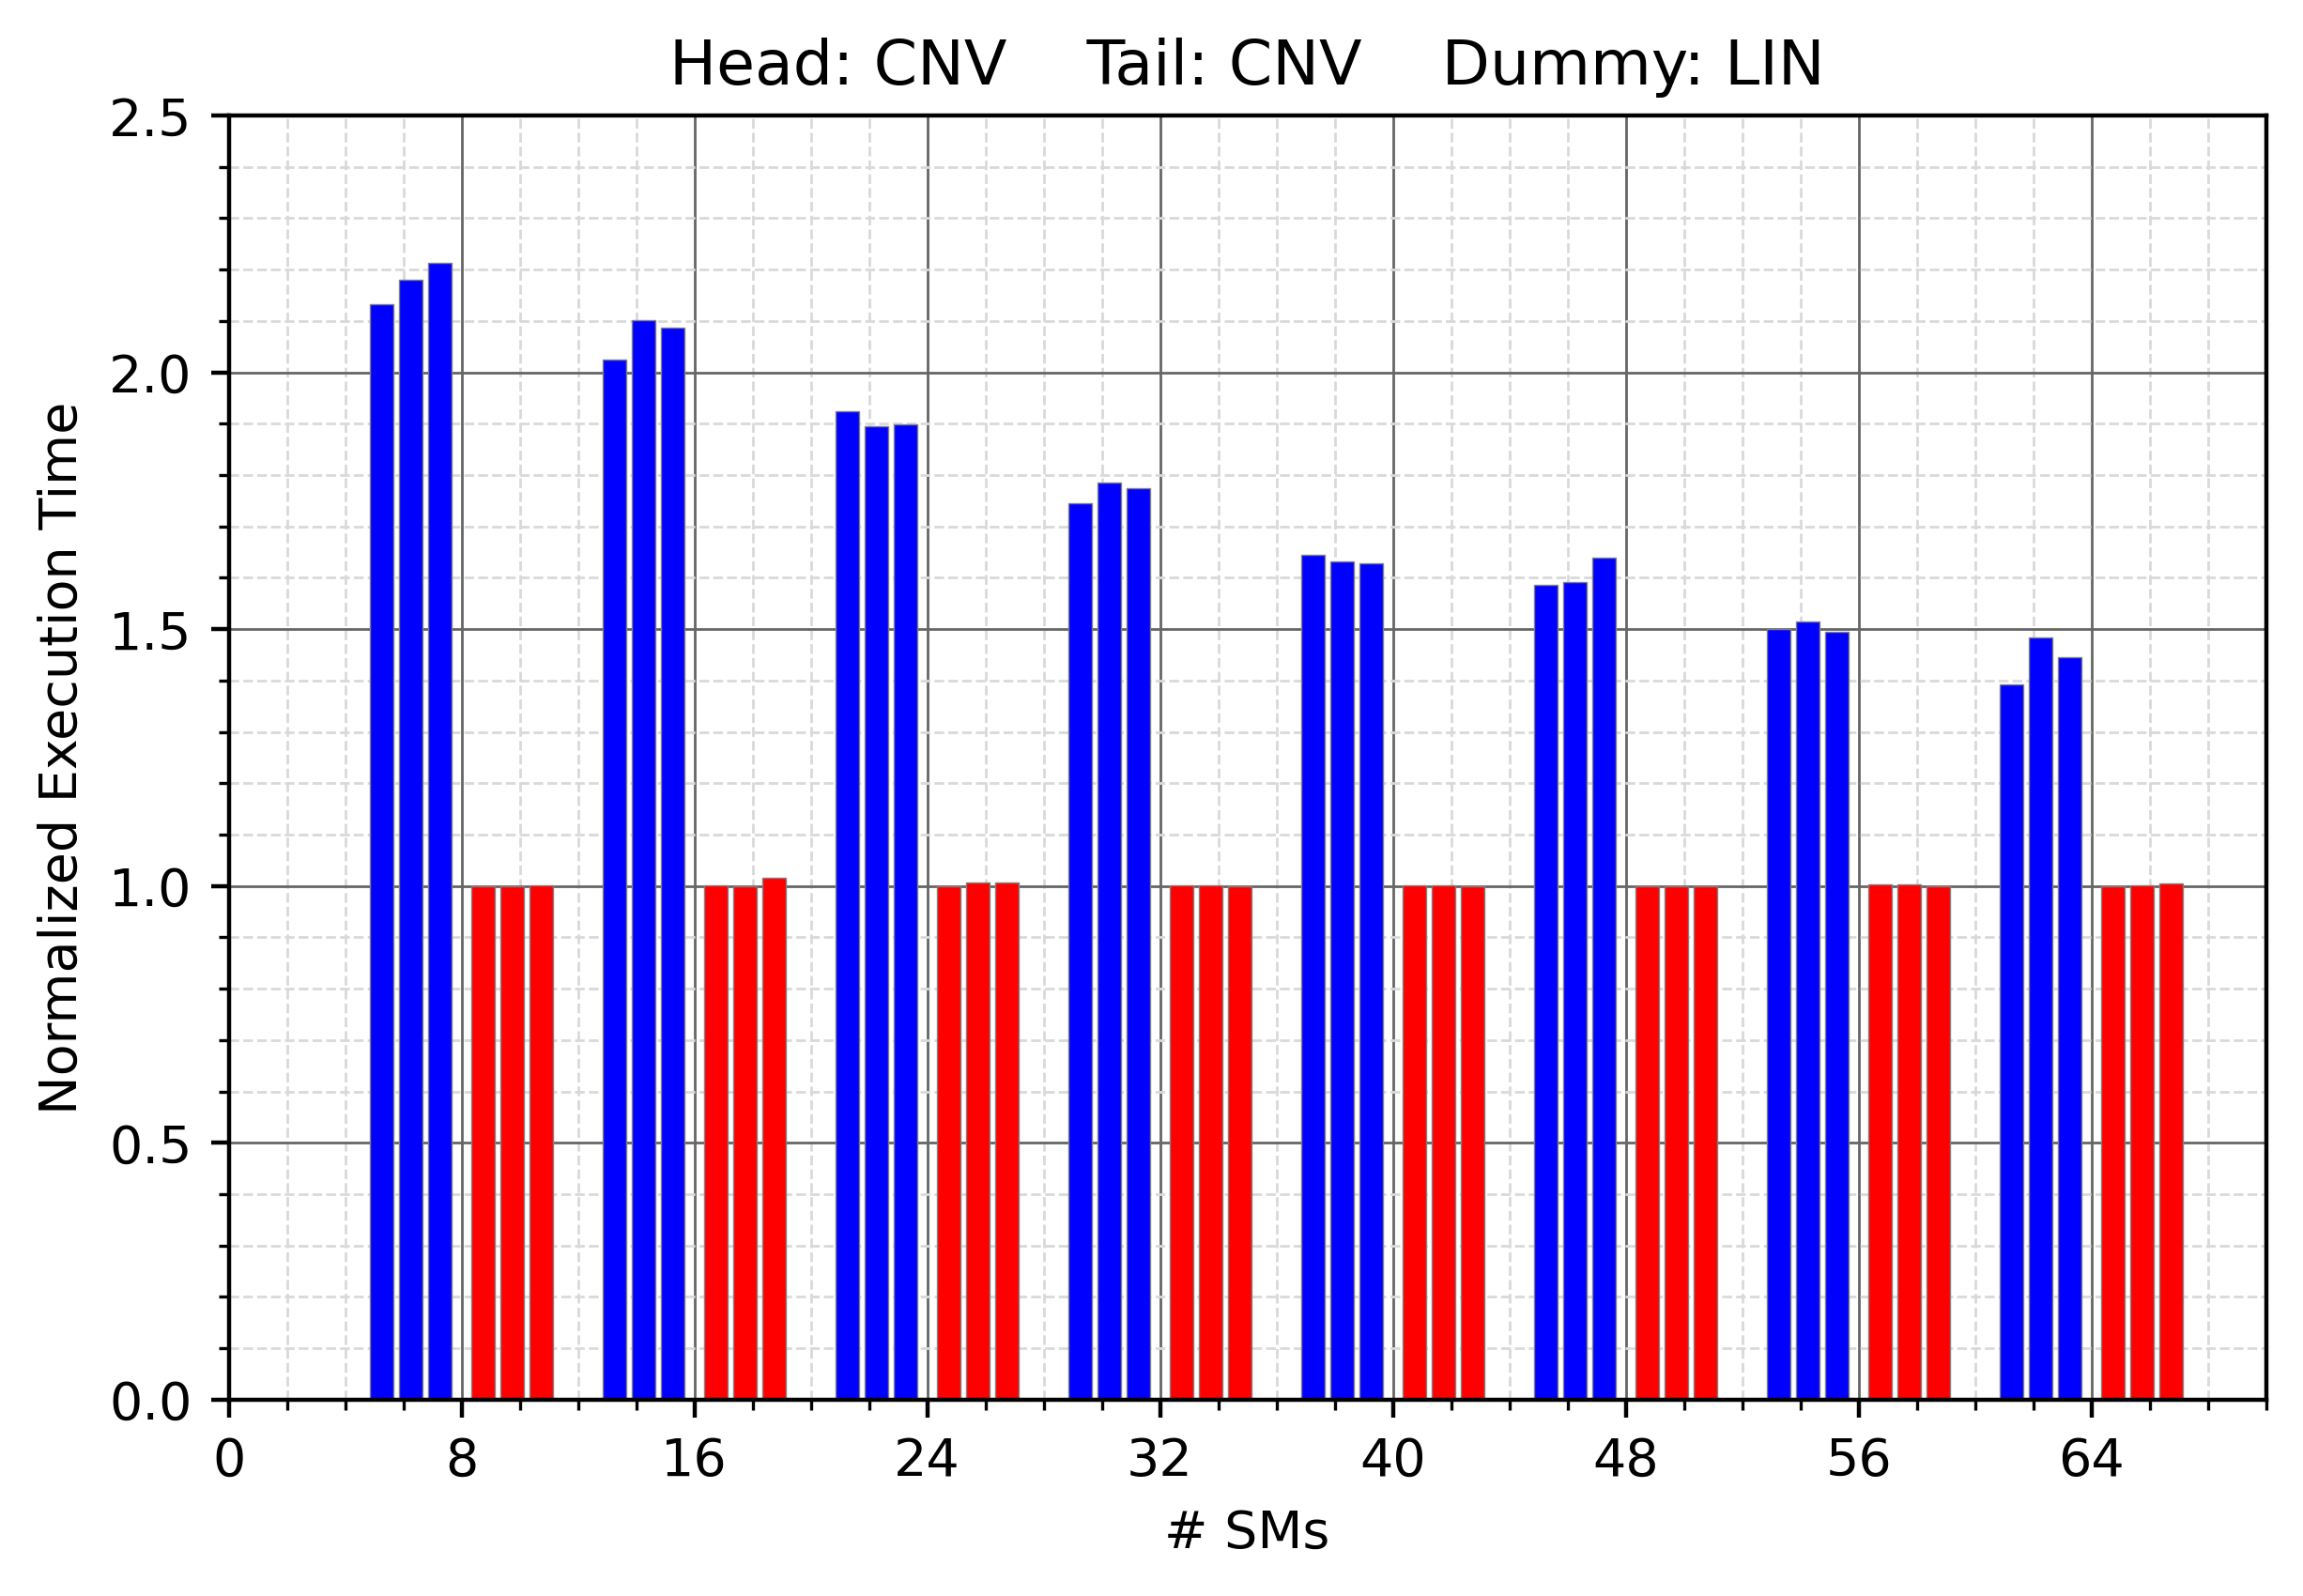

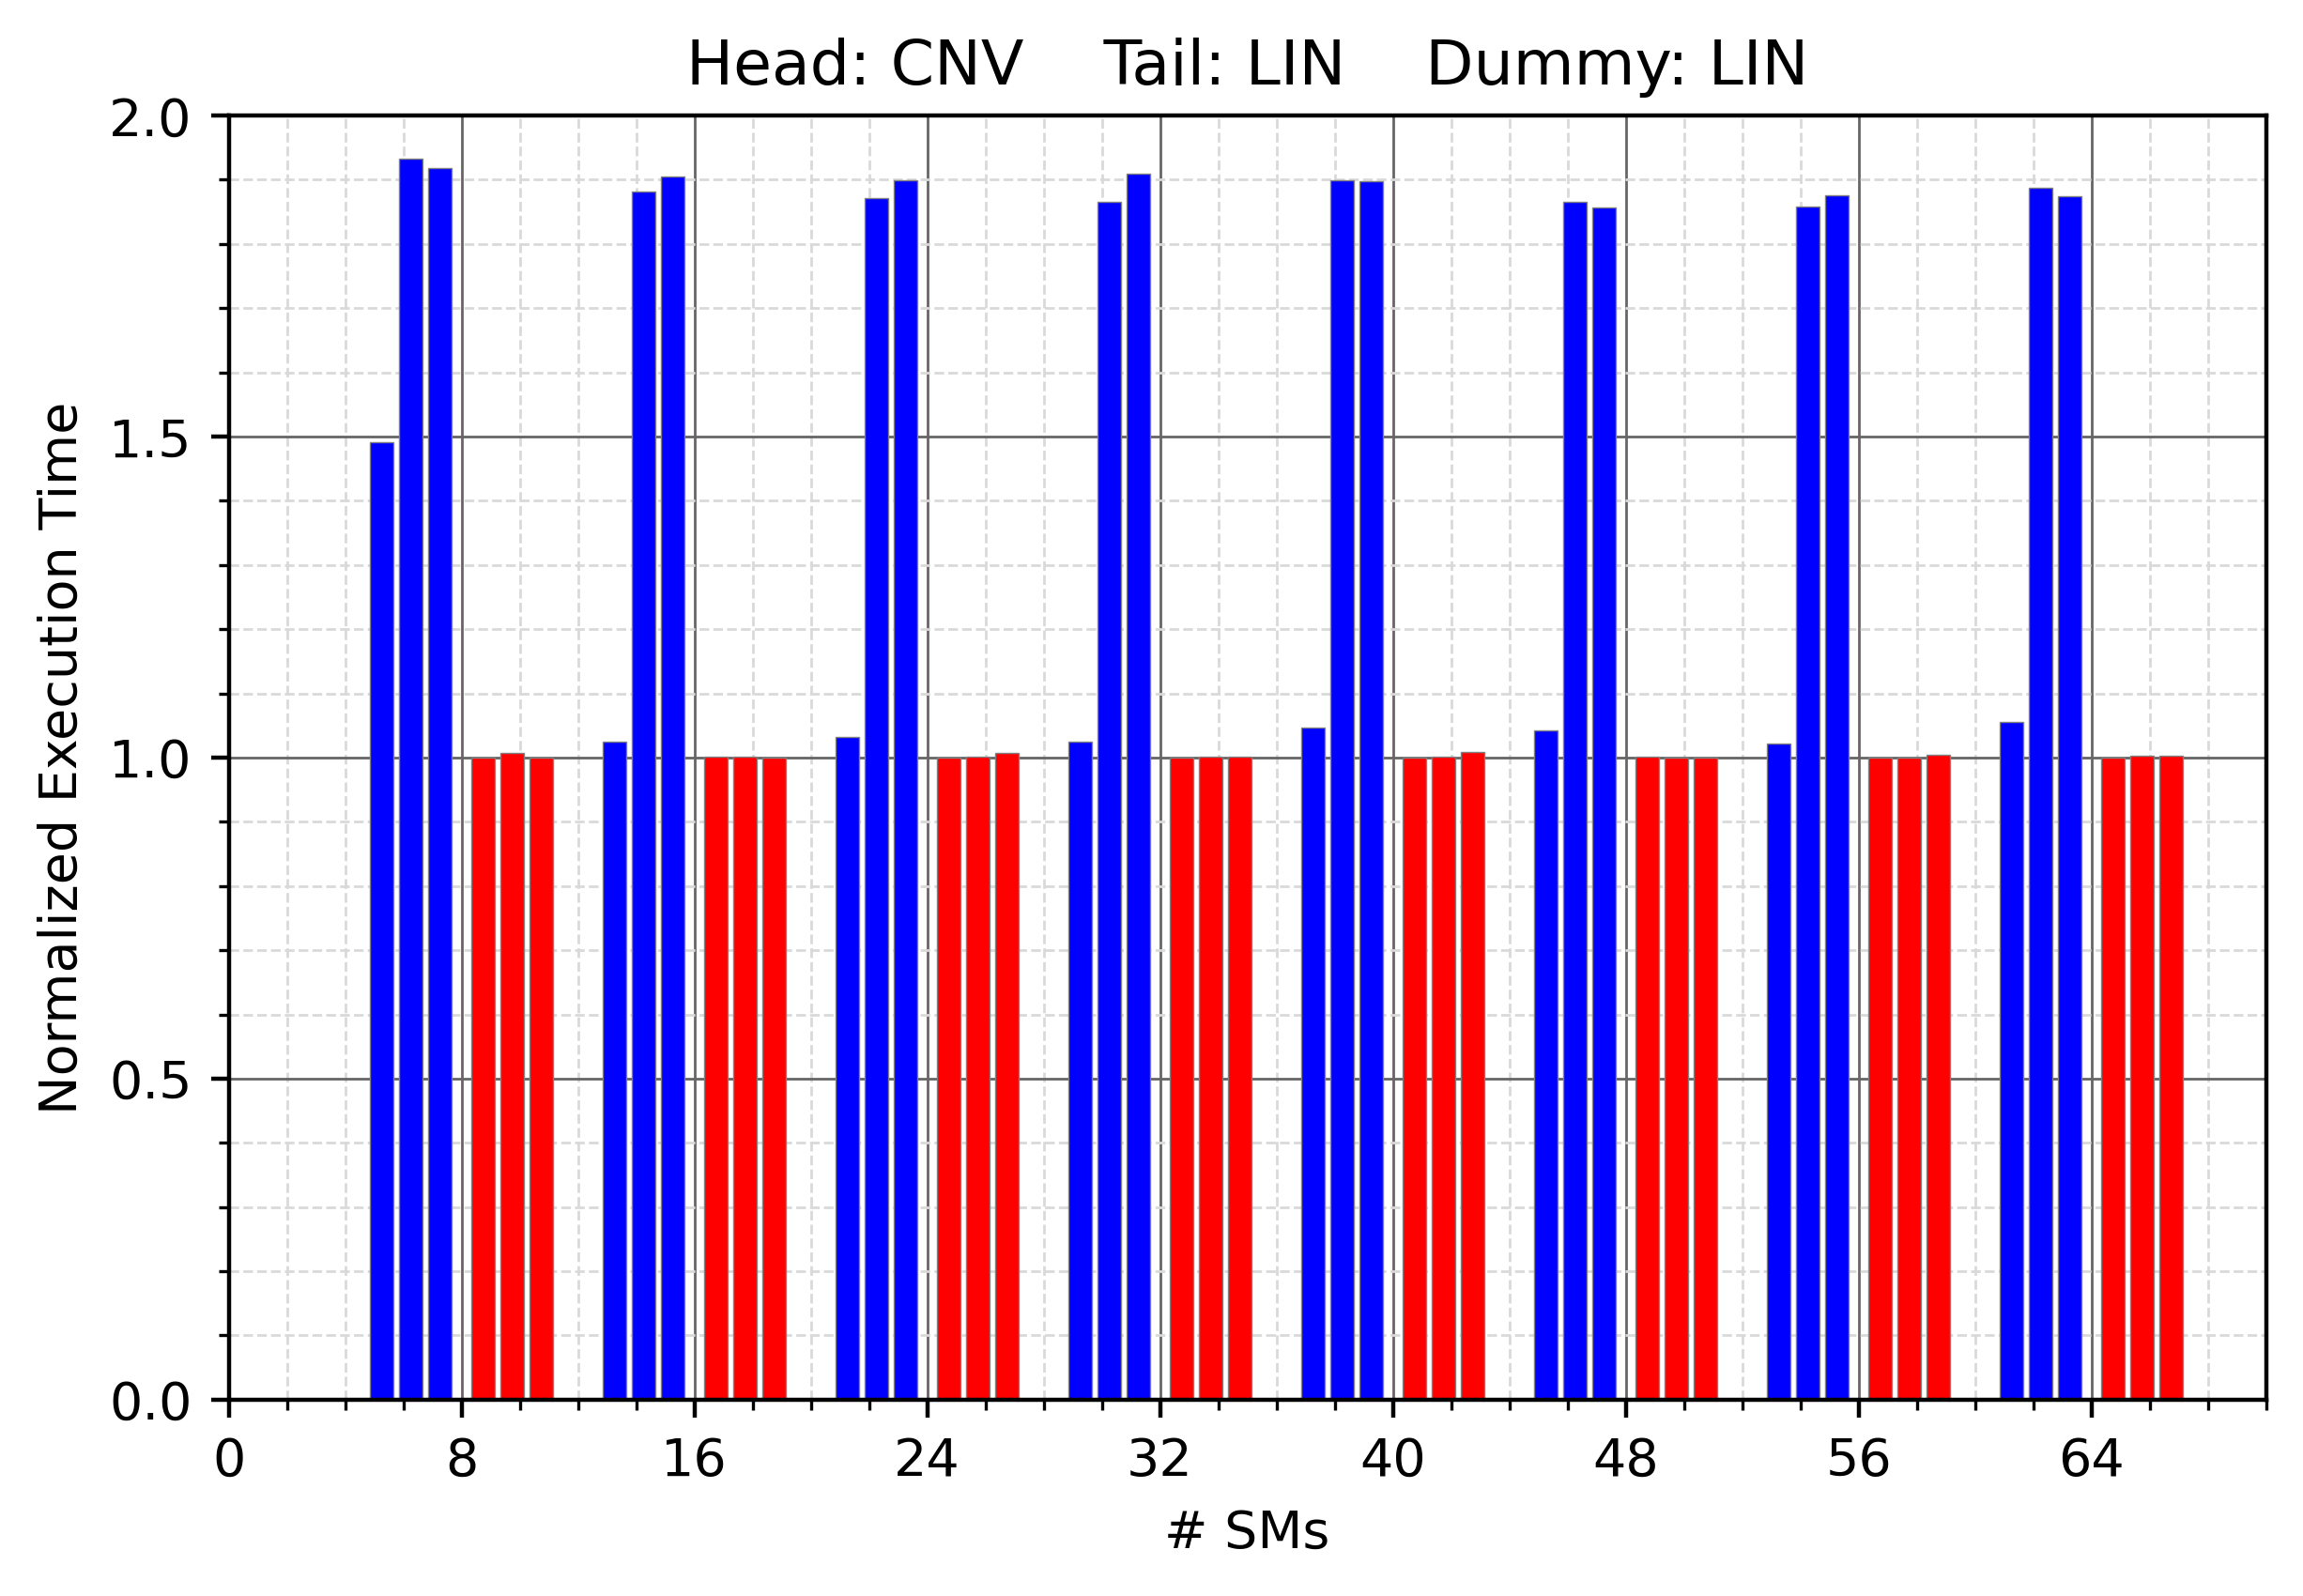

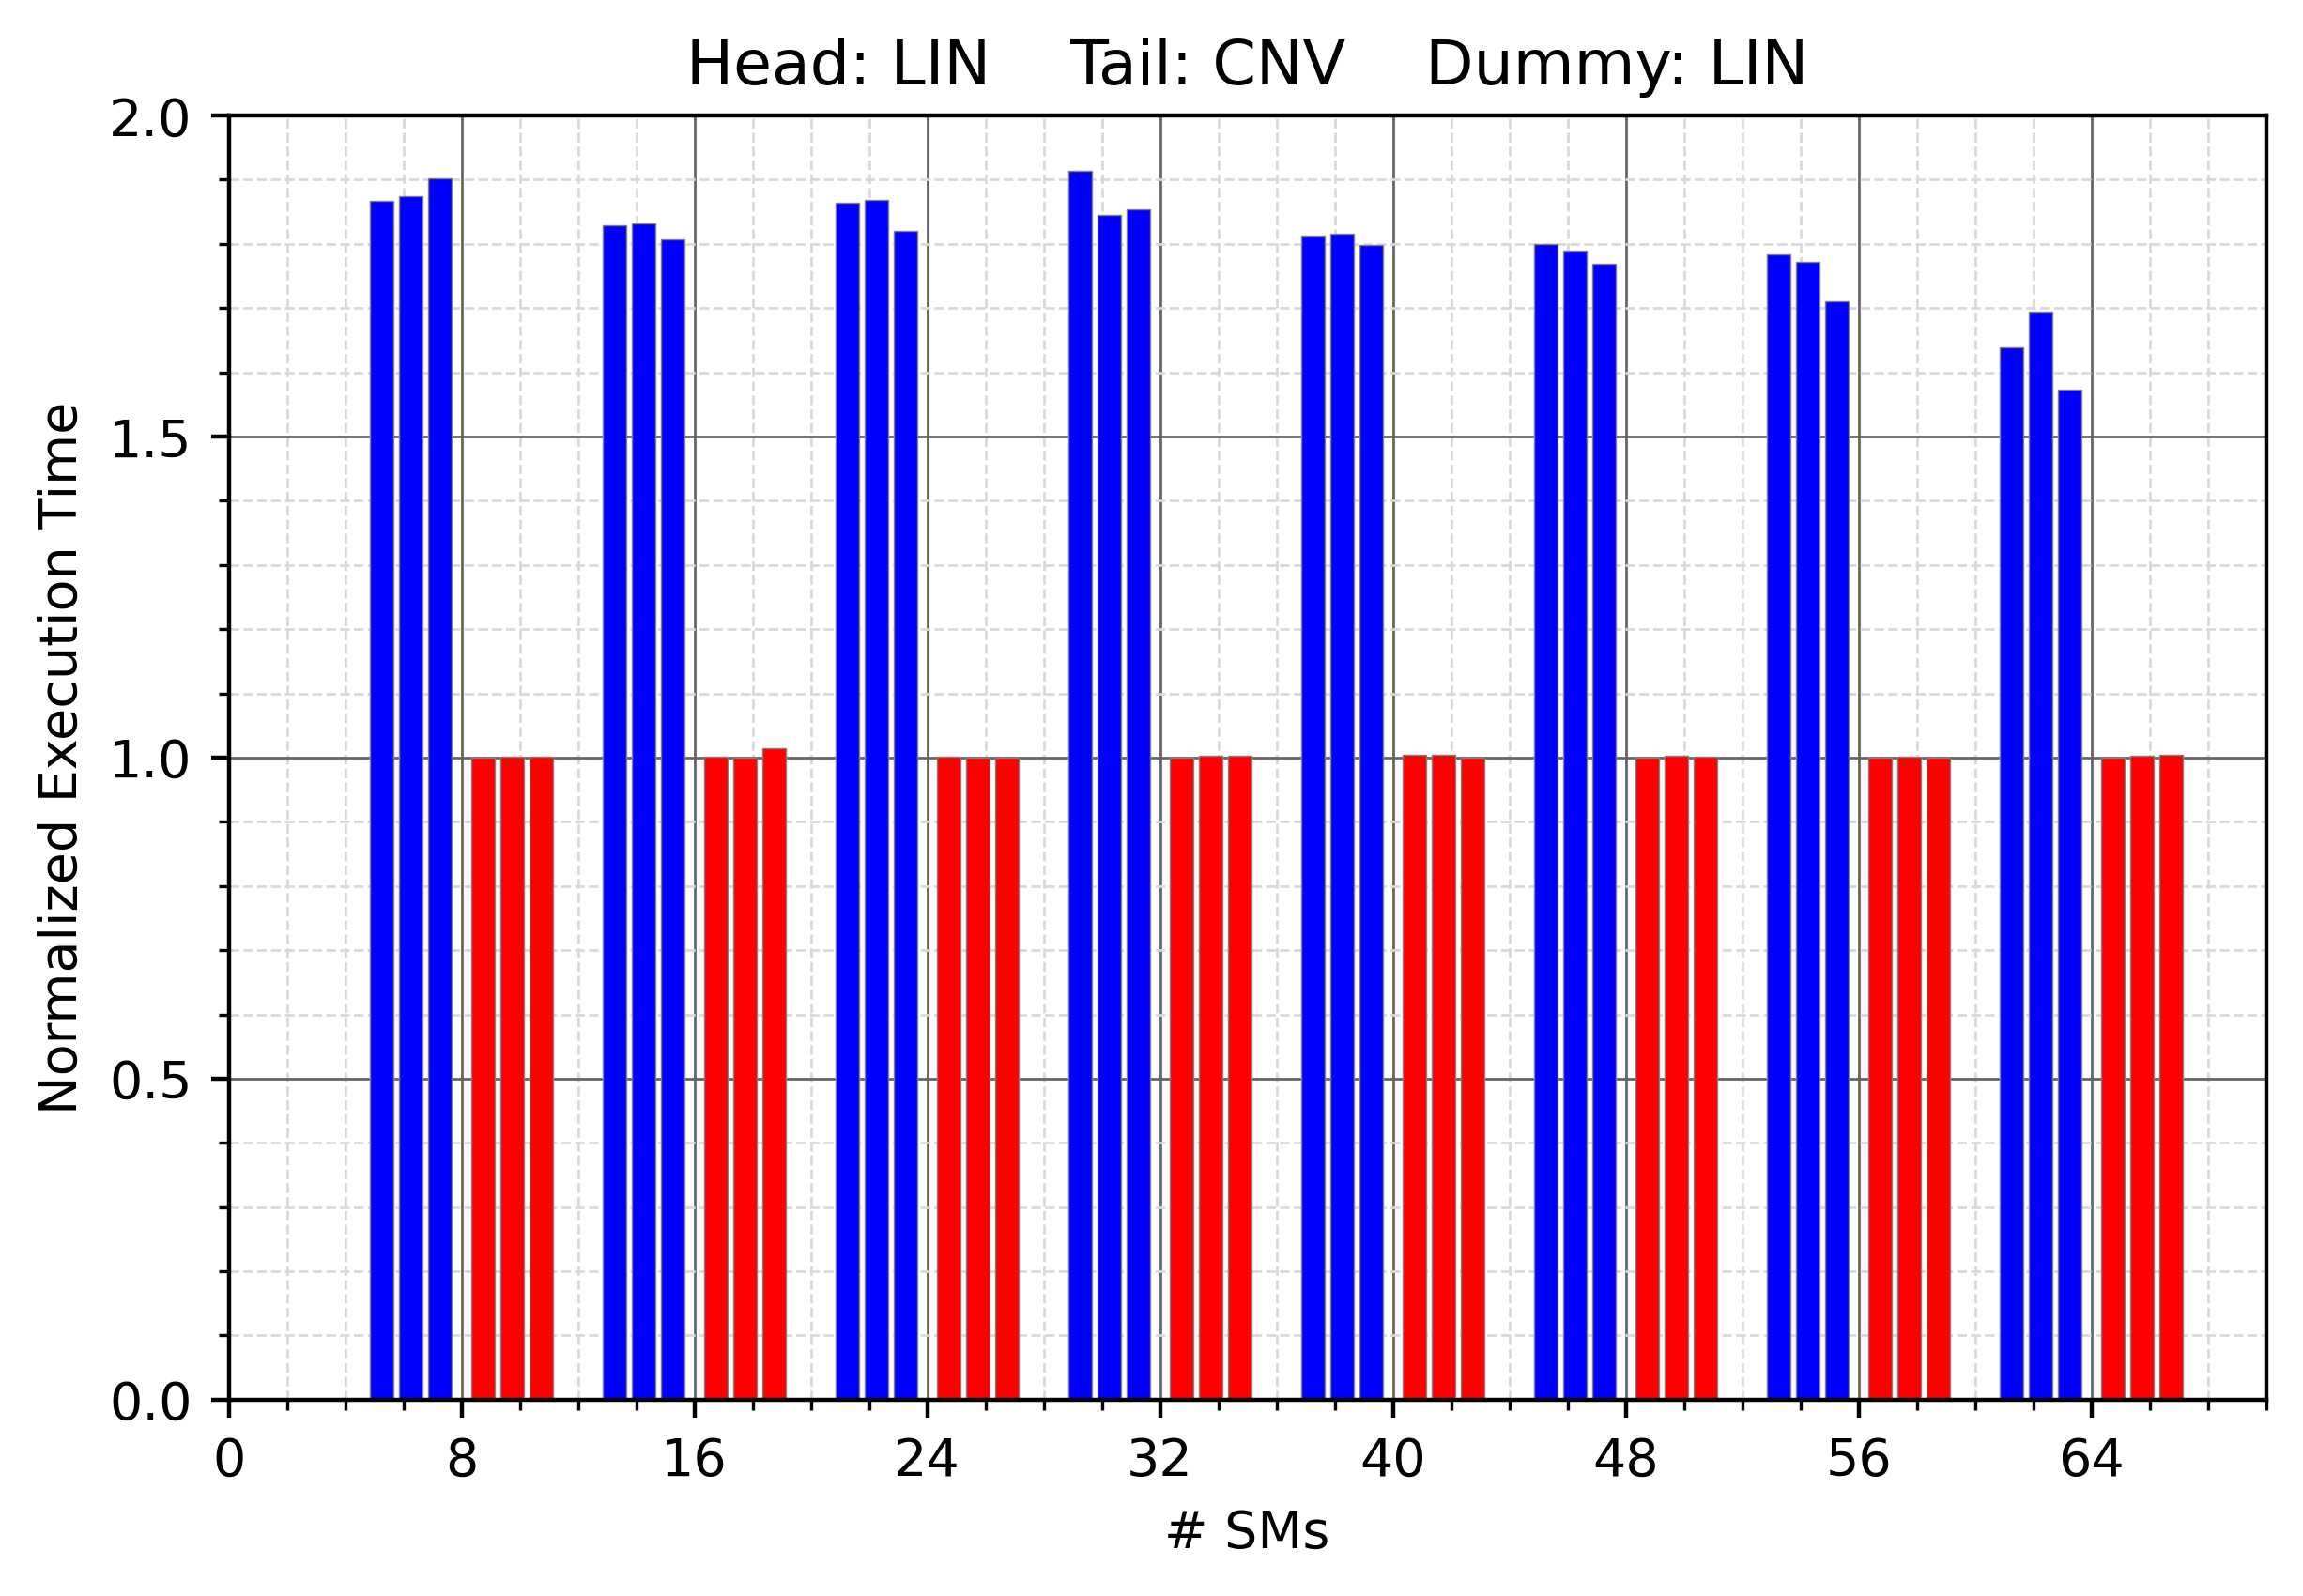

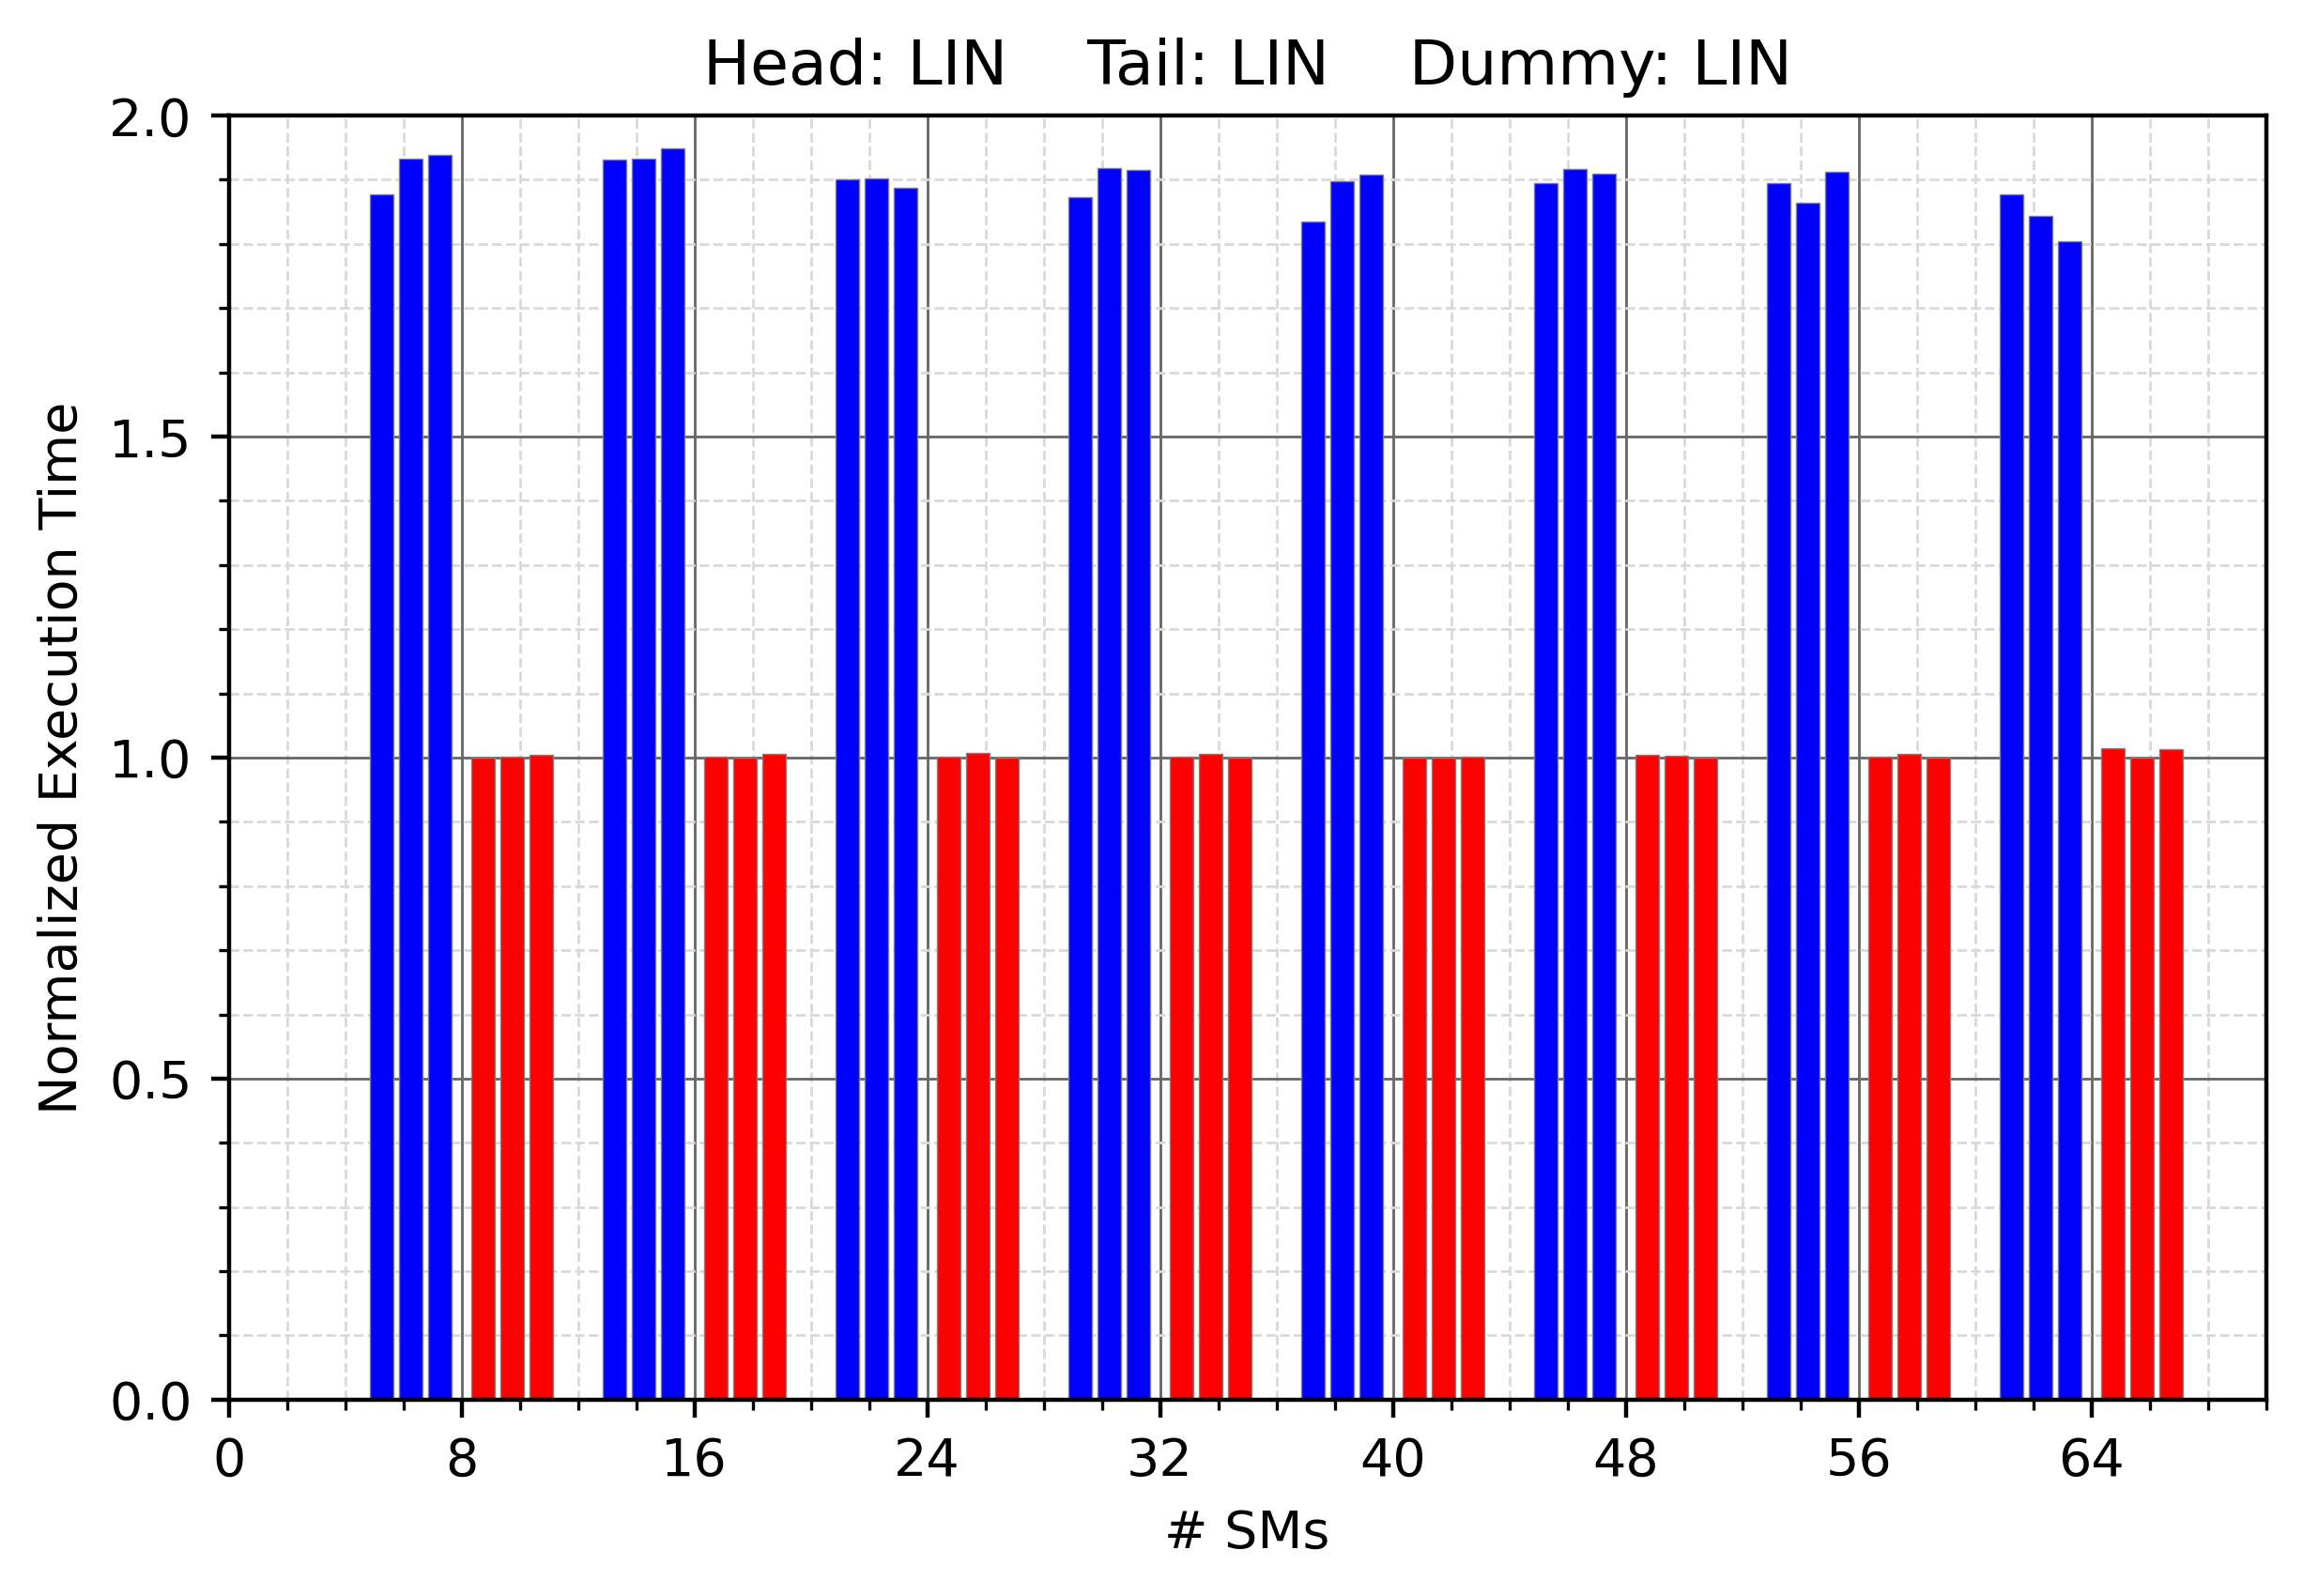

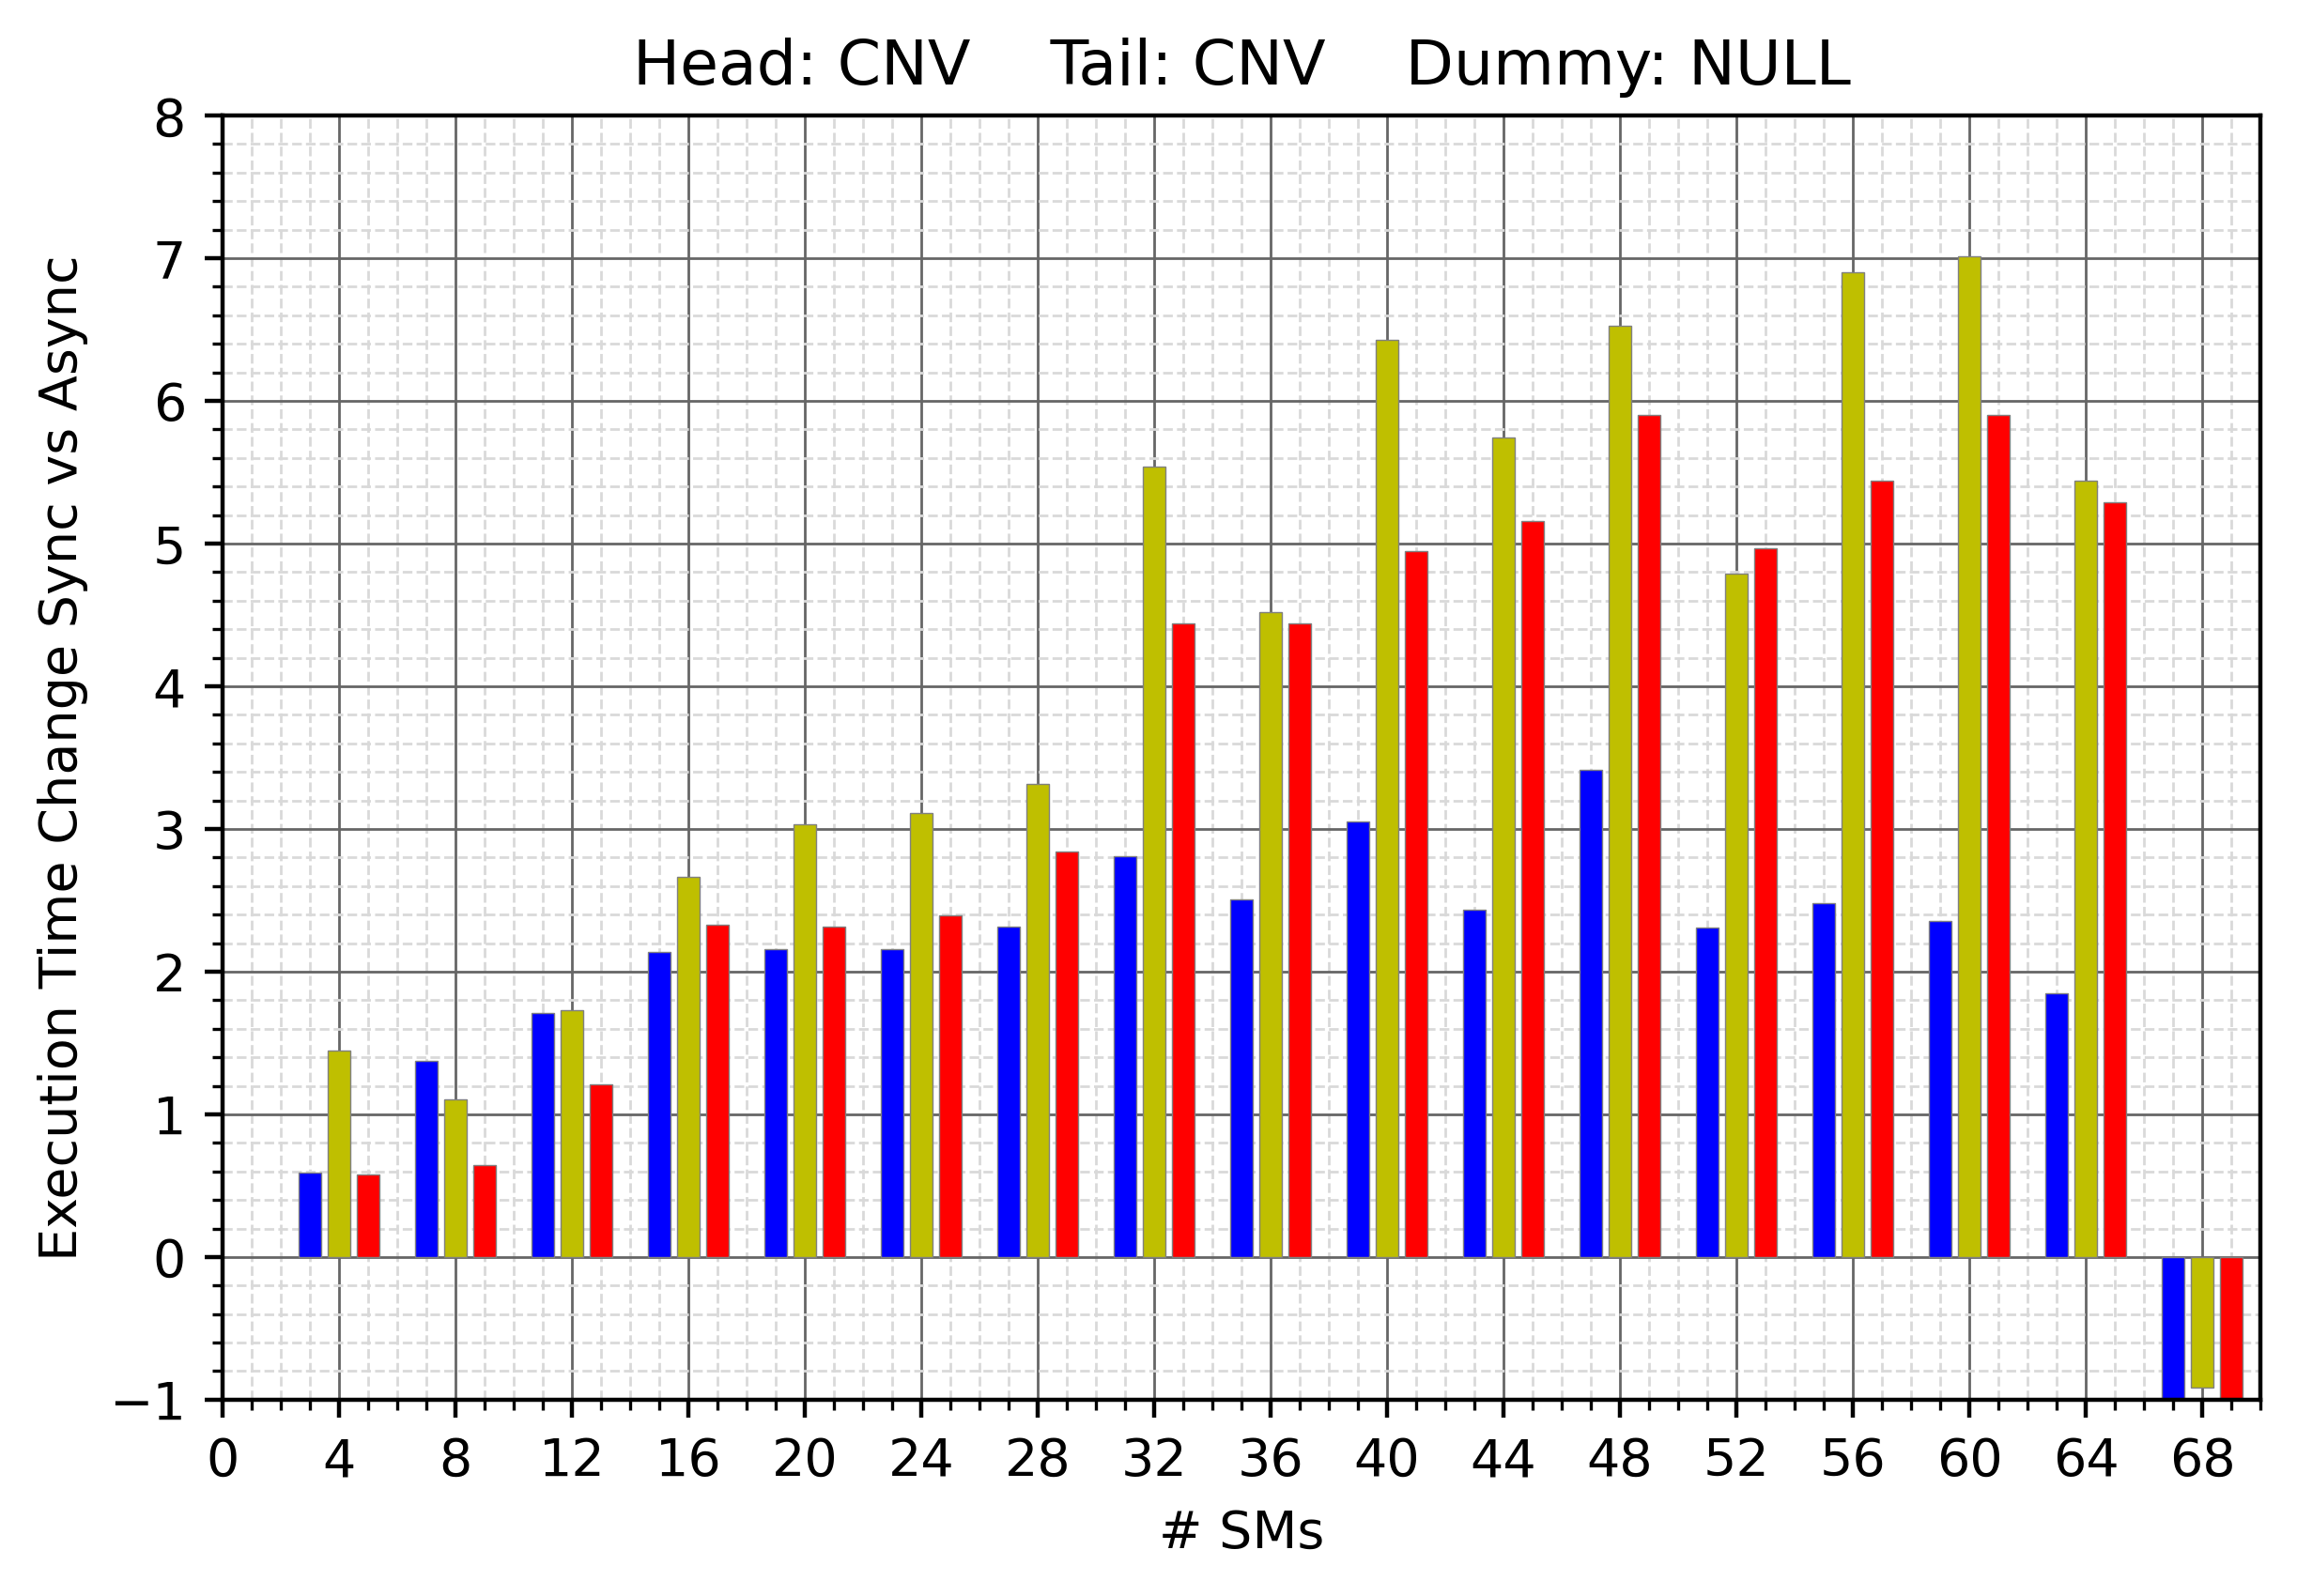

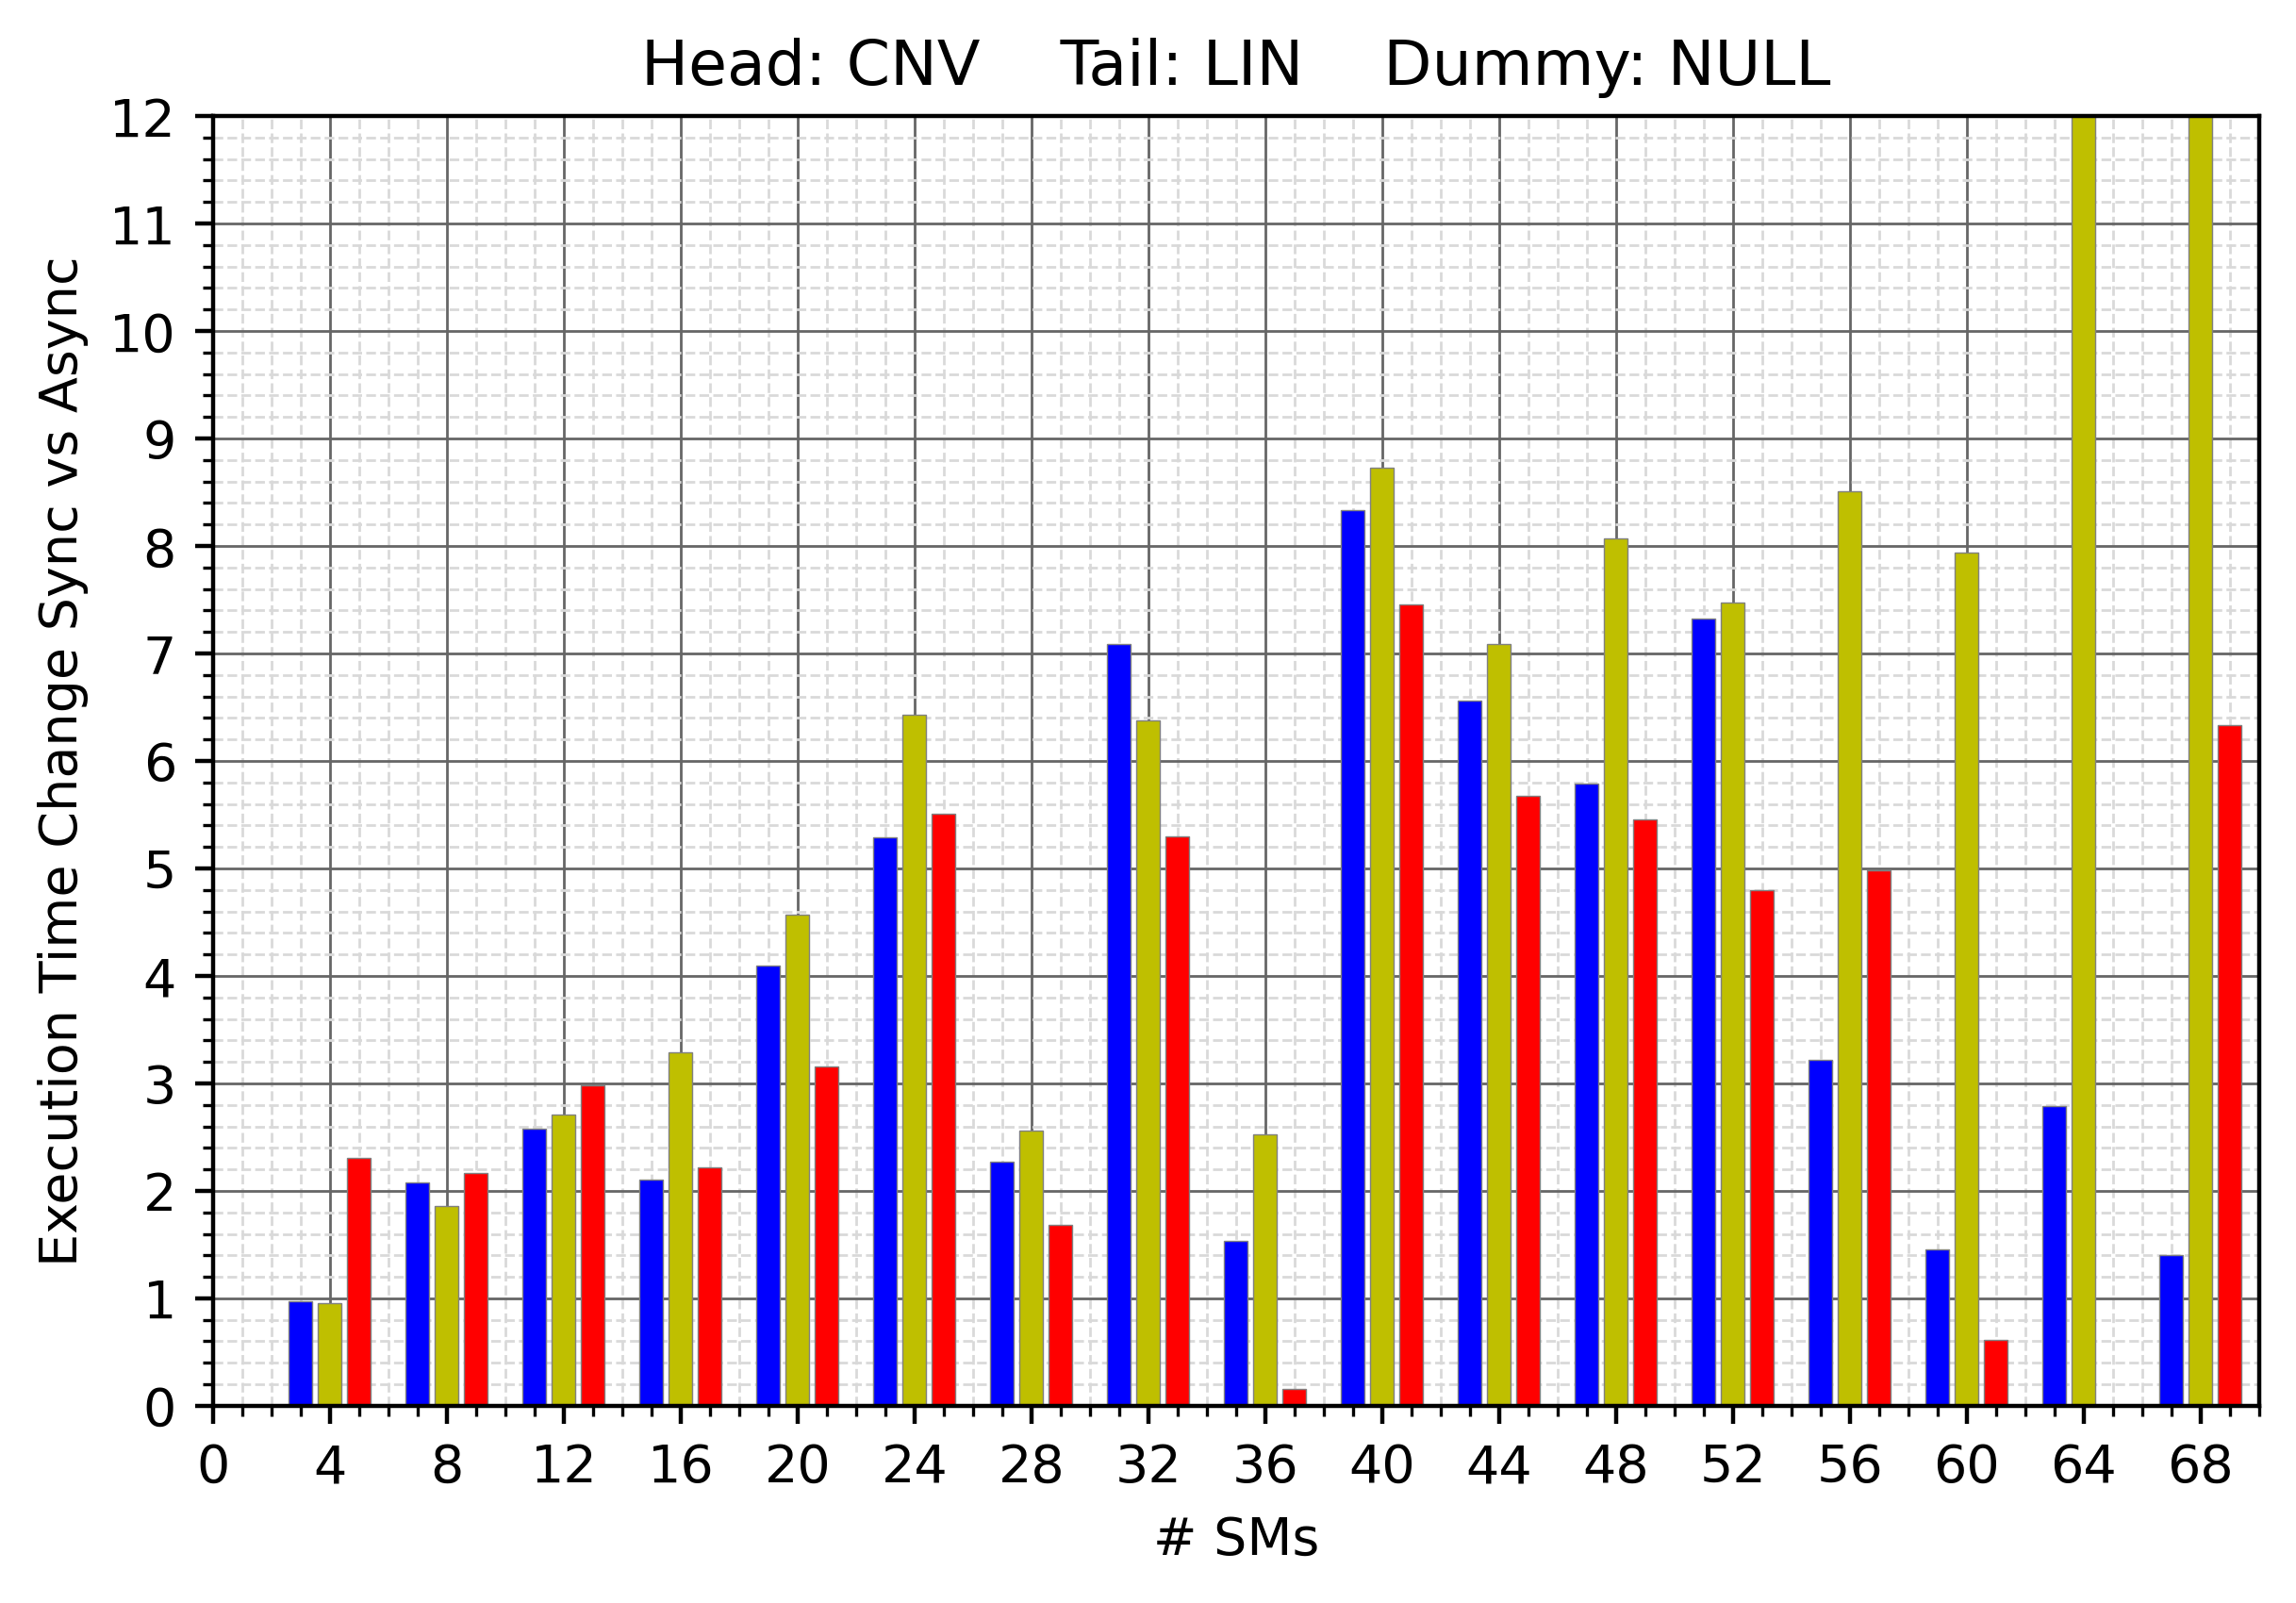

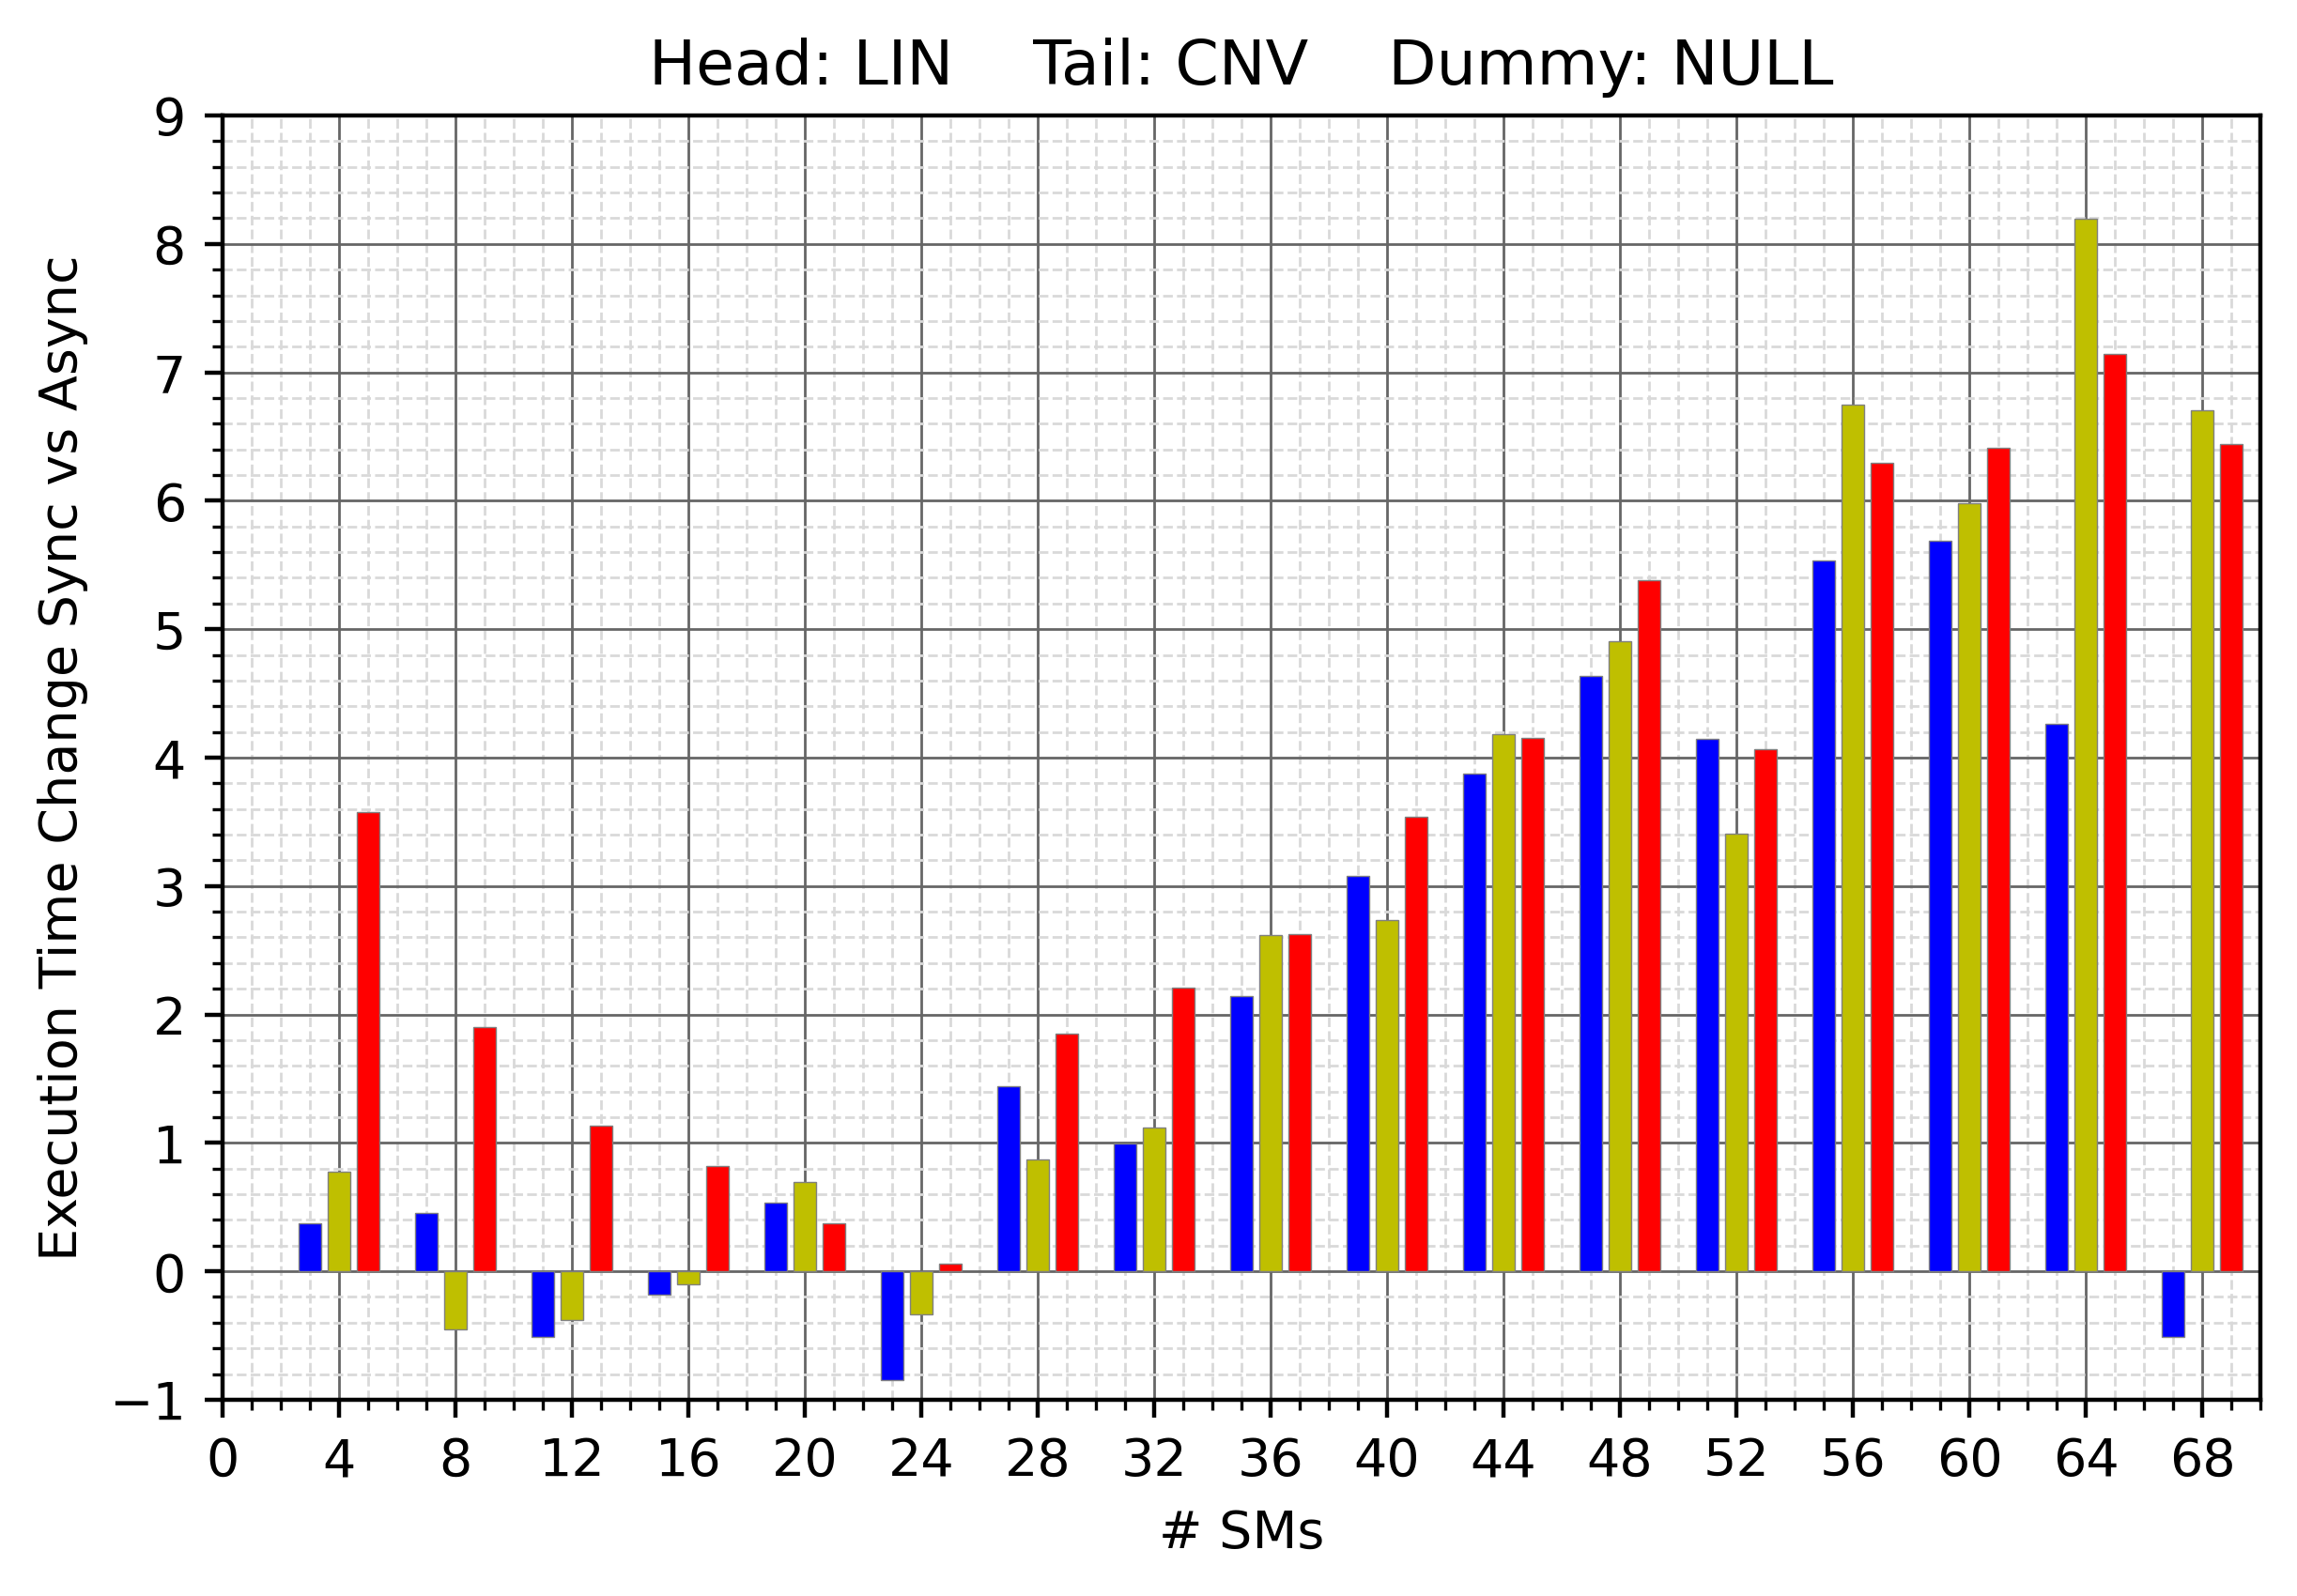

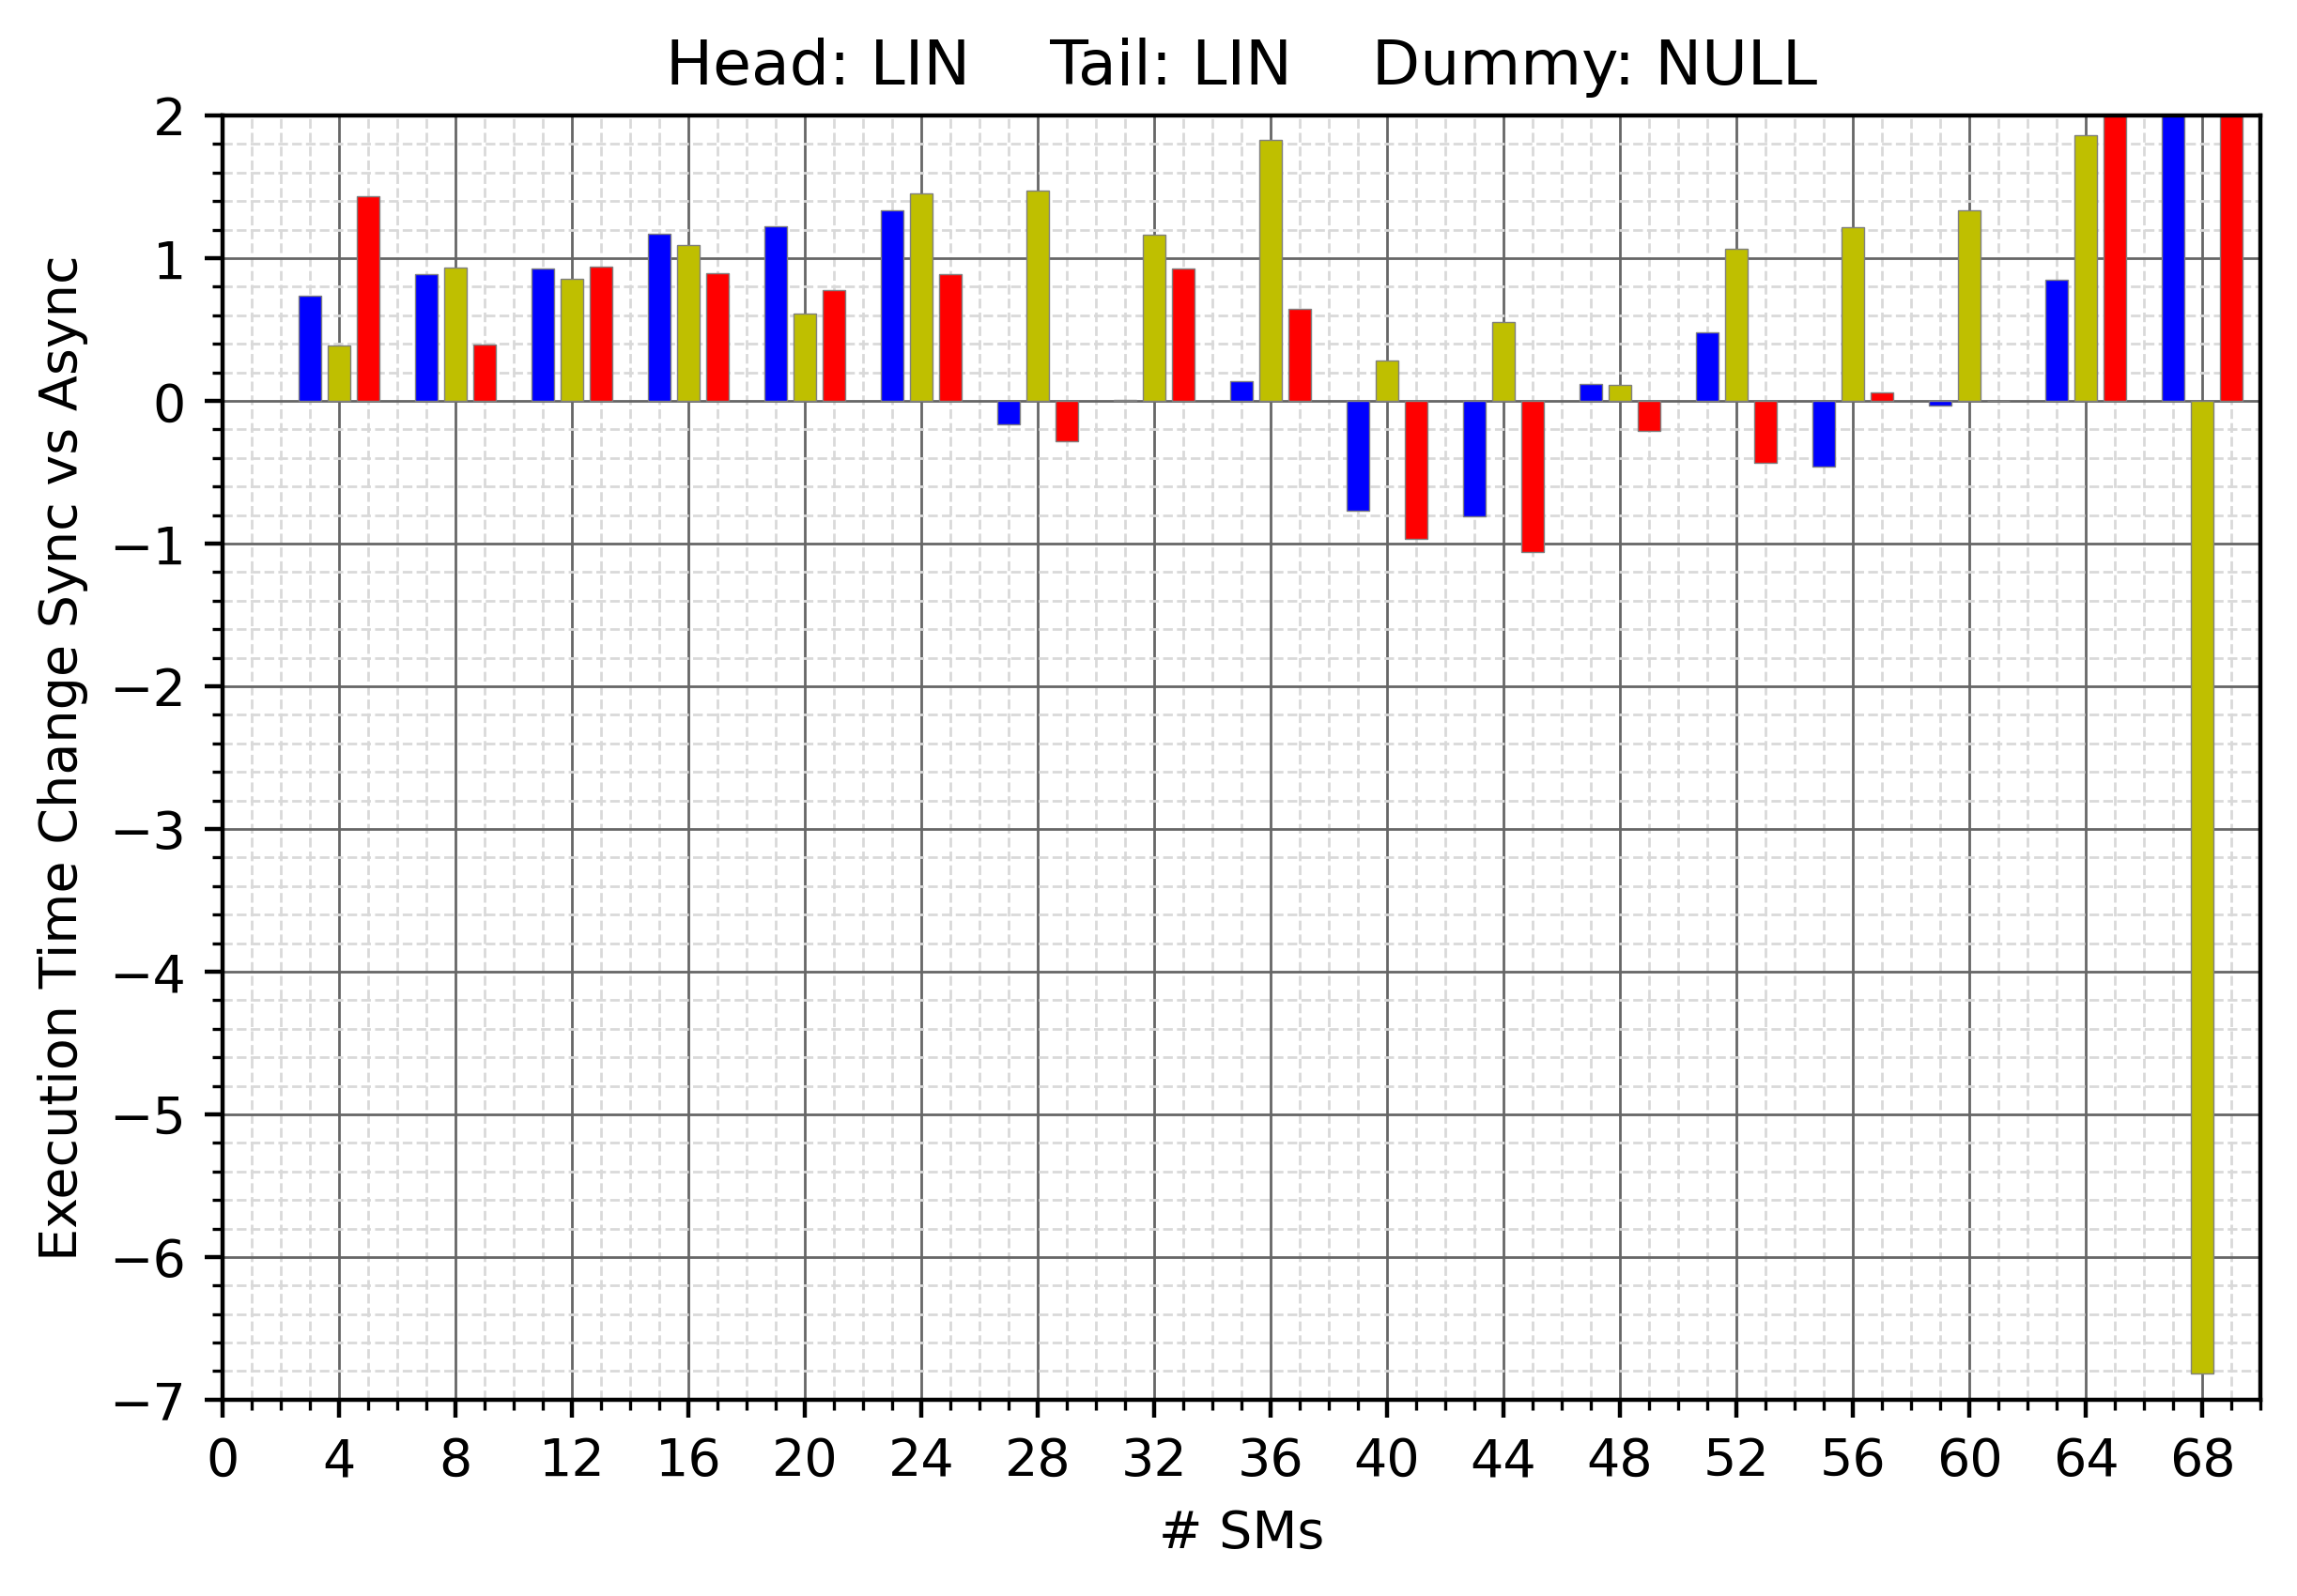

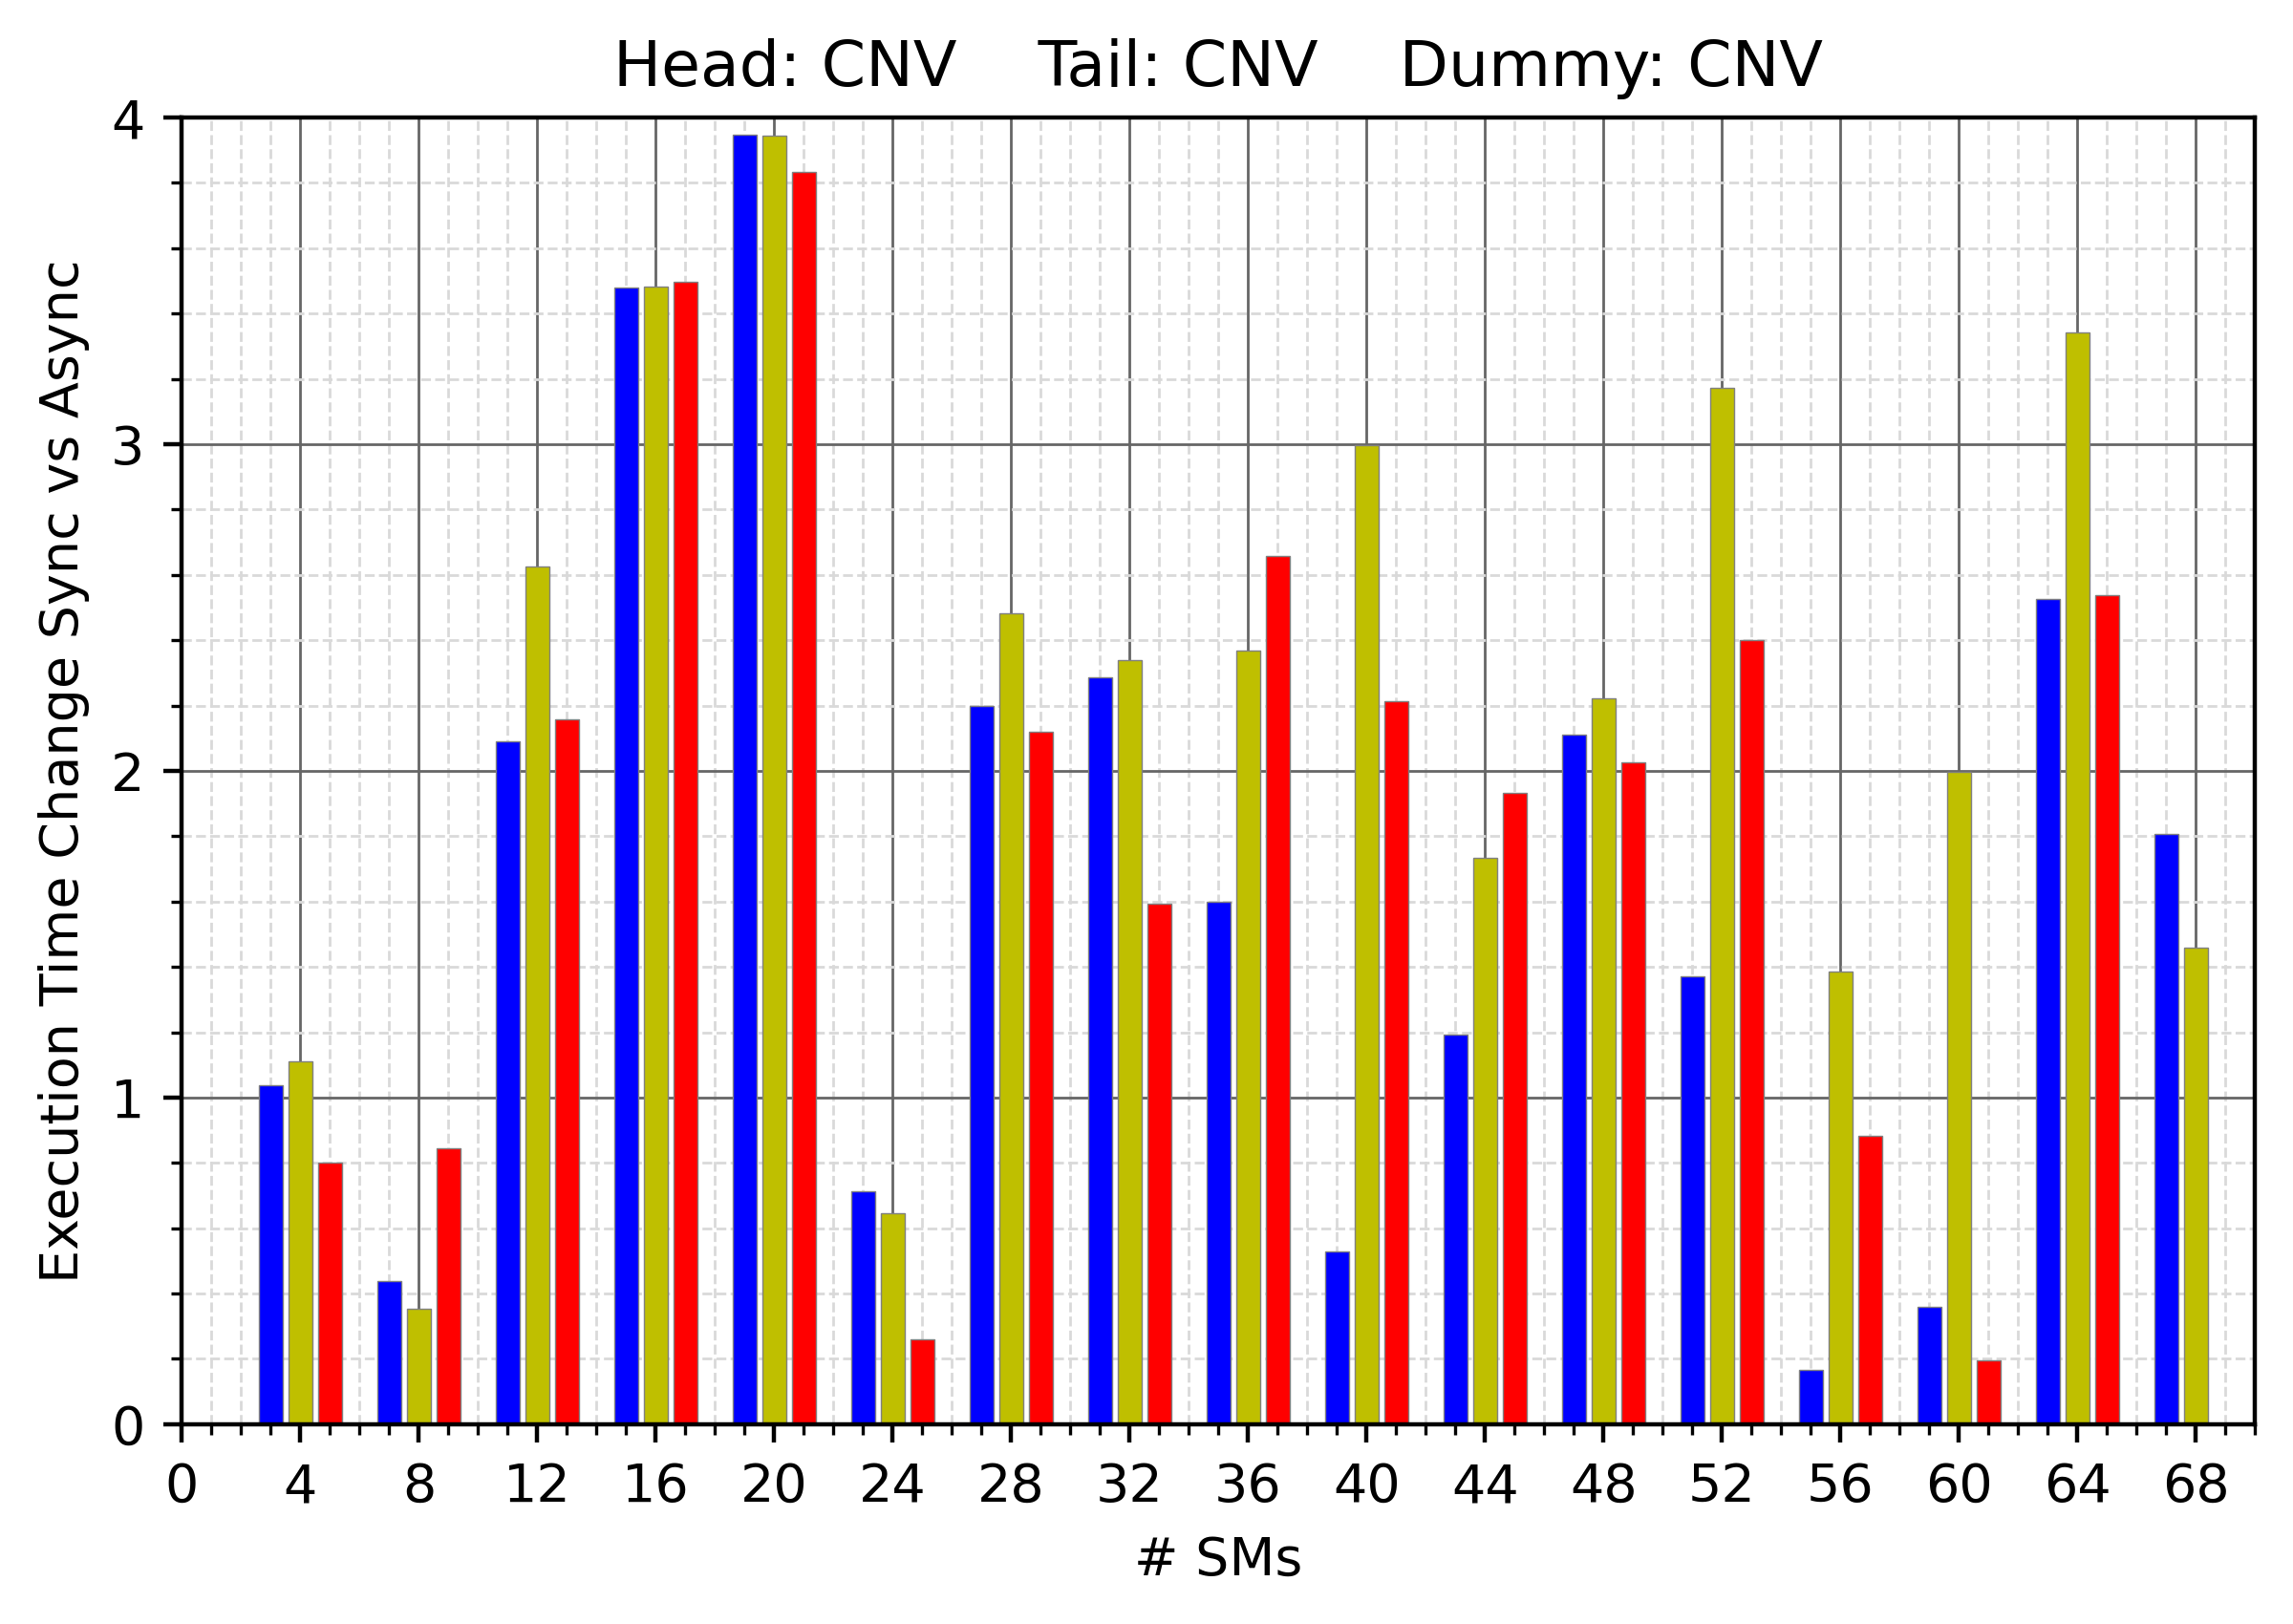

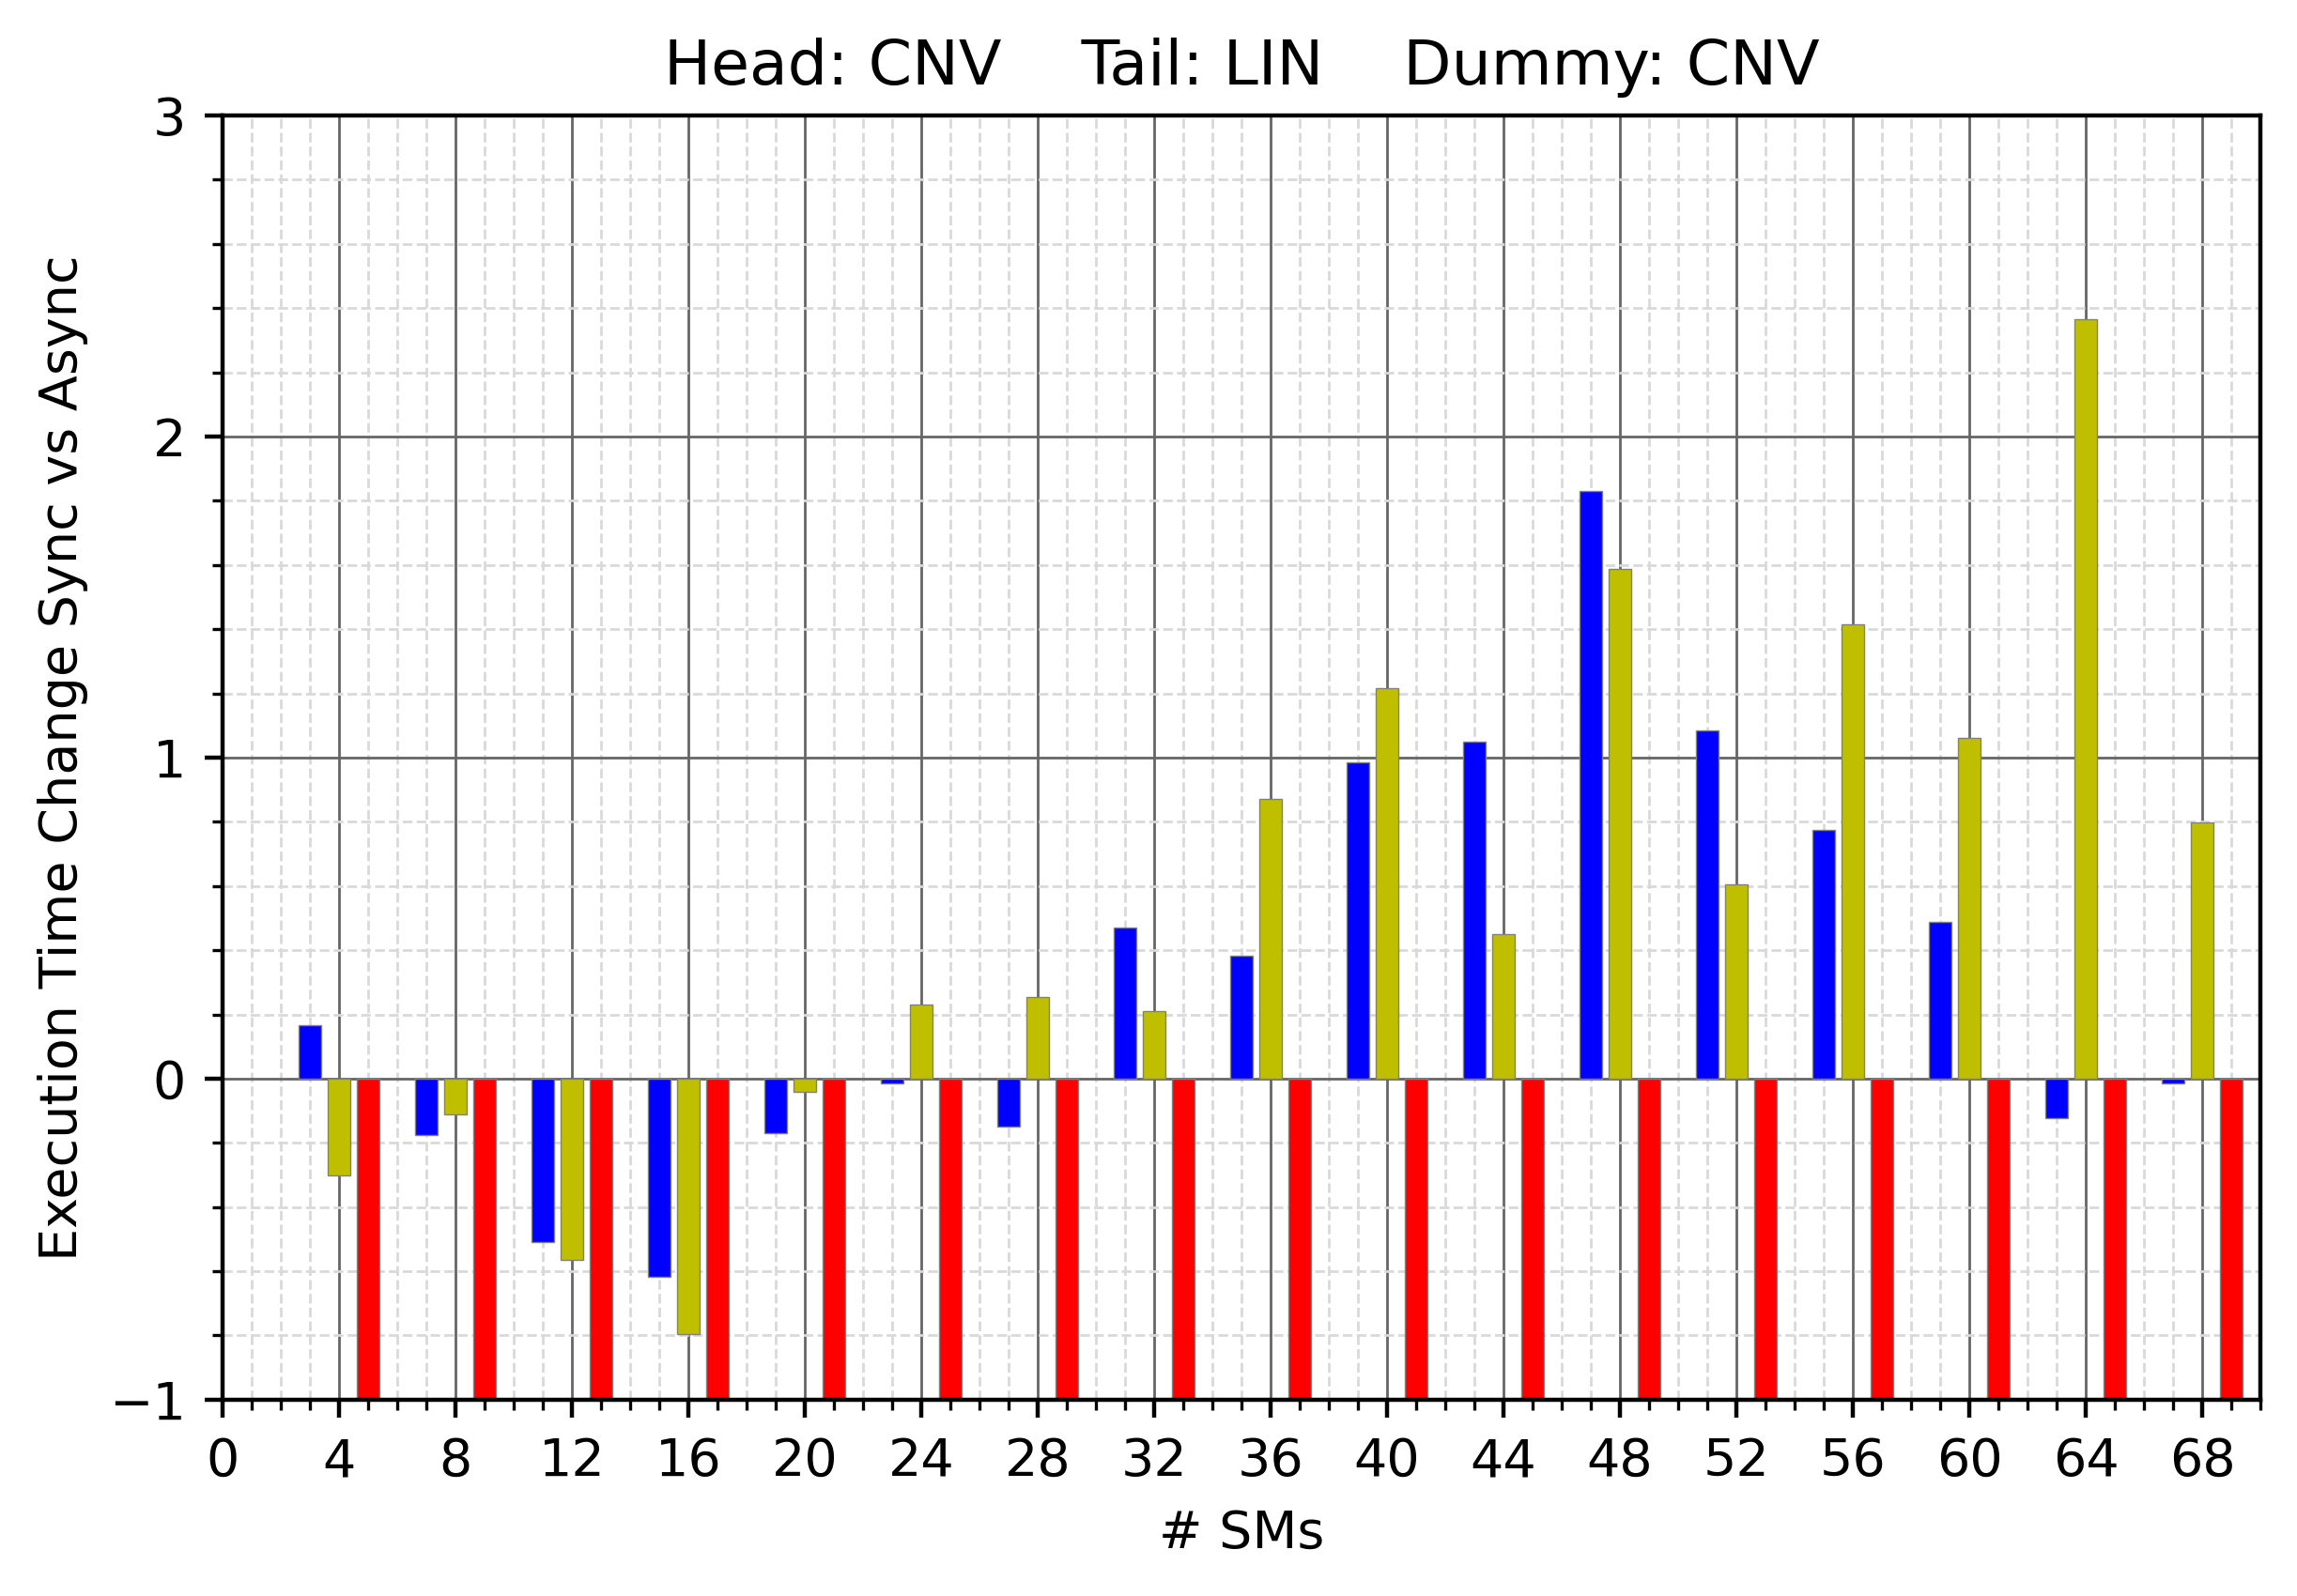

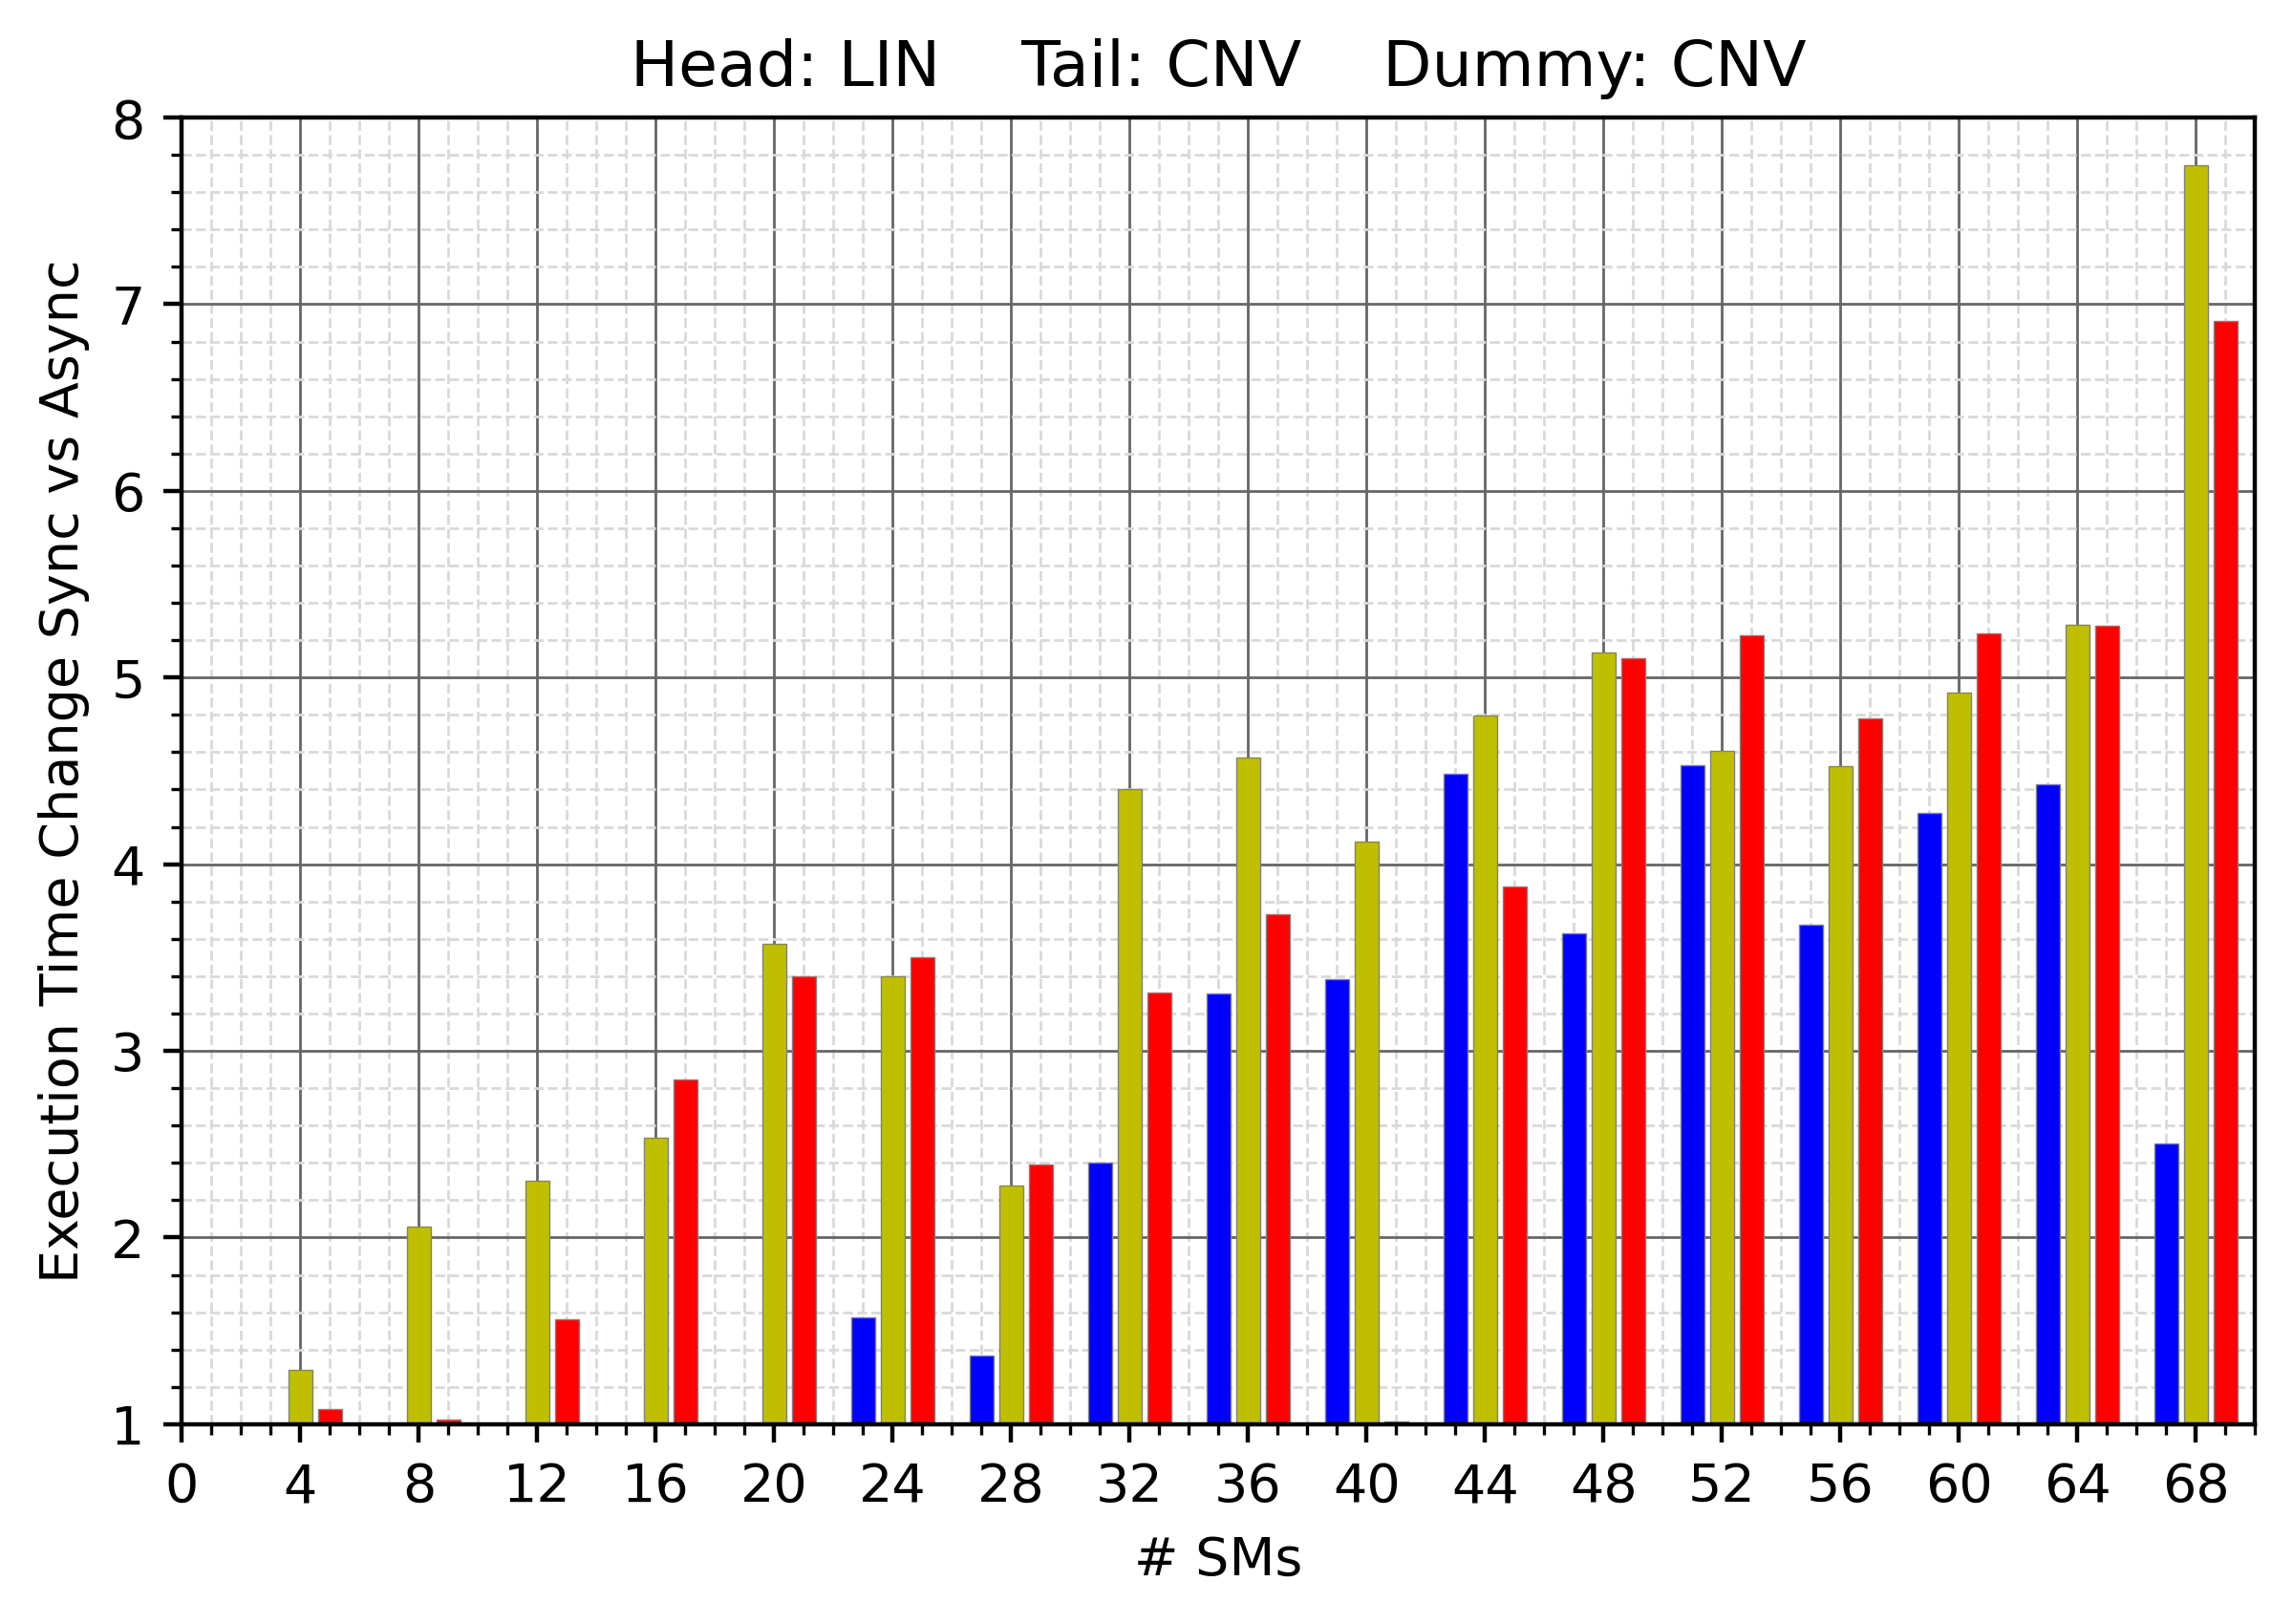

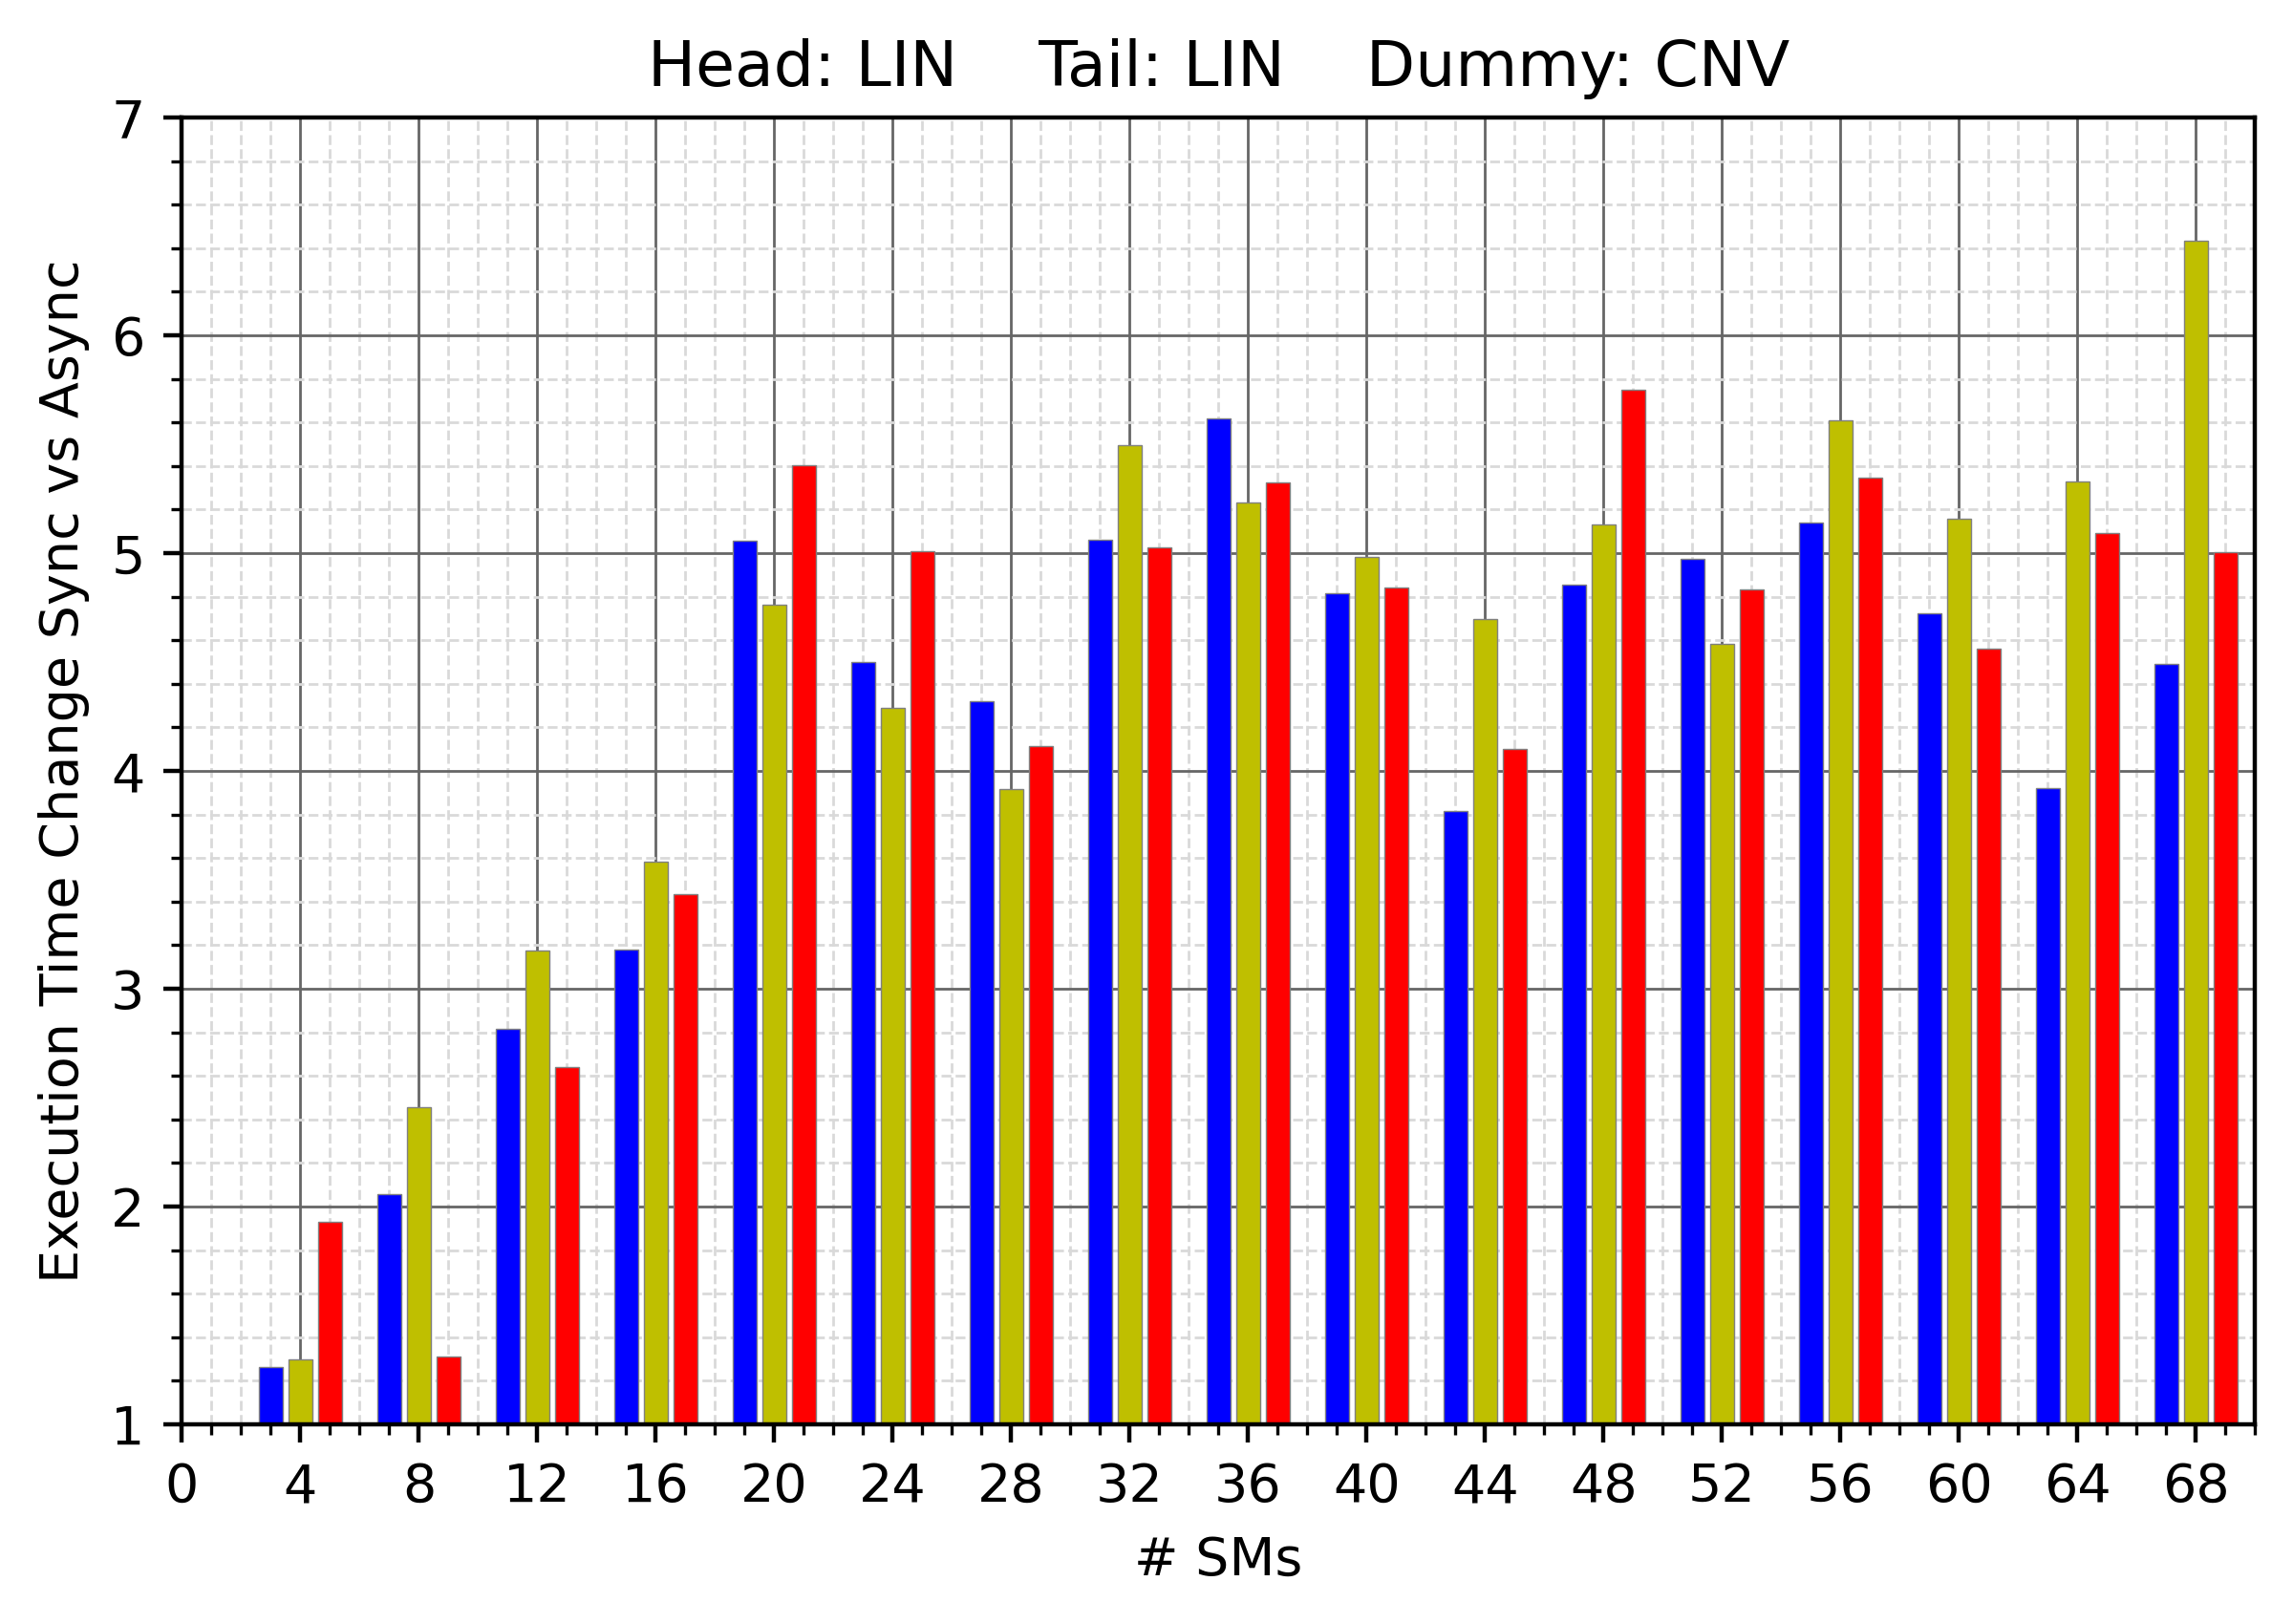

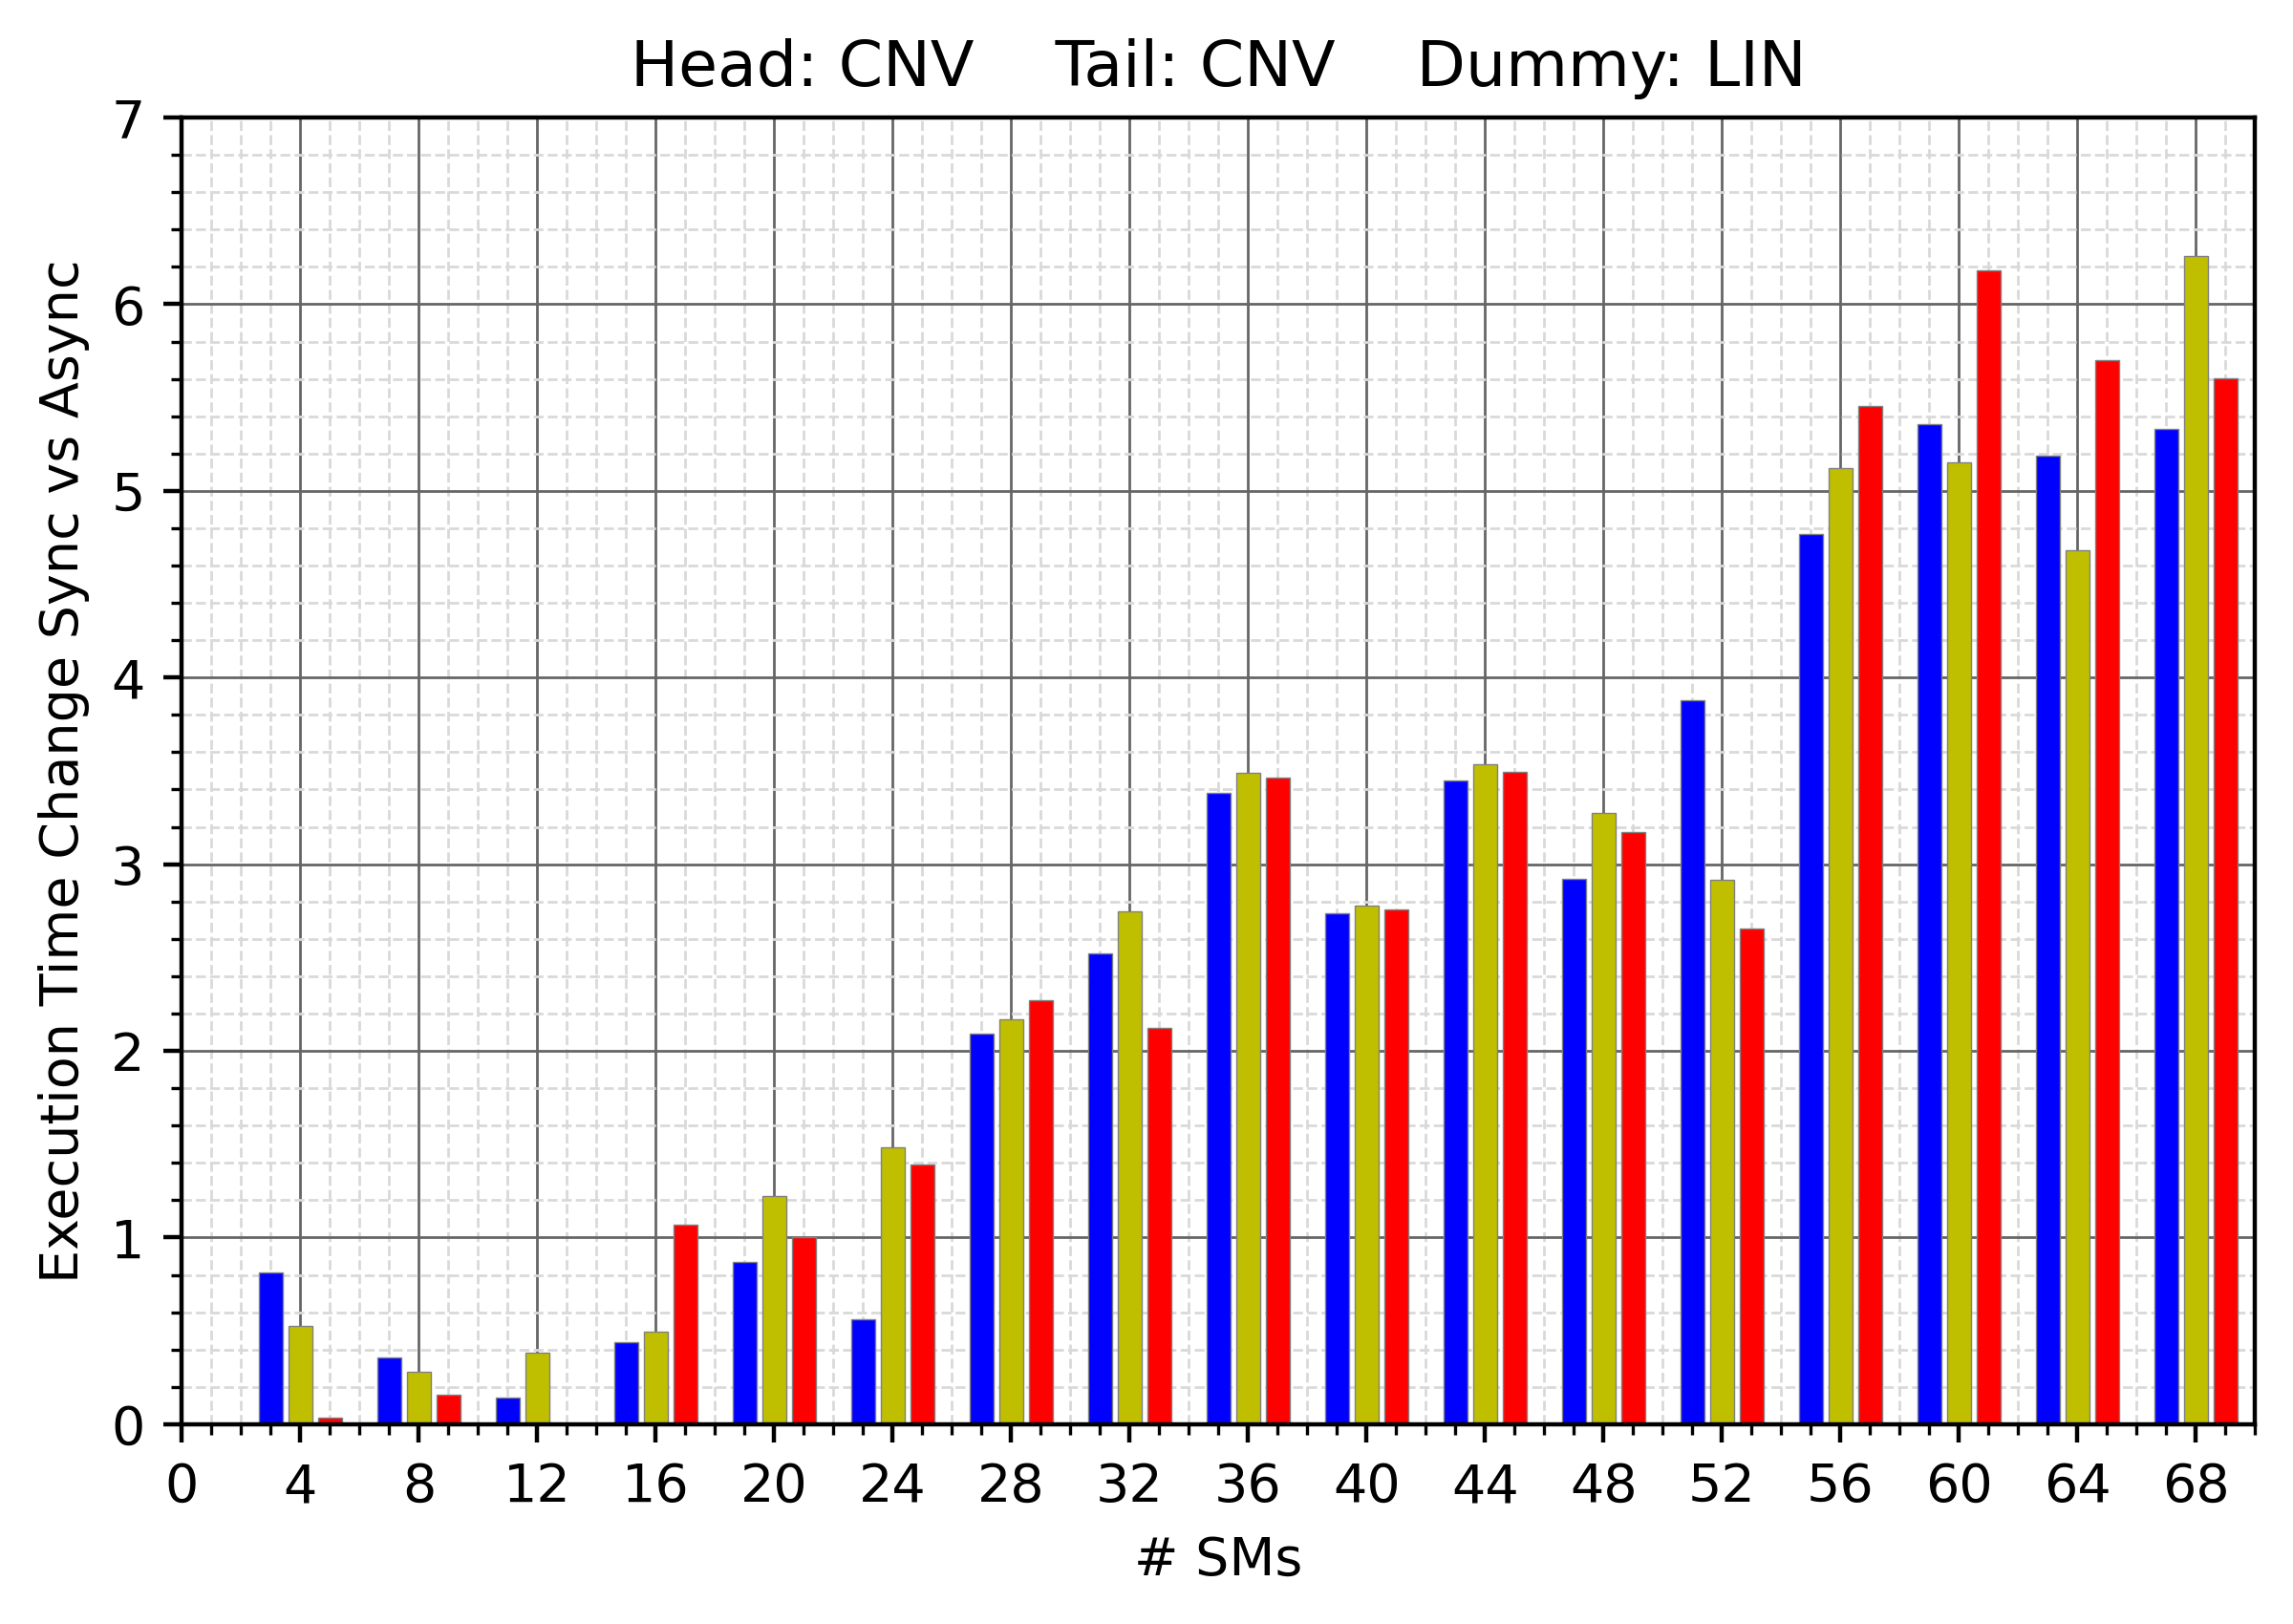

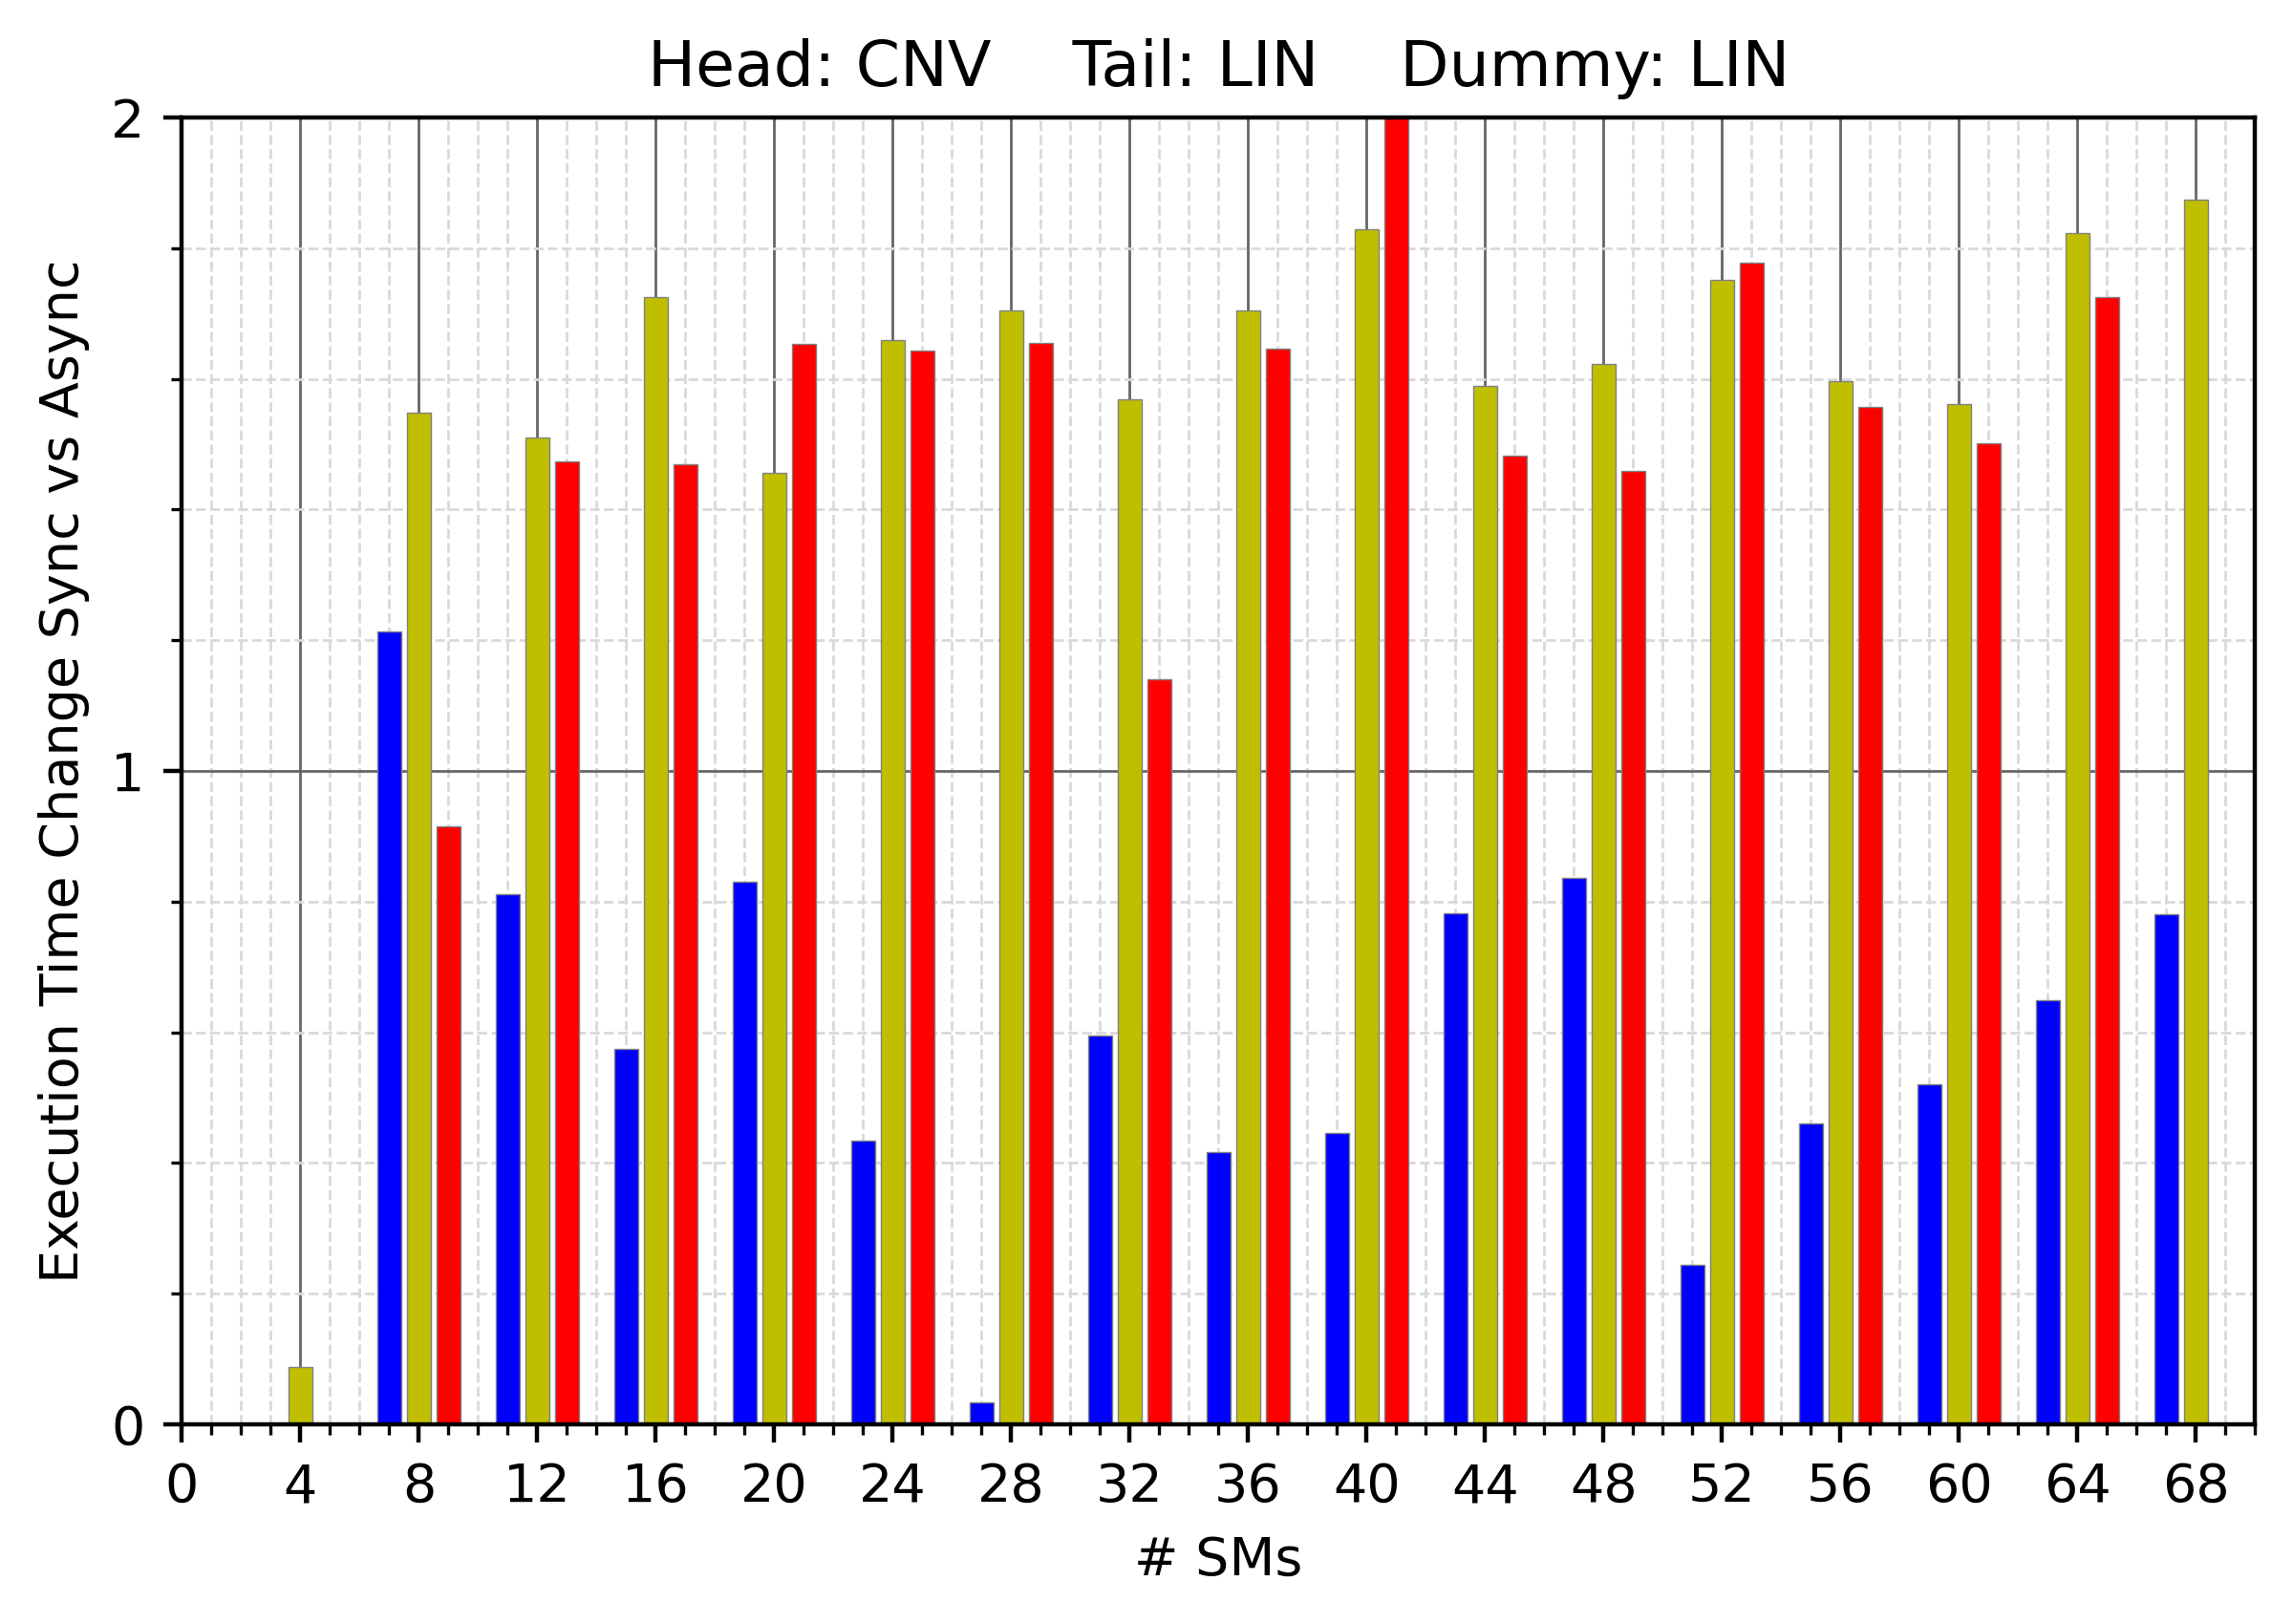

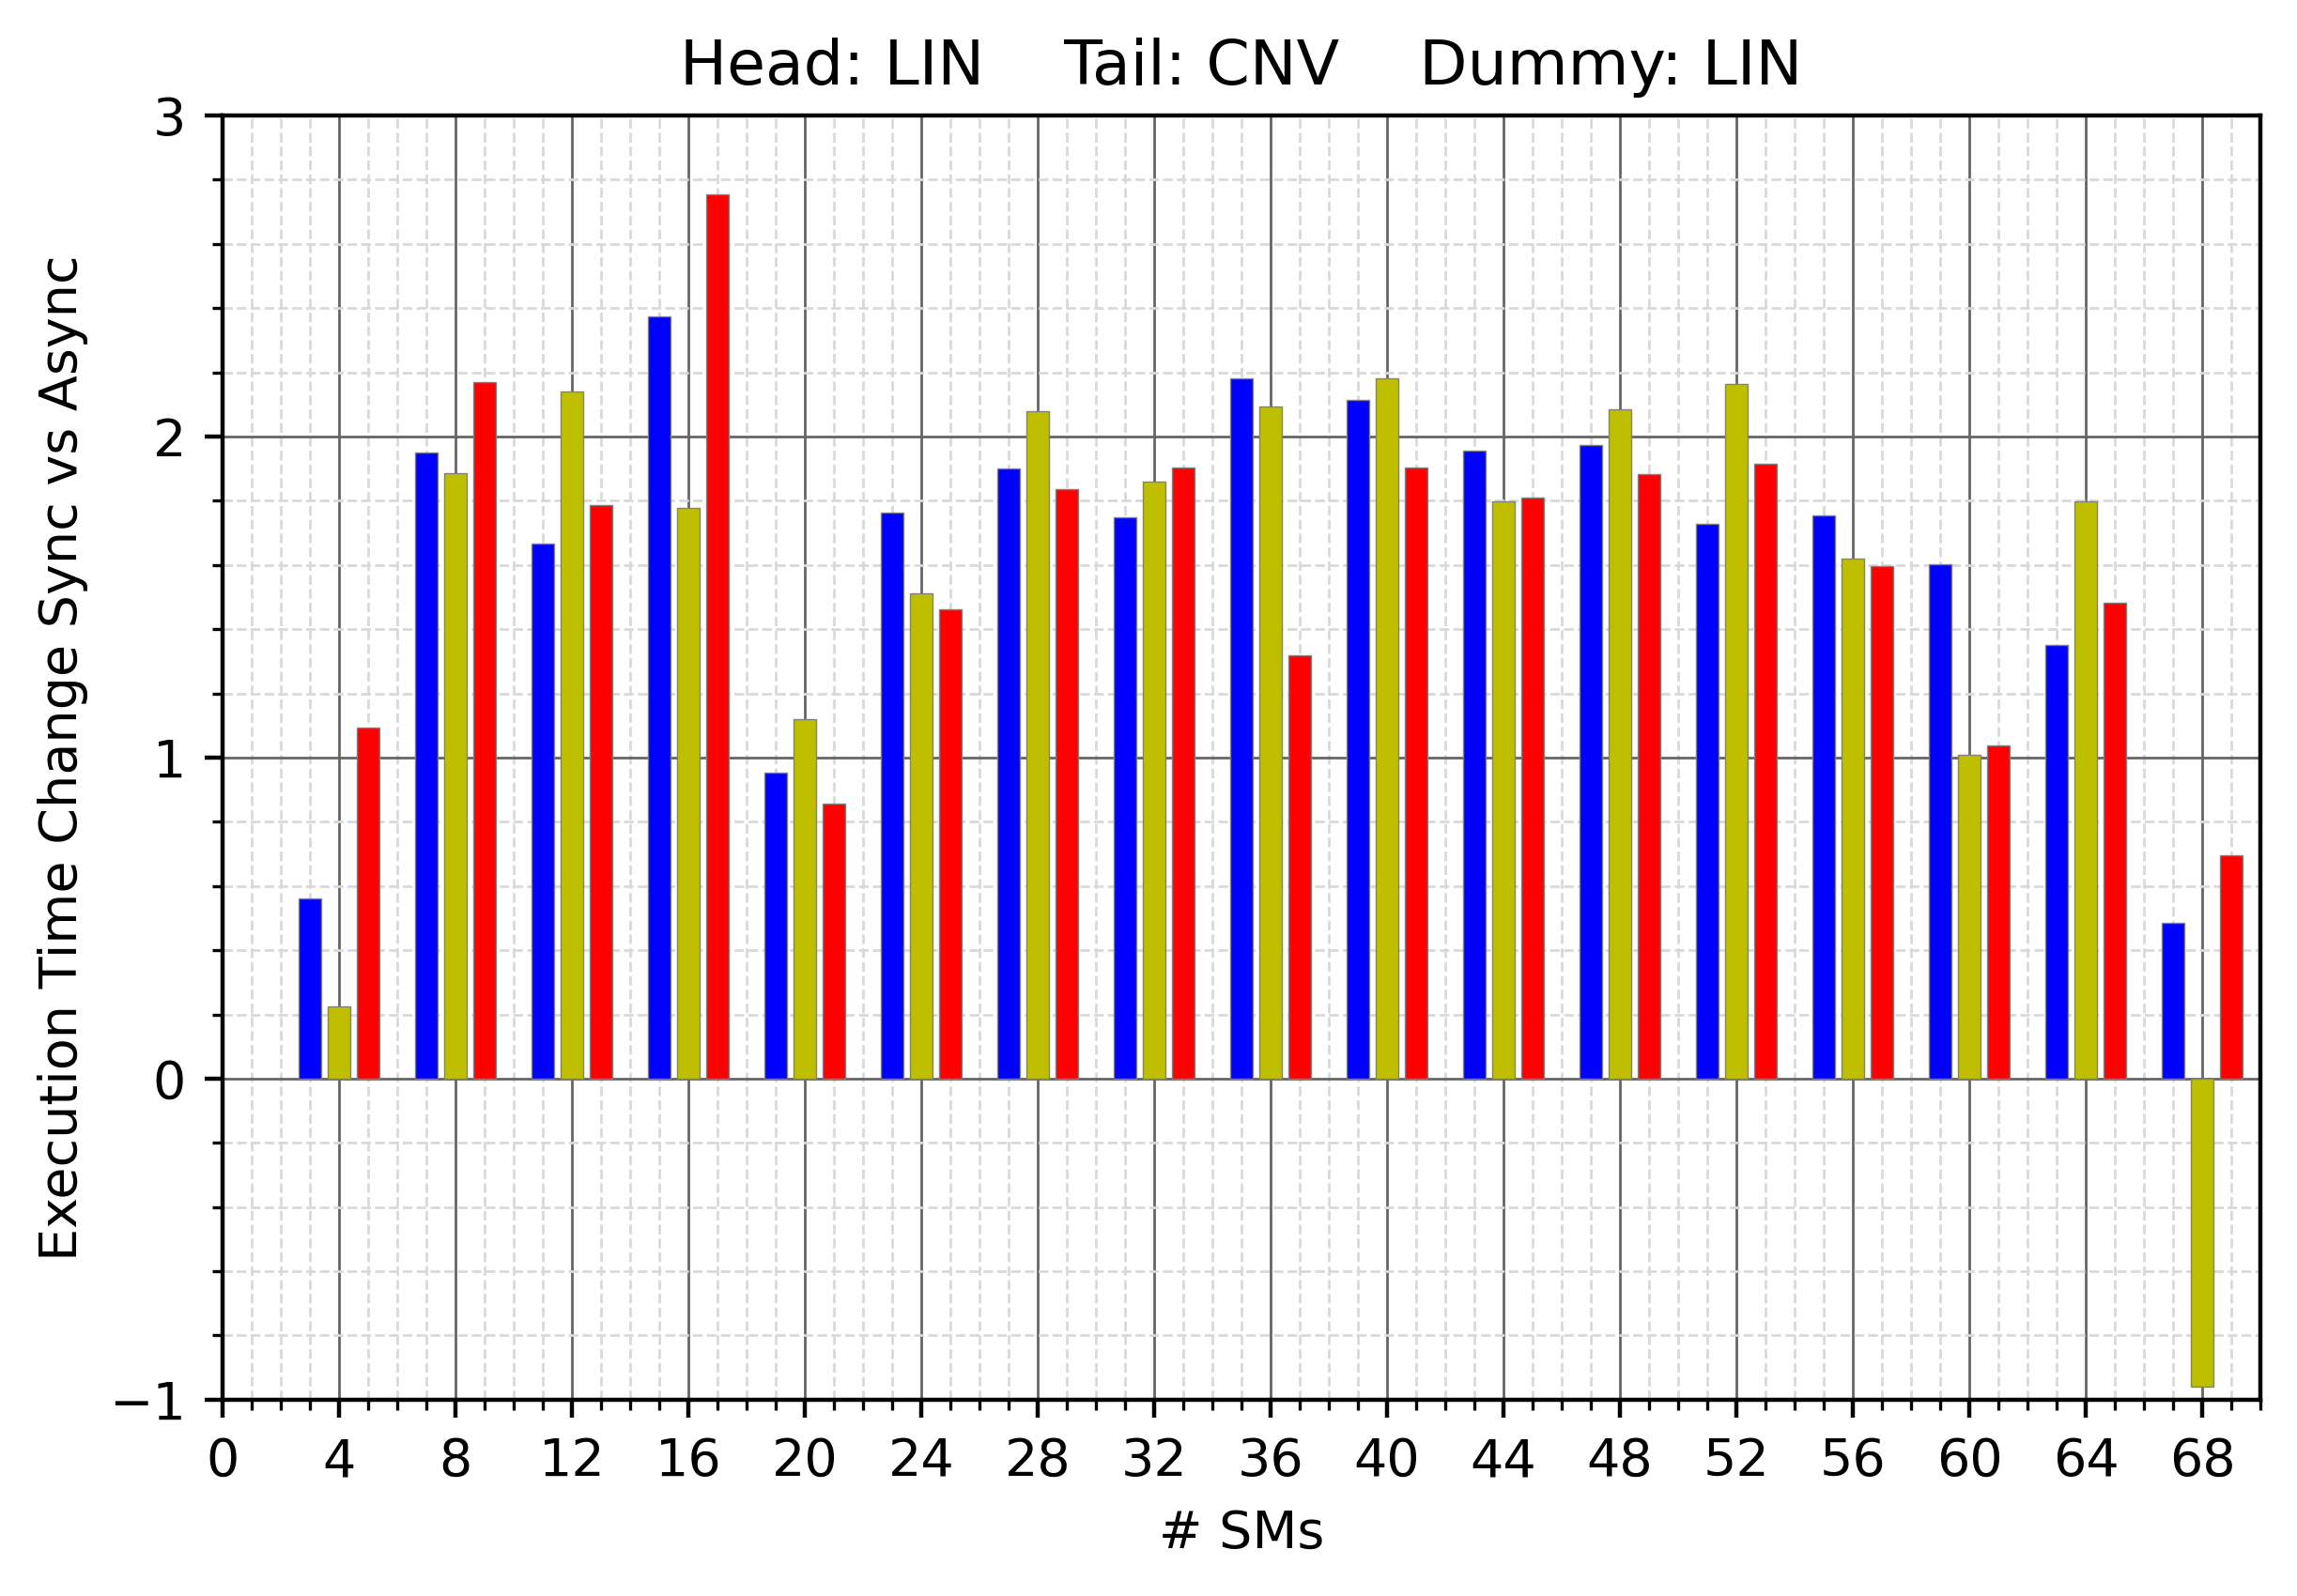

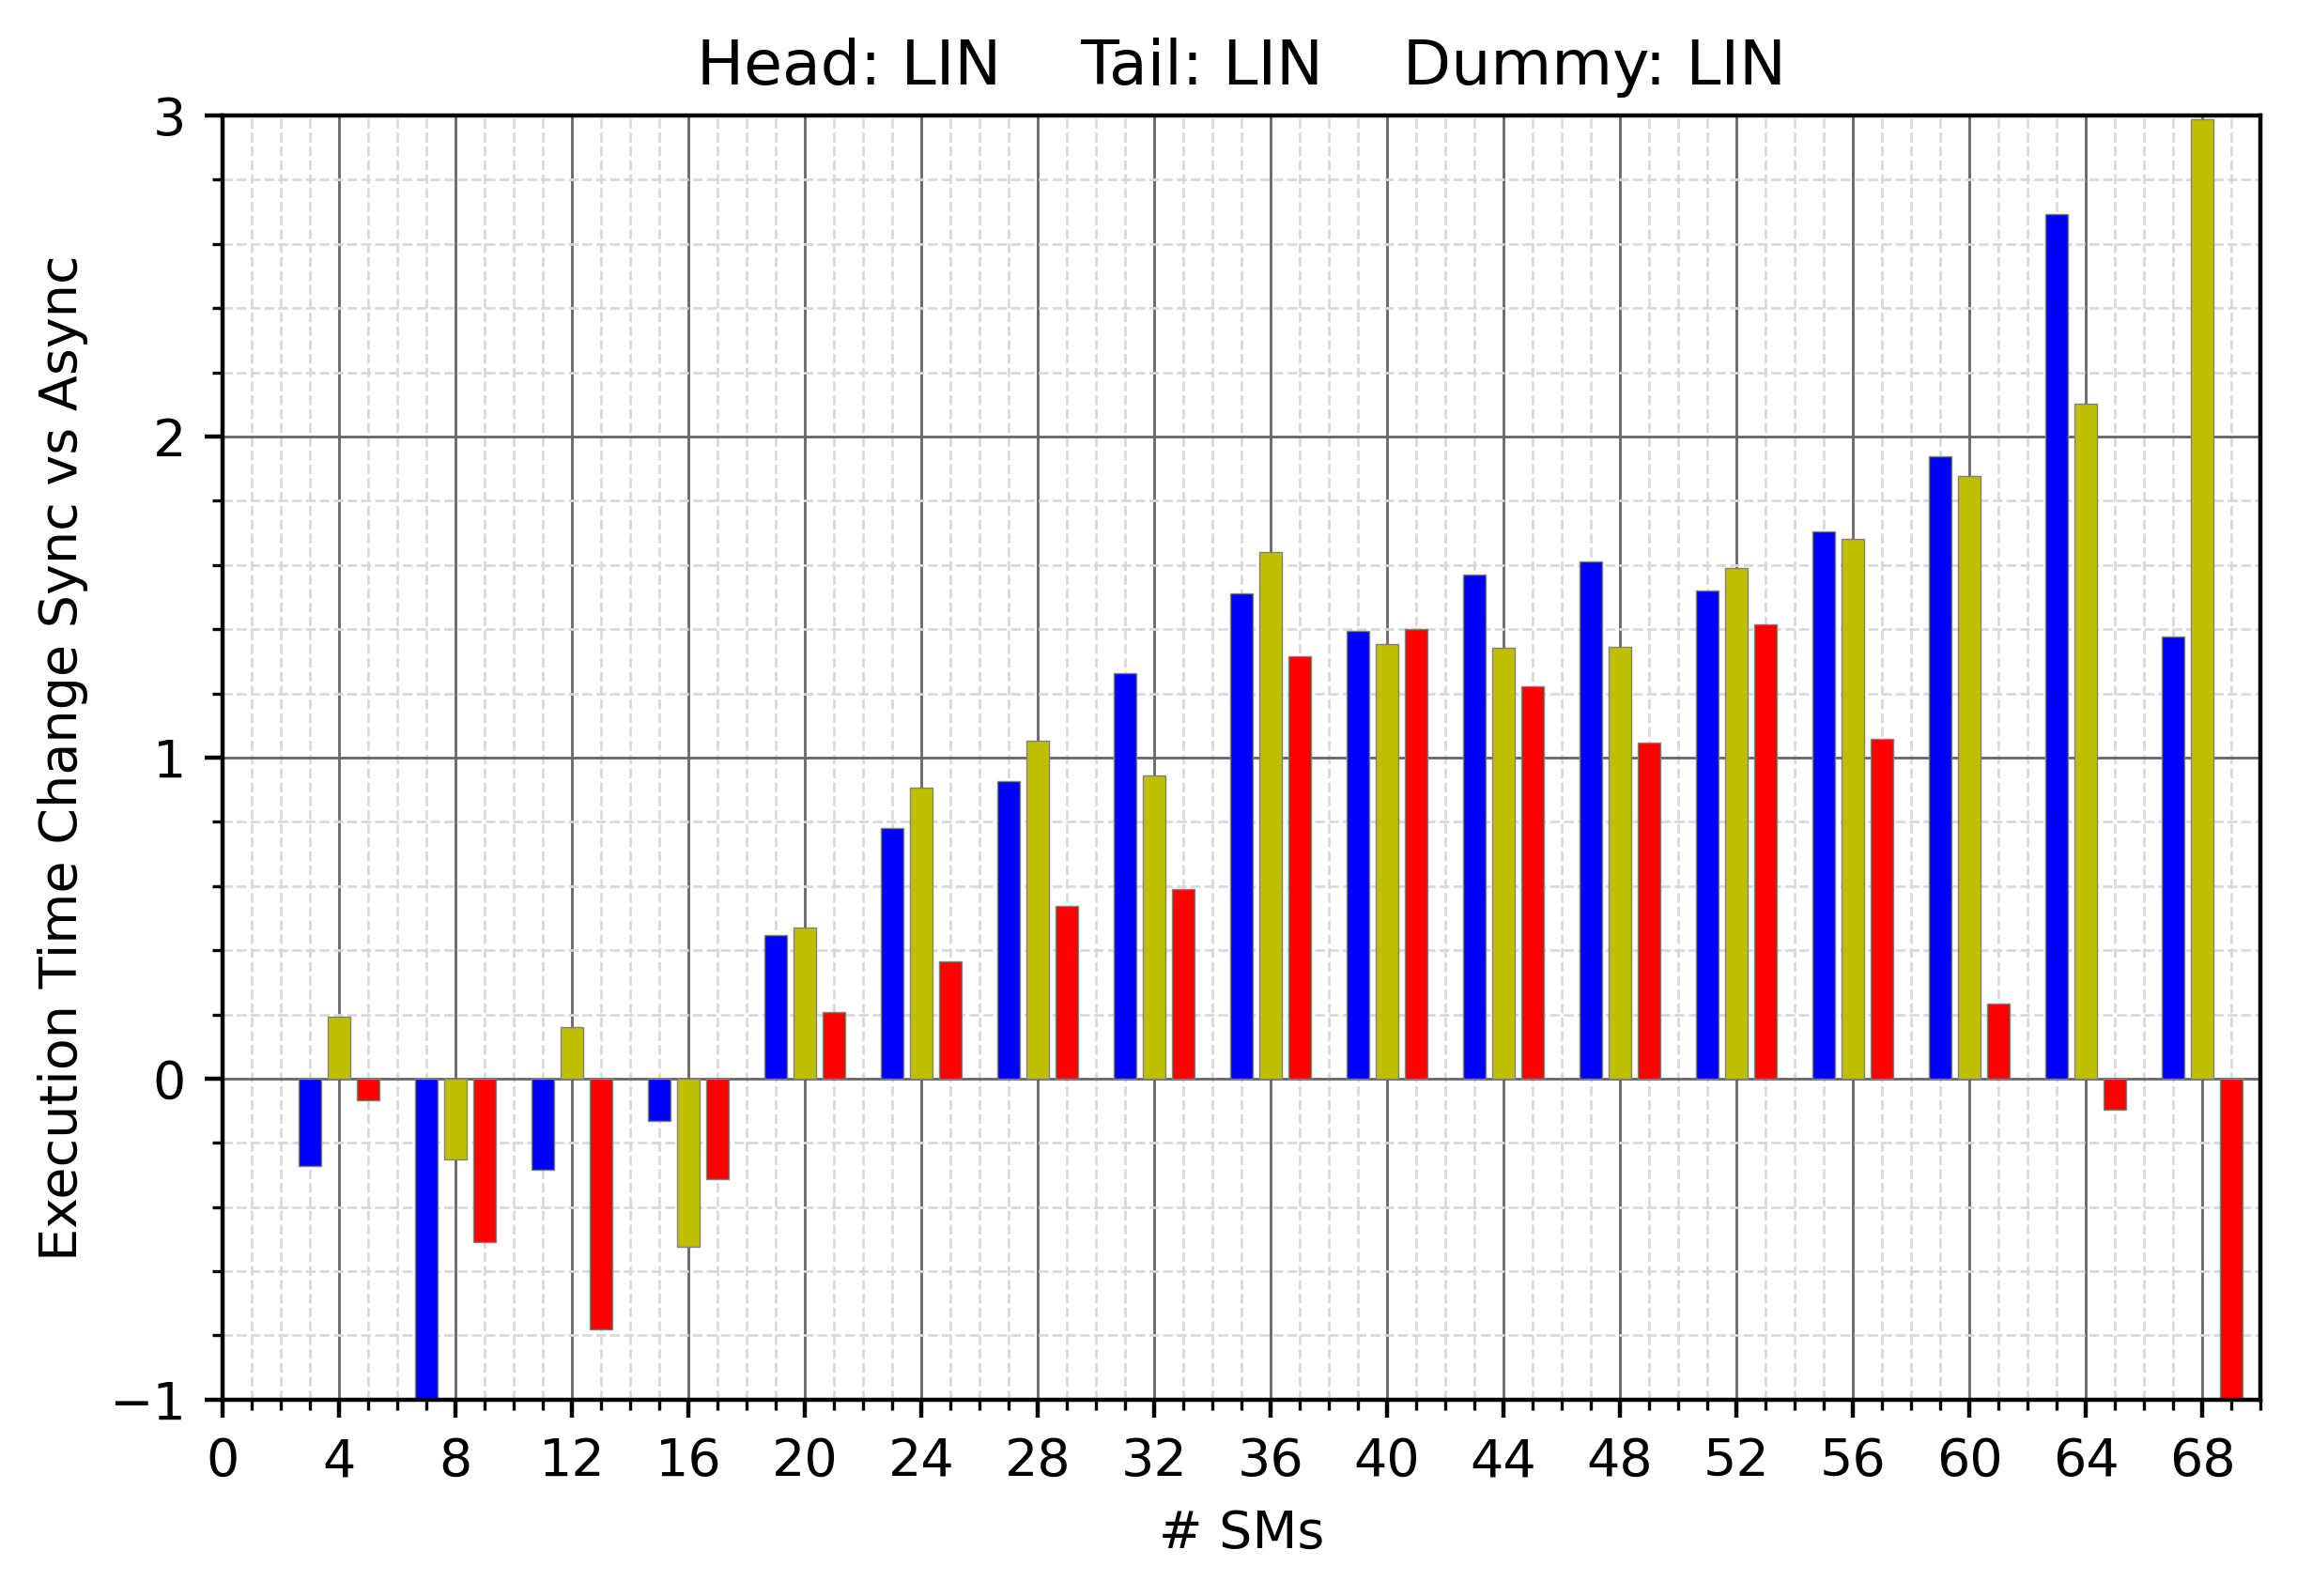

In [456]:
scenarios = 12
params = 9

scenario_names = [
    'Head: CNV    Tail: CNV    Dummy: NULL',
    'Head: CNV    Tail: LIN    Dummy: NULL',
    'Head: LIN    Tail: CNV    Dummy: NULL',
    'Head: LIN    Tail: LIN    Dummy: NULL',
    'Head: CNV    Tail: CNV    Dummy: CNV',
    'Head: CNV    Tail: LIN    Dummy: CNV',
    'Head: LIN    Tail: CNV    Dummy: CNV',
    'Head: LIN    Tail: LIN    Dummy: CNV',
    'Head: CNV    Tail: CNV    Dummy: LIN',
    'Head: CNV    Tail: LIN    Dummy: LIN',
    'Head: LIN    Tail: CNV    Dummy: LIN',
    'Head: LIN    Tail: LIN    Dummy: LIN',
]

# scenario_names = ['ccn', 'cln', 'lcn', 'lln',
#                   'ccc', 'clc', 'lcc', 'llc',
#                   'ccl', 'cll', 'lcl', 'lll']

t = []
raw_data = [[] for i in range(34)]

with open('/home/amir/repos/FGPRS/results/tailing2.csv', 'r') as file:
    dummy = csv.reader(file)
    
    for row in dummy:
        t.append(float(row[0]))
        
        for i in range(1, 221):
            raw_data[int(t[-1] / 2 - 1)].append(float(row[i]))

c_h = [[[] for i in range(params)] for i in range(scenarios)]
c_t = [[[] for i in range(params)] for i in range(scenarios)]
c_h_n = [[[] for i in range(params)] for i in range(scenarios)]
c_t_n = [[[] for i in range(params)] for i in range(scenarios)]
c_base = [[] for i in range(scenarios)]

for k in range(len(t)):
    for i in range(scenarios):
        c_base[i].append(raw_data[k][int(i / 3) * 55])
    
        for j in range(params):
            c_h[i][j].append(raw_data[k][1 + int(i / 3) + (i * 9 + j) * 2])
            c_t[i][j].append(raw_data[k][1 + int(i / 3) + (i * 9 + j) * 2 + 1])
            
#             print(1 + int(i / 3) + (i * 9 + j) * 2)

def normalize(x, base):
    return list(map(lambda y: y / base, x))

for i in range(scenarios):
    for j in range(params):
        c_h_n[i][j] = list(map(truediv, c_h[i][j], c_base[i]))
        c_t_n[i][j] = list(map(truediv, c_t[i][j], c_base[i]))
        
#         print(i, j, c_h_n[i][j][0])

def plot_sync(index):
    plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

    t = np.arange(8, 69, 8)
    
    y_h_a_b = []
    y_h_a_r = []
    y_h_a_w = []
    y_h_s_b = []
    y_h_s_r = []
    y_h_s_w = []
    
    base_max = 0
    
    for i in range(34)[3::4]:
        base = min(
            c_h_n[index][1][i],
            c_h_n[index][2][i],
            c_h_n[index][0][i],
            c_h_n[index][7][i],
            c_h_n[index][8][i],
            c_h_n[index][6][i])
        
        y_h_a_b.append(c_h_n[index][1][i] / base)
        y_h_a_r.append(c_h_n[index][2][i] / base)
        y_h_a_w.append(c_h_n[index][0][i] / base)
        y_h_s_b.append(c_h_n[index][7][i] / base)
        y_h_s_r.append(c_h_n[index][8][i] / base)
        y_h_s_w.append(c_h_n[index][6][i] / base)
        
        base_max = max(
            y_h_a_b[-1],
            y_h_a_r[-1],
            y_h_a_w[-1],
            y_h_s_b[-1],
            y_h_s_r[-1],
            y_h_s_w[-1],
            base_max)
    
    base_max = math.ceil(base_max * 2) / 2
    
    plt.bar(t - 2.75, y_h_a_b, color='b', edgecolor='0.5', linewidth=0.25)
    plt.bar(t - 1.75, y_h_a_r, color='b', edgecolor='0.5', linewidth=0.25)
    plt.bar(t - 0.75, y_h_a_w, color='b', edgecolor='0.5', linewidth=0.25)

    plt.bar(t + 0.75, y_h_s_b, color='r', edgecolor='0.5', linewidth=0.25)
    plt.bar(t + 1.75, y_h_s_r, color='r', edgecolor='0.5', linewidth=0.25)
    plt.bar(t + 2.75, y_h_s_w, color='r', edgecolor='0.5', linewidth=0.25)

    xticks = list(range(0, 69, 8))

    plt.xticks(xticks)
    plt.yticks(np.arange(0, base_max + 0.1, 0.5))

    plt.xlim(0, 70)
    plt.ylim(0, base_max)

    plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5, zorder=10.0)
    plt.grid(visible=True, which='minor', color='0.85', linestyle='--', linewidth=0.5, zorder=10.0)
    plt.rc('axes', axisbelow=True)

    plt.xlabel('# SMs')
    plt.ylabel('Normalized Execution Time')
    plt.title(scenario_names[index])

    plt.minorticks_on()
    plt.show()

def plot_tail(index):
    plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

    t = np.arange(4, 69, 4)
    
    y_t_b = []
    y_t_r = []
    y_t_w = []
    
    base_min = 1000
    base_max = 0
    
    for i in range(34)[1::2]:        
        y_t_b.append((c_t_n[index][7][i] - c_t_n[index][1][i]) / c_t_n[index][1][i] * 100)
        y_t_r.append((c_t_n[index][8][i] - c_t_n[index][2][i]) / c_t_n[index][2][i] * 100)
        y_t_w.append((c_t_n[index][6][i] - c_t_n[index][0][i]) / c_t_n[index][2][i] * 100)
        
        base_min = min(
#             y_t_b[-1],
            y_t_r[-1],
#             y_t_w[-1],
            base_min)
        
        base_max = max(
#             y_t_b[-1],
            y_t_r[-1],
#             y_t_w[-1],
            base_max)
    
    base_min = max(math.floor(base_min), -12)
    base_max = min(math.ceil(base_max), 12)
    
    plt.bar(t - 1, y_t_b, color='b', edgecolor='0.5', linewidth=0.25)
    plt.bar(t, y_t_r, color='y', edgecolor='0.5', linewidth=0.25)
    plt.bar(t + 1, y_t_w, color='r', edgecolor='0.5', linewidth=0.25)

    xticks = list(range(0, 69, 4))

    plt.xticks(xticks)
    plt.yticks(np.arange(base_min, base_max + 0.1, 1))

    plt.xlim(0, 70)
    plt.ylim(base_min, base_max)

    plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5, zorder=10.0)
    plt.grid(visible=True, which='minor', color='0.85', linestyle='--', linewidth=0.5, zorder=10.0)
    plt.rc('axes', axisbelow=True)

    plt.xlabel('# SMs')
    plt.ylabel('Execution Time Change Sync vs Async')
    plt.title(scenario_names[index])

    plt.minorticks_on()
    plt.show()
    
for i in range(12):
    plot_sync(i)
    
for i in range(12):
    plot_tail(i)

In [439]:
len(t)

17